<font color = blue> 
<b>*************************************************** <br>
       Higher Diploma in Data Analytics <br>
         Final Year Project <br>
           26th April 2021 <br>
<br>
Student name: Kieran Sexton <br>
<br>
*************************************************** <br>
<br>

<font color = blue> __1. Install Packages__</font>

In [1]:
#install.packages('RMySQL', dependencies = TRUE)  
#install.packages('dplyr', dependencies = TRUE)
#install.packages('corrplot', dependencies = TRUE)
#install.packages('ggplot2', dependencies = TRUE)
#install.packages('tidyr', dependencies = TRUE)
#install.packages('caret', dependencies = TRUE)
#install.packages('e1071', dependencies = TRUE)
#install.packages('randomForest', dependencies = TRUE)
#install.packages('stringr', dependencies = TRUE)
#install.packages('pROC', dependencies = TRUE)
#install.packages('tidyverse', dependencies = TRUE)
#install.packages('reshape2', dependencies = TRUE)
#install.packages('multiROC', dependencies = TRUE)
#install.packages('dummies', dependencies = TRUE)
#install.packages('gridExtra', dependencies = TRUE)

In [1]:
library(RMySQL)
library(dplyr)
library(corrplot)
library(ggplot2)
library(tidyr)
library(caret)
library(e1071)
library(randomForest)
library(stringr)
library(pROC)
library(tidyverse)  
library(reshape2)
library(multiROC)
library(dummies)
library(gridExtra)

Warning message:
"package 'RMySQL' was built under R version 4.0.4"
Loading required package: DBI


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'corrplot' was built under R version 4.0.4"
corrplot 0.84 loaded

Warning message:
"package 'ggplot2' was built under R version 4.0.4"
Warning message:
"package 'tidyr' was built under R version 4.0.4"
Loading required package: lattice

Warning message:
"package 'e1071' was built under R version 4.0.4"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'stringr' was built under R version 4.0.4"
Type 'citation("pROC")' for a citation.


Attaching 

*Note: RMySQL is no longer supported and may need to be replaced*

<font color = blue> __2. Set up the environment__</font>

<font color = green>  a. Windows  </font>

In [2]:
setwd("")

  <font color = green>   b. Or Mac </font>

In [3]:
#setwd("~/Documents/OneDrive/Kieran Documents/Higher Dip/Final Year Project/Data/BERPublicSearch/Final Data/Final R files")

<font color = blue> **3. Read in the data file**</font> <br>
Available from: _https://ndber.seai.ie/BERResearchTool/Register/Register.aspx?id=d2084e0e-12e8-4e96-a6a1-1fc8f2f6c6f2_<br>
<font color = red> 203 attributes and 946K observations </font>

In [4]:
fullBER <- as.data.frame(read.csv("BERPublicsearch.csv", header=TRUE, sep=","))
str(fullBER)
dim(fullBER)

'data.frame':	946327 obs. of  203 variables:
 $ CountyName                         : chr  "Cork City" "Co. Limerick" "Co. Cork" "Co. Cork" ...
 $ DwellingTypeDescr                  : chr  "Mid-floor apartment" "Top-floor apartment" "House" "House" ...
 $ Year_of_Construction               : int  1996 2007 2005 2005 1996 2007 2005 1996 1995 1996 ...
 $ TypeofRating                       : chr  "Existing       " "Existing       " "Existing       " "Existing       " ...
 $ EnergyRating                       : chr  "C3" "B3" "C1" "B3" ...
 $ BerRating                          : num  214 146 171 148 246 ...
 $ GroundFloorArea.sq.m.              : num  60 95 93.6 93.6 60 ...
 $ UValueWall                         : num  0.55 0.36 0.37 0.37 0.55 0.27 0.37 0.55 0.55 0.55 ...
 $ UValueRoof                         : num  0 0.22 0.17 0.17 0 0.16 0.17 0 0.35 0 ...
 $ UValueFloor                        : num  0 0 0.34 0.26 0.36 0.18 0.31 0 0.44 0.36 ...
 $ UValueWindow                       : num  2

[1] 946327    203

<font color = blue> **4. Initial Data Analysis**</font> <br>
Remove the columns with characters that are problematic for MYSQL - 3 columns which are irrelvant to the analysis. (free text with replacement characters that MYSQL will not accept )

In [5]:
fullBER = subset(fullBER, select = -c(PredominantRoofType,FirstWallDescription,FirstEnerProdComment))

**<font color = green> a) Examine the distribution - 15 classes imbalanced </font>**

In [6]:
fullBER %>%
  group_by(EnergyRating) %>% 
  summarise(Number = n()) %>%
  mutate(Percent = prop.table(Number)*100) 

,EnergyRating,Number,Percent
,<chr>,<int>,<dbl>
1,A1,460,0.04860899
2,A2,28239,2.98406365
3,A3,52255,5.52187563
4,B1,13319,1.40744161
5,B2,29666,3.13485719
6,B3,71384,7.54326993
7,C1,107452,11.35463746
8,C2,118215,12.49198216
9,C3,112738,11.91321816


**<font color = green> b) Plot it</font>**

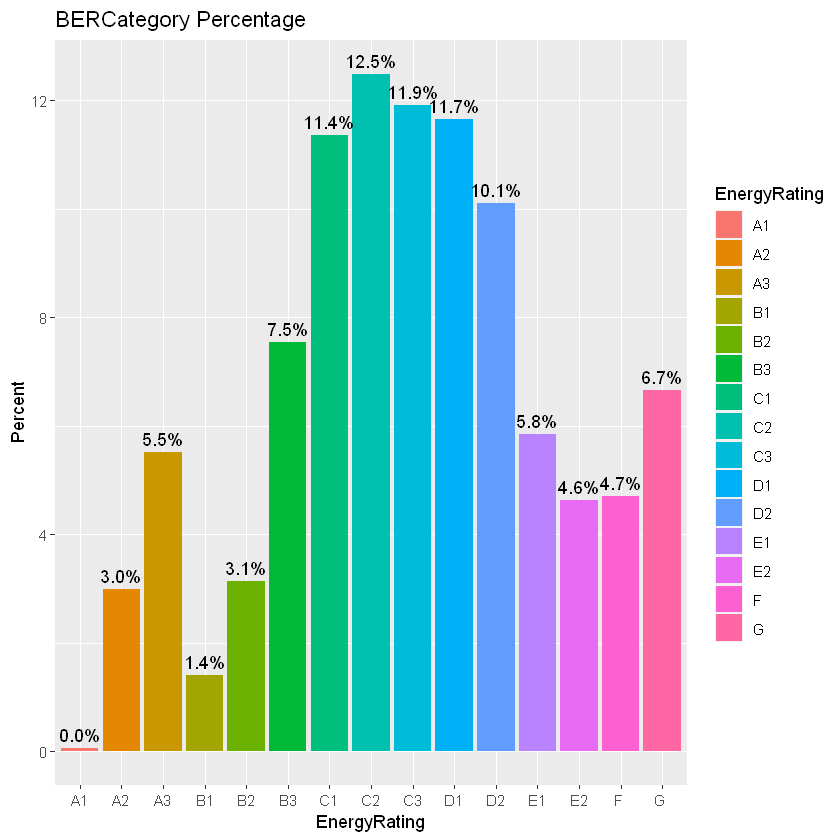

In [7]:
fullBER %>%
  group_by(EnergyRating) %>% 
  summarise(Number = n()) %>%
  mutate(Percent = prop.table(Number)*100) %>% 
  ggplot(aes(EnergyRating, Percent)) + 
  geom_col(aes(fill = EnergyRating)) +
  labs(title = "BERCategory Percentage") +
  geom_text(aes(label = sprintf("%.1f%%", Percent)), vjust = -0.5)

<font color = blue> **5. Generate data for trend and statistical analysis (Tableau and SPSS)**</font> <br>

**<font color = green> a) Rename all Dublin suburbs to Dublin City and aggregate similar dwellings e.g. top floor, mid, bottom all into apartment</font>**

In [8]:
fullBER$CountyName <- gsub("Dublin \\d+$", "Dublin City", fullBER$CountyName)  
fullBER$CountyName <- gsub("Dublin 6W", "Dublin City", fullBER$CountyName)  
# fix the dwellings to collate simiilar types and reduce the comparisons                      
fullBER$DwellingTypeDescr <- recode(fullBER$DwellingTypeDescr,
                                    "Mid-floor apartment" = "Apartment",
                                    "Top-floor apartment" = "Apartment",
                                    "Ground-floor apartment" = "Apartment",
                                    "Mid-terrace house" = "Terraced House",
                                    "End of terrace house" = "Terraced House"
)                           

**<font color = green> b) Aggregate data for Tableau and SPSS</font>**

In [243]:
# aggregate data for Tableau  
dataBERSPSS <- filter(fullBER, grepl("2020|2018|2016|2014|2012|2010|2019|2017|2015|2013|2011", Year_of_Construction)) %>%  select(BerRating,EnergyRating,CO2Rating,CountyName,DwellingTypeDescr,Year_of_Construction)
# subset for 2020 for SPSS
dataBERSPSS2020 <- subset(dataBERSPSS, Year_of_Construction=="2020")

***
<font color = blue><h2>**6. Subset for assessments in 2020 as the most recent year evaluated against the current DEAP version (Nov 2019)**</h2></font> <br>
***

In [10]:
assesedBER2020 <- filter(fullBER, grepl("2020", DateOfAssessment, fixed = TRUE))
dim(assesedBER2020)

[1] 78485   200

,EnergyRating,Number,Percent
,<chr>,<int>,<dbl>
1,A1,243,0.3096133
2,A2,11272,14.3619800
3,A3,7429,9.4655030
4,B1,1617,2.0602663
5,B2,3580,4.5613812
6,B3,7200,9.1737275
7,C1,8900,11.3397464
8,C2,8182,10.4249220
9,C3,7033,8.9609480


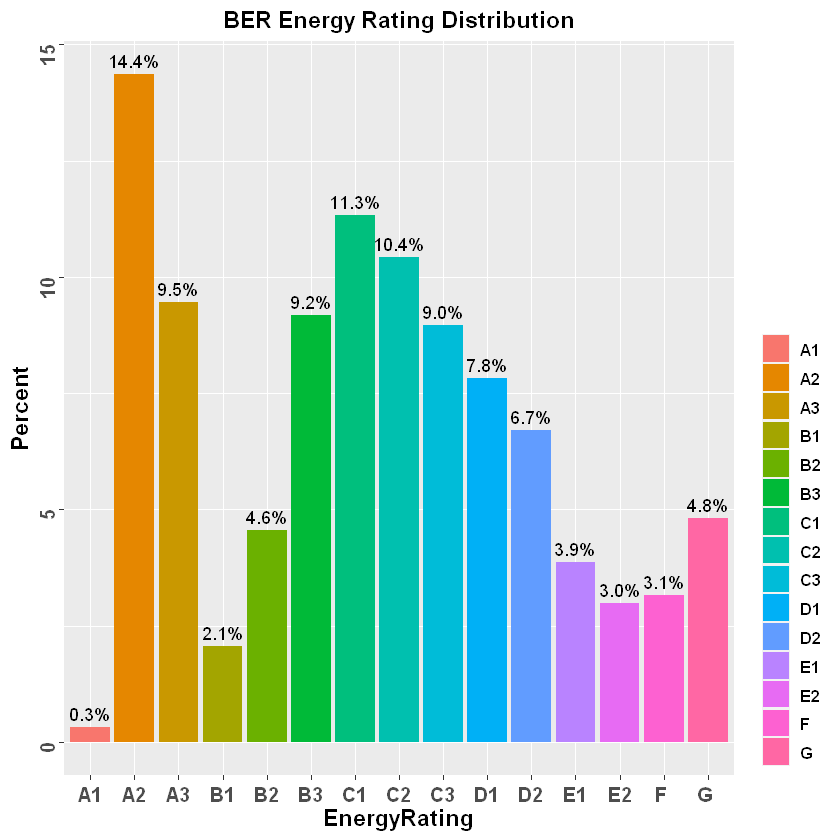

In [11]:
assesedBER2020 %>% 
  group_by(EnergyRating) %>% 
  summarise(Number = n()) %>%
  mutate(Percent = prop.table(Number)*100) 

assesedBER2020 %>%
  group_by(EnergyRating) %>% 
  summarise(Number = n()) %>%
  mutate(Percent = prop.table(Number)*100) %>% 
  ggplot(aes(EnergyRating, Percent)) + 
  geom_col(aes(fill = EnergyRating)) +
  ggtitle("BER Energy Rating Distribution") +
  geom_text(aes(label = sprintf("%.1f%%", Percent)), vjust = -0.5) +
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

**<font color = red> It reflects all of the classes but the distribution looks slightly different to the full data set. Lets test it**</font>

In [12]:
options(warn=-1)
# first test for normality - non normal 
ks.test(fullBER$BerRating, pnorm)
ks.test(assesedBER2020$BerRating, pnorm)
options(warn=0)


	One-sample Kolmogorov-Smirnov test

data:  fullBER$BerRating
D = 0.9999, p-value < 2.2e-16
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  assesedBER2020$BerRating
D = 0.99966, p-value < 2.2e-16
alternative hypothesis: two-sided


**<font color = green> d. Data samples are not normally distributed so run a non parametric test to compare two samples (Wilcoxon Rank)**</font>

In [13]:
wilcox.test(fullBER$BerRating, assesedBER2020$BerRating)


	Wilcoxon rank sum test with continuity correction

data:  fullBER$BerRating and assesedBER2020$BerRating
W = 4.6517e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


**<font color = red>The 2020 assessment data can be said to be statistically significantly different to the full data set at the 5% level of significance**</font>

***
**<font color = blue> 7. Detailed analysis highlights the DEAP methodology and calculation update in Nov 2019 necessitating this analysis to develop a model based on the latest year of assessments i.e. 2020</font>**

**<font color = green> a. Lets examine this data - Descriptive statistics**</font>

In [14]:
summary(assesedBER2020)
str (assesedBER2020)

mean(assesedBER2020$BerRating)
median(assesedBER2020$BerRating)
var(assesedBER2020$BerRating)
sd(assesedBER2020$BerRating)

  CountyName        DwellingTypeDescr  Year_of_Construction TypeofRating      
 Length:78485       Length:78485       Min.   :1760         Length:78485      
 Class :character   Class :character   1st Qu.:1976         Class :character  
 Mode  :character   Mode  :character   Median :2001         Mode  :character  
                                       Mean   :1988                           
                                       3rd Qu.:2008                           
                                       Max.   :2104                           
                                                                              
 EnergyRating         BerRating       GroundFloorArea.sq.m.   UValueWall    
 Length:78485       Min.   : -60.97   Min.   :  11.5        Min.   :0.0200  
 Class :character   1st Qu.:  86.82   1st Qu.:  79.8        1st Qu.:0.2500  
 Mode  :character   Median : 172.52   Median : 104.6        Median :0.5100  
                    Mean   : 193.32   Mean   : 116.8        

'data.frame':	78485 obs. of  200 variables:
 $ CountyName                         : chr  "Dublin City" "Dublin City" "Co. Cork" "Co. Cork" ...
 $ DwellingTypeDescr                  : chr  "Terraced House" "Semi-detached house" "Semi-detached house" "Detached house" ...
 $ Year_of_Construction               : int  1900 1988 2003 2003 2000 2003 1996 1900 1979 1940 ...
 $ TypeofRating                       : chr  "Existing       " "Existing       " "Existing       " "Existing       " ...
 $ EnergyRating                       : chr  "B3" "D2" "C1" "C1" ...
 $ BerRating                          : num  147 267 167 159 173 ...
 $ GroundFloorArea.sq.m.              : num  49.9 101.8 117.9 144.4 149.1 ...
 $ UValueWall                         : num  0.27 0.6 0.46 0.55 0.54 0.54 0.55 0.46 0.52 0.98 ...
 $ UValueRoof                         : num  0.25 0.37 0.3 0.36 0.36 0.31 0.4 0 0.26 0.35 ...
 $ UValueFloor                        : num  0.31 0.64 0.38 0.44 0.44 0.36 0.41 0 0.64 0.52 ...
 $ UVa

[1] 193.3196

[1] 172.52

[1] 21810.75

[1] 147.6846

**<font color = green> a. box plot - lot of outliers (positively skewed distribution)**</font>

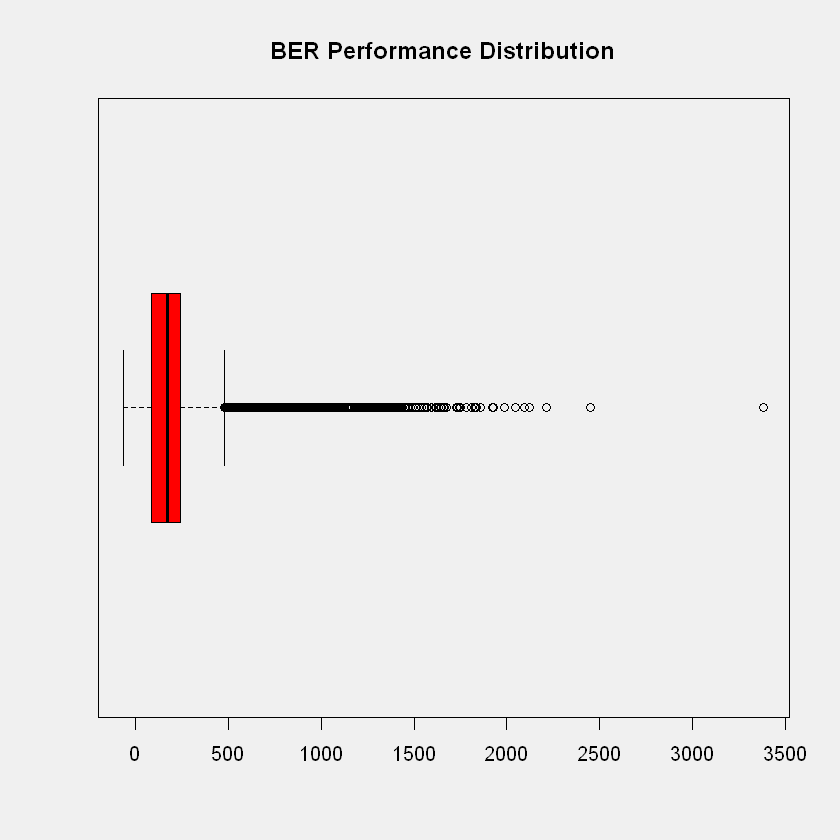

In [15]:
par(bg = 'gray94')
boxplot(assesedBER2020$BerRating, horizontal = TRUE, col = "red", main = "BER Performance Distribution", panel.grid.minor = element_line(colour = "white", size = 1), panel.grid.major = element_line(colour = "white", size = 1))

**<font color = green> b. QQ Plot - non normal distribution**</font>

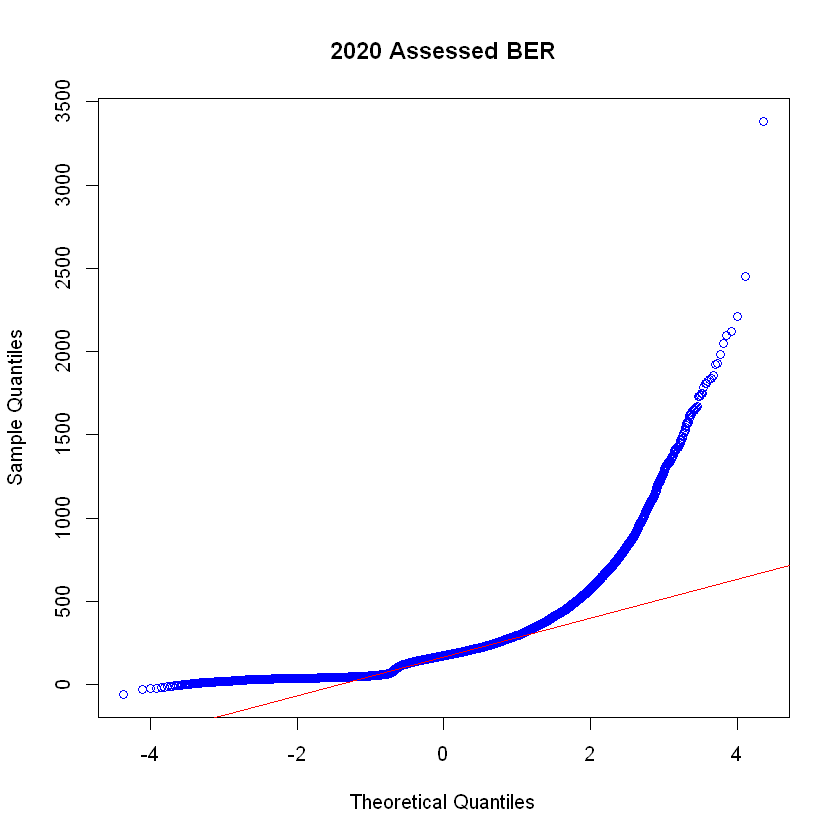

In [16]:
qqnorm(assesedBER2020$BerRating, col= "blue", main = "2020 Assessed BER")
qqline(assesedBER2020$BerRating, col="red")

**<font color = green> c. Examine the outliers. Extremely high values and negative values are deemed valid data for G and A1 respectively and retained**</font>

In [17]:
min(assesedBER2020$BerRating)
max(assesedBER2020$BerRating)

#examine outliers
assesedBER2020[assesedBER2020$BerRating<0,]
assesedBER2020[assesedBER2020$BerRating>2000,]

[1] -60.97

[1] 3383.54

,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea.sq.m.,UValueWall,UValueRoof,UValueFloor,...,SecondWallIsSemiExposed,SecondWallAgeBandId,SecondWallTypeId,ThirdWallType_Description,ThirdWallDescription,ThirdWallArea,ThirdWallUValue,ThirdWallIsSemiExposed,ThirdWallAgeBandId,ThirdWallTypeId
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>
3987,Co. Kildare,Semi-detached house,1971,Existing,A1,-1.66,192.15,0.16,0.13,0.14,...,No,10,8,Concrete Hollow Block,Original Walls with 120mm EPS,14.93,0.15,No,5,7
20053,Co. Cavan,Detached house,2019,Final,A1,-20.92,175.37,0.20,0.12,0.11,...,,NA,NA,,,NA,NA,,NA,NA
25442,Co. Cork,Detached house,2019,Final,A1,-6.14,125.00,0.13,0.11,0.12,...,,NA,NA,,,NA,NA,,NA,NA
42891,Co. Dublin,Detached house,2019,Final,A1,-60.97,126.01,0.11,0.08,0.07,...,No,11,9,,,NA,NA,,NA,NA
47640,Co. Galway,Detached house,2020,Final,A1,-3.73,187.71,0.15,0.11,0.12,...,,NA,NA,,,NA,NA,,NA,NA
47981,Co. Kerry,Terraced House,2020,Final,A1,-10.01,117.73,0.19,0.14,0.13,...,No,11,9,,,NA,NA,,NA,NA
48624,Co. Kerry,Terraced House,2020,Final,A1,-6.13,117.47,0.20,0.14,0.15,...,No,11,9,,,NA,NA,,NA,NA
48682,Co. Mayo,Detached house,2020,Final,A1,-2.27,255.64,0.16,0.13,0.08,...,,NA,NA,,,NA,NA,,NA,NA
53130,Co. Sligo,Semi-detached house,1974,Existing,A1,-22.43,106.69,0.16,0.15,0.11,...,,NA,NA,,,NA,NA,,NA,NA


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea.sq.m.,UValueWall,UValueRoof,UValueFloor,...,SecondWallIsSemiExposed,SecondWallAgeBandId,SecondWallTypeId,ThirdWallType_Description,ThirdWallDescription,ThirdWallArea,ThirdWallUValue,ThirdWallIsSemiExposed,ThirdWallAgeBandId,ThirdWallTypeId
,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>
7741,Dublin City,Semi-detached house,1899,Existing,G,2212.27,21.88,2.10,2.3,1.02,...,No,1,10,,,NA,NA,,NA,NA
20149,Co. Kerry,Detached house,1893,Existing,G,2046.06,38.27,2.10,2.3,1.06,...,No,1,10,,,NA,NA,,NA,NA
23525,Co. Dublin,Detached house,1890,Existing,G,2119.68,47.26,2.10,2.3,0.88,...,,NA,NA,,,NA,NA,,NA,NA
41731,Co. Limerick,Detached house,1920,Existing,G,2094.68,91.20,2.10,2.3,0.80,...,,NA,NA,,,NA,NA,,NA,NA
74962,Co. Wexford,Terraced House,1900,Existing,G,3383.54,76.72,2.10,2.3,0.73,...,,NA,NA,,,NA,NA,,NA,NA
77016,Co. Wexford,Detached house,1900,Existing,G,2450.53,53.31,1.93,2.3,1.02,...,Yes,2,1,,porch and kitchen,29.03,2.1,No,2,10


**<font color = red> Shows properties with negative energy performance (A1) and with really bad energy performance (G). All valid data to distinguish these classes so this data is retained**</font>

**<font color = blue> 8. Write the files for back up and to the DB for data quality management and access from other applications**</font>

In [18]:
write.csv(assesedBER2020, "assesedBER2020.csv", row.names=FALSE)

**<font color = green> a. Write to MySQL database - SET GLOBAL local_infile = true; on MySQL**</font>

In [19]:
con_schema <- dbConnect(MySQL(),
              user = 'root',
              password = 'Project1',  # this should be in an encrypted file for product
              host = 'localhost',
              dbname='seai_ber_schema')

In [20]:
# one column is problematic for MySQL querys so rename
colnames(assesedBER2020)[colnames(assesedBER2020) == "GroundFloorArea.sq.m."] <- "TotalFloorArea"

**<font color = green> b. Create the table and load the data**</font>

In [21]:
dbWriteTable(conn = con_schema, name = 'assesedBER2020_Full_Schema', value = assesedBER2020, row.names=FALSE, overwrite=TRUE, sep =',')

[1] TRUE

**<font color = red> Now Create the DataWareHouse in the MySQL Client in the Datawarehouse and then create the 'retrofit' DataMart using the SQL supplied with this project**</font>

**<font color = green> c. After creating the necessary datamarts in MySQL based on DEAP attribute analysis read in the retrofit datamart**</font>

In [22]:
con_datamart <- dbConnect(MySQL(),
                user = 'root',
                password = 'Project1',  # this should be in an encrypted file for product
                host = 'localhost',
                dbname='projectdatamart')

In [23]:
retrofitBER <- dbReadTable(conn = con_datamart, "retrofitdatamart") 

**<font color = green> d. Examine this new data - 53 attributes (composed of property info, insulation info and heating info) and 76K observations**</font>

In [24]:
str(retrofitBER)
# write it out for backup
write.csv(retrofitBER, "retrofit_BER.csv", row.names=FALSE)

'data.frame':	76004 obs. of  54 variables:
 $ Type                           : chr  "Terraced House" "Semi-detached house" "Semi-detached house" "Detached house" ...
 $ YearBuilt                      : num  1900 1988 2003 2003 2000 ...
 $ BERCategory                    : chr  "B3" "D2" "C1" "C1" ...
 $ TotalFloorArea                 : num  49.9 101.8 117.9 144.4 149.1 ...
 $ WallArea                       : num  46.4 115.2 111.8 133 142.4 ...
 $ FloorArea                      : num  28.5 61 73.5 78.7 63.6 ...
 $ WindowArea                     : num  8.53 23.63 18.55 19.88 28.36 ...
 $ DoorArea                       : num  0 3.89 1.85 3.7 3.7 1.99 1.85 1.78 5.87 0 ...
 $ RoofArea                       : num  27.6 61.5 73.5 80.7 65 ...
 $ NoStoreys                      : num  2 2 2 2 3 3 1 1 2 1 ...
 $ UValueWindow                   : num  1.59 2.9 2.56 3.1 3.1 2.72 2.8 2.2 2.8 2.28 ...
 $ UValueDoor                     : num  0 3 3 3 3 3 1.71 2.61 2.95 0 ...
 $ UValueRoof               

**<font color = green> e. Write the Tableau and SPSS files to the DB as DataMarts and backup**</font>

In [25]:
# Write the DataMarts for SPSS and Tableau 
dbWriteTable(conn = con_datamart, name = 'dataBERSPSS', value = dataBERSPSS, row.names=FALSE, overwrite=TRUE, sep =',')
dbWriteTable(conn = con_datamart, name = 'dataBERSPSS2020', value = dataBERSPSS2020, row.names=FALSE, overwrite=TRUE, sep =',')
# save for back up
write.csv(dataBERSPSS, "dataBERSPSS.csv", row.names=FALSE)
write.csv(dataBERSPSS2020, "dataBERSPSS2020.csv", row.names=FALSE)

[1] TRUE

[1] TRUE

***
**<font color = blue> 9. Perform data exploration, preparation and cleaning**</font>

In [26]:
# In case of needing to start from this point, read the csv back in
retrofitBER <- as.data.frame(read.csv("retrofit_BER.csv", header=TRUE, sep=",", strip.white= TRUE, stringsAsFactors = FALSE, na.strings=c("","NA")))

#  remove all leading and trailing blanks
retrofitBER <- retrofitBER %>%
  mutate_if(is.character, str_trim)

**<font color = green> a. Set the BER class attribute to a categorical**</font>

In [27]:
retrofitBER$BERCategory = as.factor(retrofitBER$BERCategory)

**<font color = green> b. Define any functions**</font>

In [28]:
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

**<font color = green> c. BER Rating proportion plot - the data is imbalanced across the categories so may require under or over samplying of the training data before building a model**</font>

,BERCategory,Number,Percent
,<fct>,<int>,<dbl>
1,A1,230,0.3026157
2,A2,9376,12.3361928
3,A3,7027,9.2455660
4,B1,1610,2.1183096
5,B2,3564,4.6892269
6,B3,7191,9.4613441
7,C1,8887,11.6928056
8,C2,8161,10.7375928
9,C3,7013,9.2271459


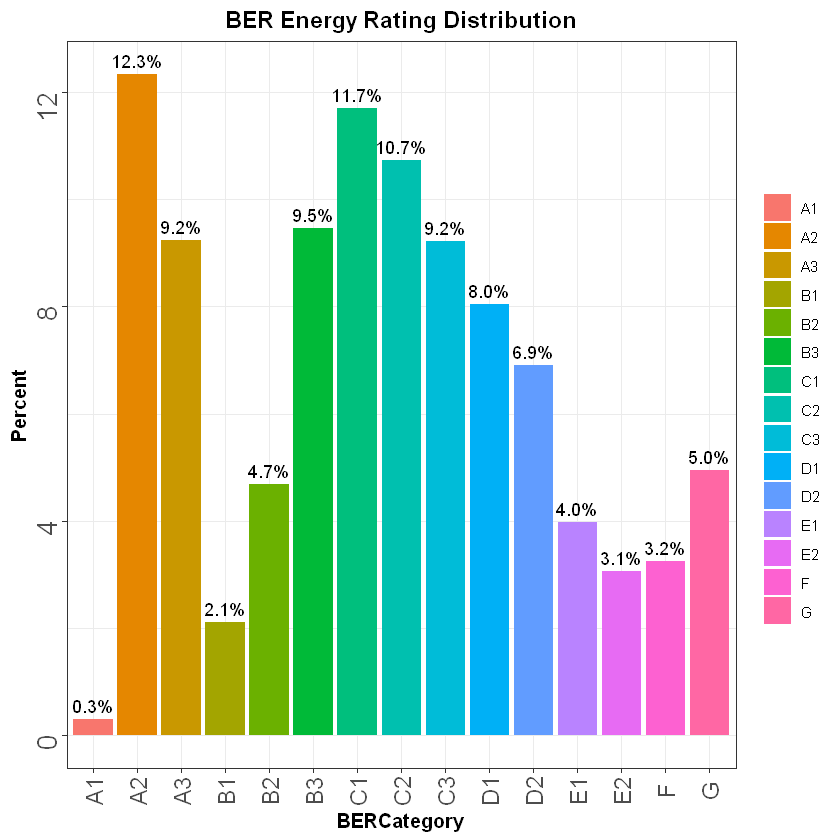

In [29]:
retrofitBER %>%
  group_by(BERCategory) %>% 
  summarise(Number = n()) %>%
  mutate(Percent = prop.table(Number)*100) %>% 
  ggplot(aes(BERCategory, Percent)) + 
  theme_bw()+
  geom_col(aes(fill = BERCategory)) +
  ggtitle("BER Energy Rating Distribution") +
  geom_text(aes(label = sprintf("%.1f%%", Percent)), vjust = -0.5) +
  theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) + 
  theme(plot.title = element_text(hjust = 0.5,size = 14, face = "bold"), 
        legend.title=element_blank())

retrofitBER %>%
  group_by(BERCategory) %>% 
  summarise(Number = n()) %>%
  mutate(Percent = prop.table(Number)*100) 

**<font color = green> c. Data distribution exploration for a selection of insulation and heating variables**</font>

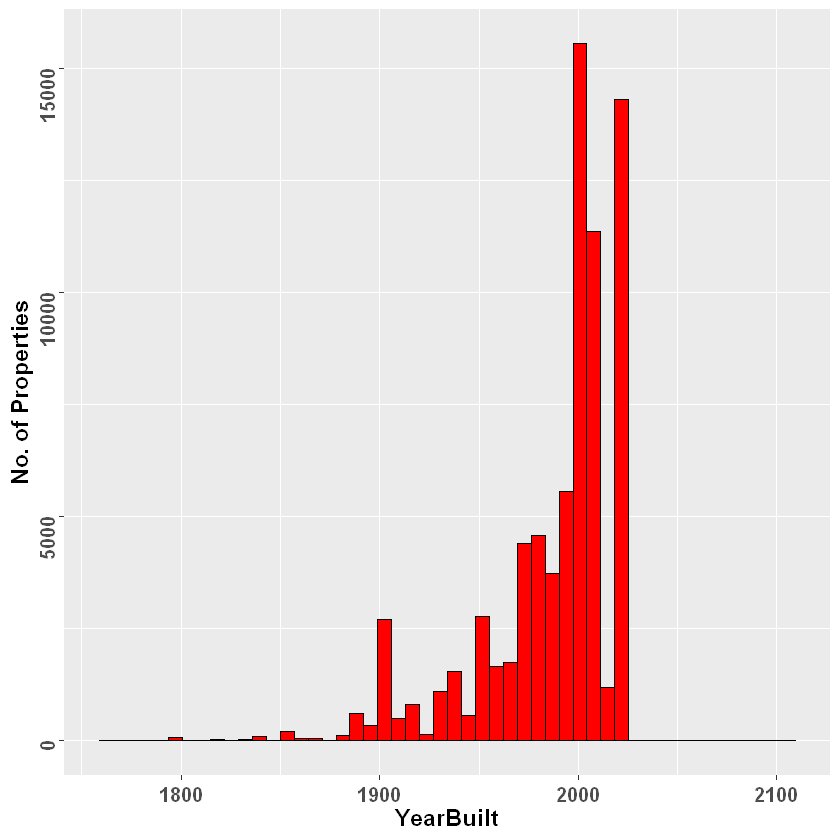

In [30]:
ggplot(data = retrofitBER) + geom_histogram(aes(x = YearBuilt), bins = 50, colour = "black", fill = "red") + labs(y = "No. of Properties") +
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(face="bold",angle=90, vjust=0.5, size=12)) 

[1] 1760

[1] 2104

,Type,YearBuilt,BERCategory,TotalFloorArea,WallArea,FloorArea,WindowArea,DoorArea,RoofArea,NoStoreys,...,PrimaryEnergyMainWater,PrimaryEnergySupplementaryWater,DeliveredEnergyMainSpace,DeliveredEnergySecondarySpace,PrimaryEnergyMainSpace,PrimaryEnergySecondarySpace,CO2MainSpace,CO2SecondarySpace,NoCentralHeatingPumps,OilBoilerThermo
,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
27298,Semi-detached house,2029,A2,143.00,117.00,80.20,37.30,2.35,80.20,2,...,2486.576,0,271.074,0.0,731.900,0.00,174.301,0.000,1,NO
68820,Detached house,2104,B1,190.59,132.19,190.59,111.98,3.64,190.59,1,...,7022.025,0,877.391,406.2,2368.956,446.82,564.162,10.155,1,NO


[1] 11.5

[1] 1423.78

[1] 0

[1] 5.91

[1] 0

[1] 670.95

Warning message:
"Removed 768 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 1294 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 1294 rows containing non-finite values (stat_bin)."


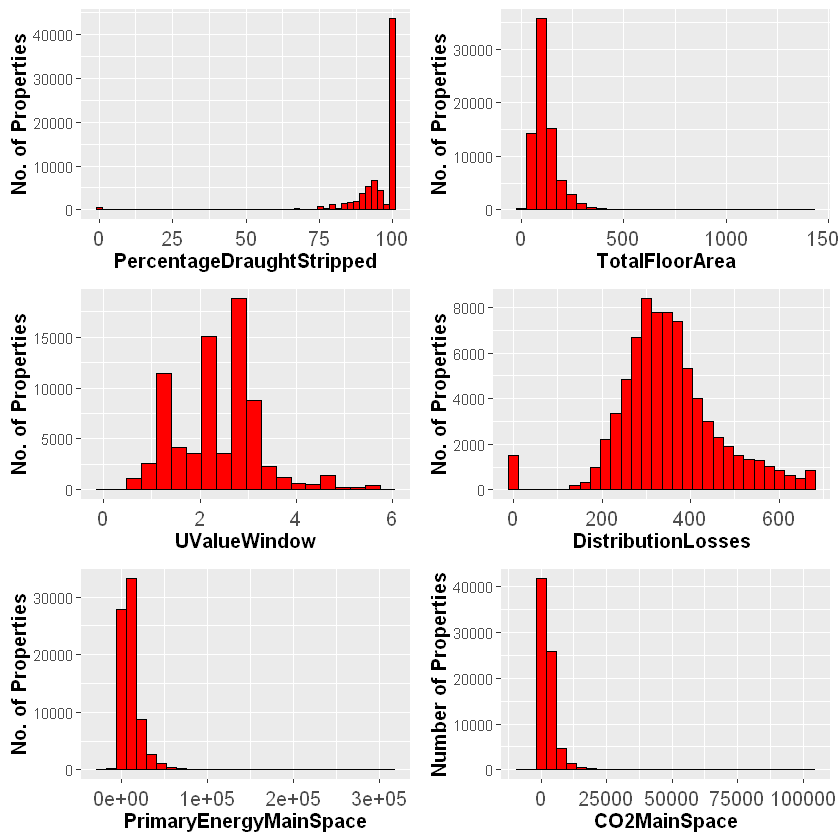

In [31]:
r1 <- ggplot(data = retrofitBER) + geom_histogram(aes(x = PercentageDraughtStripped), bins = 50, colour = "black", fill = "red") + labs(y = "No. of Properties") +
   theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12))
min(retrofitBER$YearBuilt)
max(retrofitBER$YearBuilt)
#examine outliers
retrofitBER[retrofitBER$YearBuilt>2021,]

#
r2 <-  ggplot(data = retrofitBER) + geom_histogram(aes(x = TotalFloorArea), bins = 30, colour = "black", fill = "red") + labs(y = "No. of Properties") +
   theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12))

min(retrofitBER$TotalFloorArea)
max(retrofitBER$TotalFloorArea)
#
r3 <-  ggplot(data = retrofitBER) + geom_histogram(aes(x = UValueWindow), bins = 20, colour = "black", fill = "red") + labs(y = "No. of Properties") +
   theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12))

min(retrofitBER$UValueWindow)
max(retrofitBER$UValueWindow)
#
r4 <-  ggplot(data = retrofitBER) + geom_histogram(aes(x = DistributionLosses), bins = 30, colour = "black", fill = "red") + labs(y = "No. of Properties") +
   theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12))

min(retrofitBER$DistributionLosses)
max(retrofitBER$DistributionLosses)
#
r5 <-  ggplot(data = retrofitBER) + geom_histogram(aes(x = PrimaryEnergyMainSpace), bins = 30, colour = "black", fill = "red") + labs(y = "No. of Properties") +
   theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text( vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12))

#
r6 <-  ggplot(data = retrofitBER) + geom_histogram(aes(x = CO2MainSpace), bins = 30, colour = "black", fill = "red") + labs(y = "Number of Properties") +
   theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12))

#
grid.arrange(r1, r2, r3, r4, r5,r6,  ncol=2, nrow =3)

**<font color = green> d. Update variable formats e.g. Year numeric to categorical**</font>

In [32]:
str(retrofitBER)
# start with binning year by examining distribution and defining breaks
sort(unique(retrofitBER$YearBuilt))
# drop the rows where the year is greater than 2020 (as this is data assessed in could not look into the future)
retrofitBER<-subset(retrofitBER[retrofitBER$YearBuilt<2021,],)
# cut and label
retrofitBER$YearBuilt = cut(retrofitBER$YearBuilt, breaks= c(1750, 1800, 1850, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1985, 1990, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021), ordered_result=TRUE) 

'data.frame':	76004 obs. of  54 variables:
 $ Type                           : chr  "Terraced House" "Semi-detached house" "Semi-detached house" "Detached house" ...
 $ YearBuilt                      : int  1900 1988 2003 2003 2000 2003 1996 1900 1979 1940 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ TotalFloorArea                 : num  49.9 101.8 117.9 144.4 149.1 ...
 $ WallArea                       : num  46.4 115.2 111.8 133 142.4 ...
 $ FloorArea                      : num  28.5 61 73.5 78.7 63.6 ...
 $ WindowArea                     : num  8.53 23.63 18.55 19.88 28.36 ...
 $ DoorArea                       : num  0 3.89 1.85 3.7 3.7 1.99 1.85 1.78 5.87 0 ...
 $ RoofArea                       : num  27.6 61.5 73.5 80.7 65 ...
 $ NoStoreys                      : int  2 2 2 2 3 3 1 1 2 1 ...
 $ UValueWindow                   : num  1.59 2.9 2.56 3.1 3.1 2.72 2.8 2.2 2.8 2.28 ...
 $ UValueDoor                     : num  

[1] 1760 1770 1780 1785 1788 1790 1793 1796 1798 1800 1806 1810 1811 1812 1817
 [16] 1818 1820 1825 1826 1829 1830 1832 1836 1837 1838 1839 1840 1841 1842 1843
 [31] 1845 1846 1847 1848 1849 1850 1852 1853 1854 1855 1856 1857 1860 1861 1862
 [46] 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1875 1876 1878 1879 1880
 [61] 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
 [76] 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910
 [91] 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
[106] 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
[121] 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
[136] 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
[151] 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
[166] 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
[181] 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
[196] 2016 2017 2018 2019 2020 2021 2029 2104

**<font color = green> e. Tidy the data, fix NAs, rename levels etc. First look at the number of NAs per attribute**</font>

In [33]:
sapply(retrofitBER, function(x) sum(is.na(x)))

Type                       YearBuilt 
                              0                               0 
                    BERCategory                  TotalFloorArea 
                              0                               0 
                       WallArea                       FloorArea 
                              0                               0 
                     WindowArea                        DoorArea 
                              0                               0 
                       RoofArea                       NoStoreys 
                              0                               0 
                   UValueWindow                      UValueDoor 
                              0                               0 
                     UValueRoof                     UValueFloor 
                              0                               0 
                     UValueWall                        HeatType 
                              0                            1294 
                  WaterHeatType                    NoOfChimneys 
                           1294                             768 
                  NoOfOpenFlues                NoOfFansAndVents 
                            768                             768 
           NoOfFluelessGasFires                     SealedPorch 
                            776                             768 
                  StructureType            SuspendedWoodenFloor 
                            768                             768 
              VentilationMethod       PercentageDraughtStripped 
                            768                             768 
             NoOfSidesSheltered         NoOilBoilerHeatingPumps 
                            768                               0 
          ThermoControledBoiler                 OilBoilerInside 
                              0                               0 
        NoGasBoilerHeatingPumps            WarmAirHeatingSystem 
                              0                               0 
              LaggingJacketType             InsulationThickness 
                          75979                           75979 
        DeliveredLightingEnergy           PrimaryEnergyLighting 
                              0                               0 
                    CO2Lighting        LowEnergyLightingPercent 
                              0                               0 
             DistributionLosses              WaterStorageVolume 
                              0                           75979 
                WHMainSystemEff                  WHEffAdjFactor 
                           1294                            1294 
            ThermalMassCategory          PrimaryEnergyPumpsFans 
                              0                               0 
         PrimaryEnergyMainWater PrimaryEnergySupplementaryWater 
                           1294                               0 
       DeliveredEnergyMainSpace   DeliveredEnergySecondarySpace 
                              0                               0 
         PrimaryEnergyMainSpace     PrimaryEnergySecondarySpace 
                           1294                            1294 
                   CO2MainSpace               CO2SecondarySpace 
                           1294                            1294 
          NoCentralHeatingPumps                 OilBoilerThermo 
                              0                               0

**<font color = green> d. Examine each attribute and its relationship to the BER Cateorgy. If it is different per cateogy then keep it, if the same across all cateogires, then it does not have an impact and can be removed**</font>

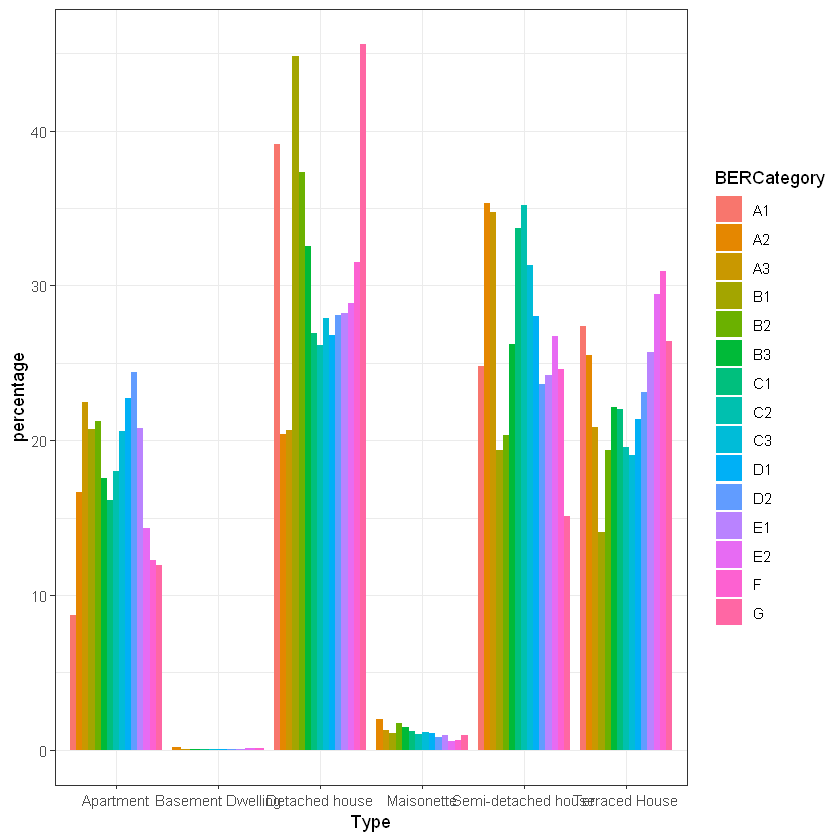

In [34]:
# Property Type: different percentage for different classes so it does have an impact - keep it
retrofitBER %>% 
  group_by(BERCategory,Type) %>% 
  tally() %>% 
  complete(Type, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(Type, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

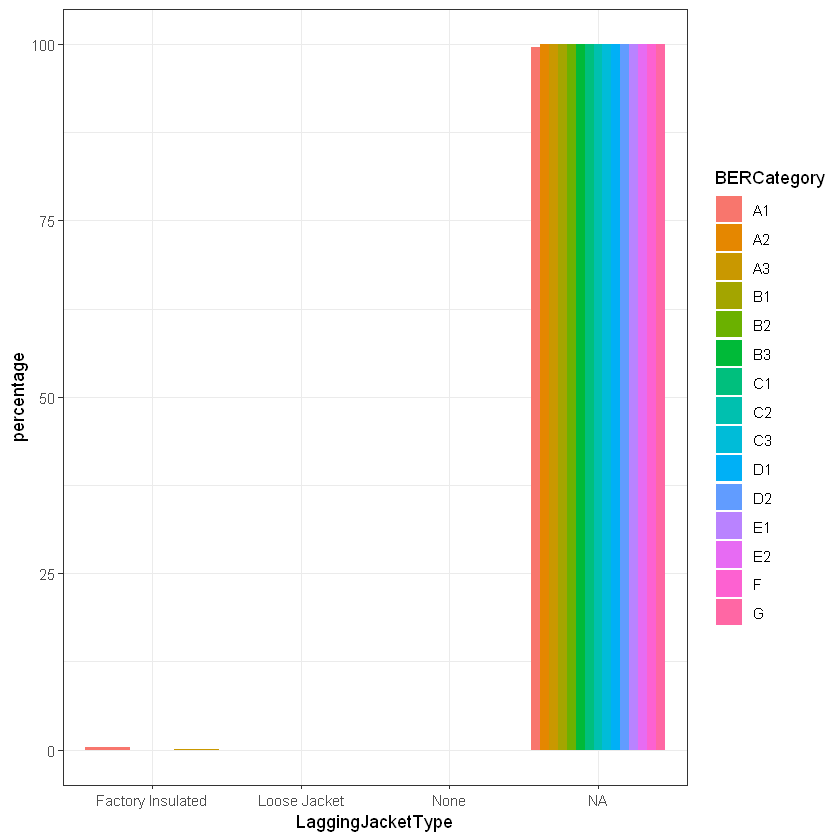

In [35]:
# Lagging Jacket and Insulation Thickness - Very few rows populated (76K NAs) - remove both of these
retrofitBER %>% 
  group_by(BERCategory,LaggingJacketType) %>% 
  tally() %>% 
  complete(LaggingJacketType, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(LaggingJacketType, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

,HeatType
,<chr>
1,Mains Gas
9,Heating Oil
13,NA
35,Electricity
65,Solid Multi-Fuel
175,Bulk LPG (propane or butane)
305,Wood Pellets (bulk supply for
352,Manufactured Smokeless Fuel
407,Bottled LPG


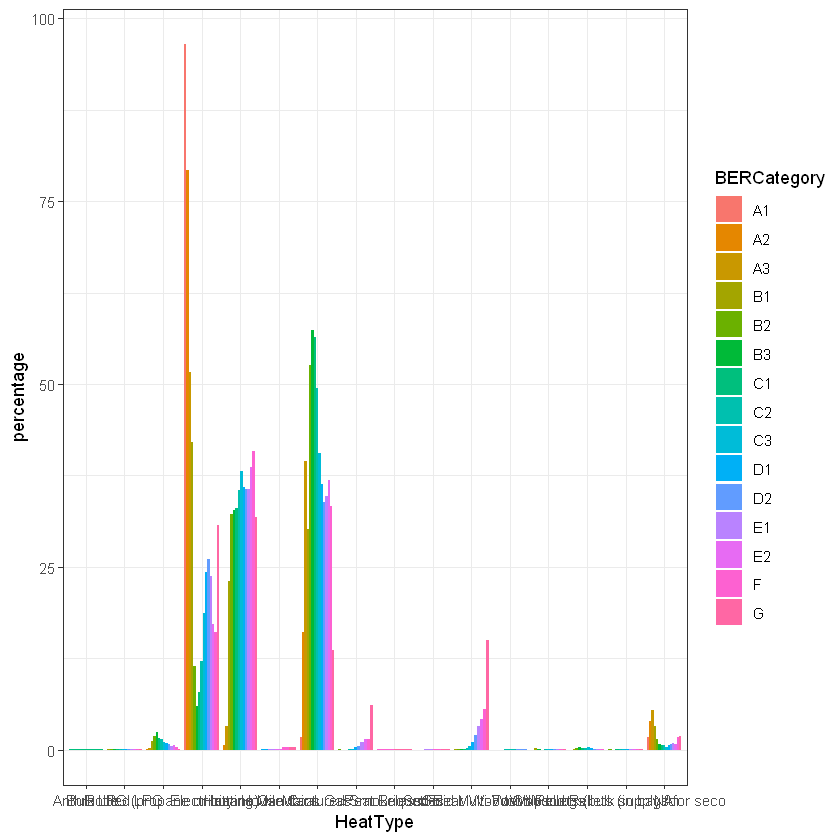

In [36]:
# Type of Heating system: different percentage per classes so possible impact on BER - keep this
retrofitBER %>% 
  group_by(BERCategory,HeatType) %>% 
  tally() %>% 
  complete(HeatType, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(HeatType, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# Fix the strings and drop the NAs as ther is no way to impute the heat type - 768 rows
unique(retrofitBER[c("HeatType")])
retrofitBER$HeatType[retrofitBER$HeatType == "Bulk LPG (propane or butane)"] <- "Bulk LPG"
retrofitBER$HeatType[retrofitBER$HeatType == "Electricity - On-peak Night-Ra"] <- "Electricity"
retrofitBER$HeatType[retrofitBER$HeatType == "Electricity - Off-peak Night-R"] <- "Electricity"
retrofitBER$HeatType[retrofitBER$HeatType == "Electricity - Standard Domesti"] <- "Electricity"
retrofitBER$HeatType[retrofitBER$HeatType == "Solid Multi-Fuel"] <- "Multi-Fuel"
retrofitBER$HeatType[retrofitBER$HeatType == "Wood Pellets (bulk supply for"] <- "Wood Pellets"
retrofitBER$HeatType[retrofitBER$HeatType == "Solid Multi-Fuel"] <- "Multi-Fuel"
retrofitBER$HeatType[retrofitBER$HeatType == "Manufactured Smokeless Fuel"] <- "Smokeless"
retrofitBER$HeatType[retrofitBER$HeatType == "Wood Pellets (in bags for seco"] <- "Wood Pellets"
retrofitBER$HeatType[retrofitBER$HeatType == "Peat Briquettes"] <- "Briquettes"
retrofitBER <- retrofitBER %>% 
  filter_at(vars(HeatType), any_vars(!is.na(.)))

,WaterHeatType
,<chr>
1,Mains Gas
9,Heating Oil
23,Electricity
54,Solid Multi-Fuel
153,Bulk LPG (propane or butane)
282,Wood Pellets (bulk supply for
329,Manufactured Smokeless Fuel
384,Bottled LPG
750,Wood Pellets (in bags for seco


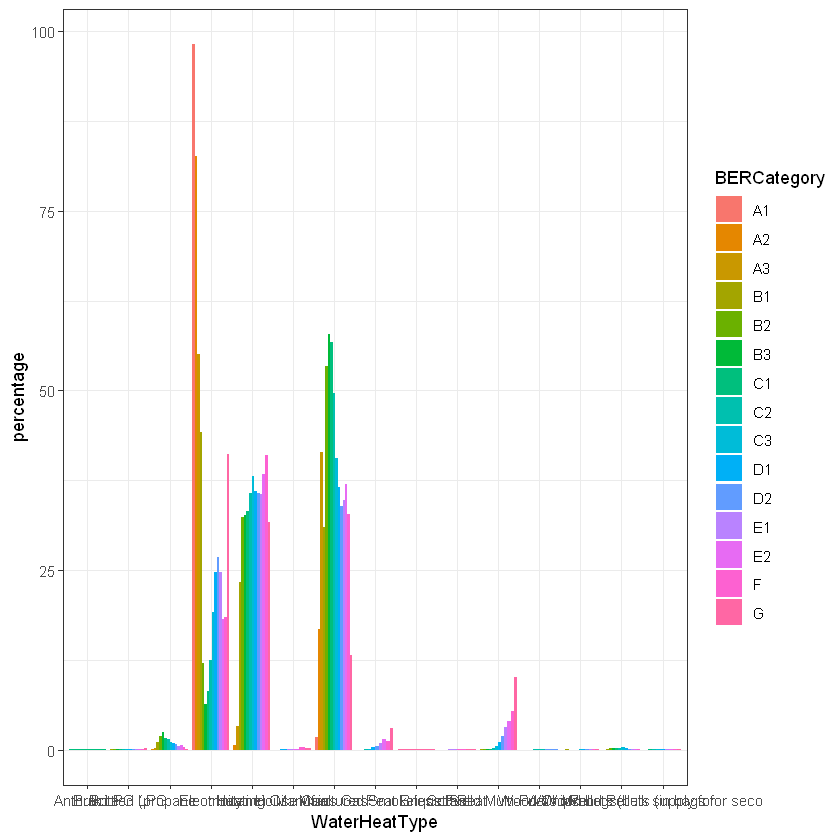

In [37]:
# Type of Water Heating system: different percentage for different classes so it does have an impact- keep it
retrofitBER %>% 
  group_by(BERCategory,WaterHeatType) %>% 
  tally() %>% 
  complete(WaterHeatType, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(WaterHeatType, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# water heating - Fix the strings as per heat type and no need to drop the NAs as they were the same as the Heat type NAs
unique(retrofitBER[c("WaterHeatType")])
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Bulk LPG (propane or butane)"] <- "Bulk LPG"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Electricity - On-peak Night-Ra"] <- "Electricity"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Electricity - Off-peak Night-R"] <- "Electricity"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Electricity - Standard Domesti"] <- "Electricity"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Wood Pellets (in bags for seco"] <- "Wood Pellets"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Wood Pellets (bulk supply for"] <- "Wood Pellets"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Manufactured Smokeless Fuel"] <- "Smokeless"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Biodiesel from renewable sourc"] <- "BioDeisel"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Solid Multi-Fuel"] <- "Multi-Fuel"
retrofitBER$WaterHeatType[retrofitBER$WaterHeatType == "Peat Briquettes"] <- "Briquettes"

,SealedPorch
,<chr>
1,NO
8,YES
1536,NA


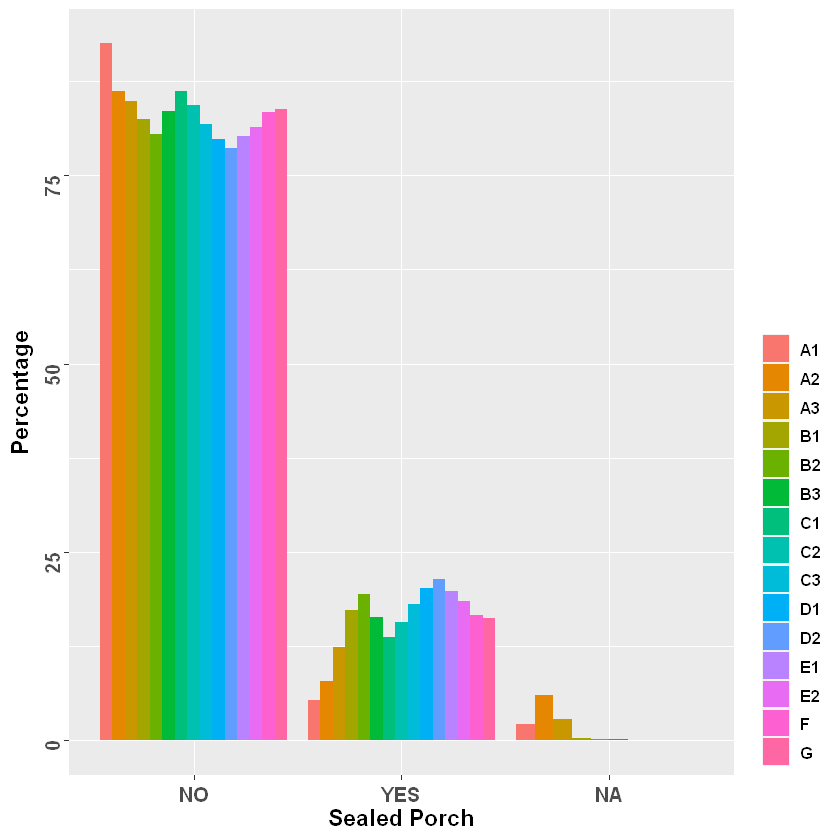

In [38]:
# Sealed Porch: different percentage for different classes so it does have an impact- keep it
retrofitBER %>% 
  group_by(BERCategory,SealedPorch) %>% 
  tally() %>% 
  complete(SealedPorch, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(SealedPorch, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  xlab(expression(paste(bold('Sealed Porch')))) +
  ylab(expression(paste(bold('Percentage')))) +
    theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

# Porch - 768 rows and no way to determine if they have or have not
unique(retrofitBER[c("SealedPorch")])
retrofitBER <- retrofitBER %>% filter_at(vars(SealedPorch), any_vars(!is.na(.)))

,StructureType
,<chr>
1,Masonry
4,Timber or Steel Frame
16,Please select
3182,Insulated Conctete Form


[1] 13492

[1] "Masonry"

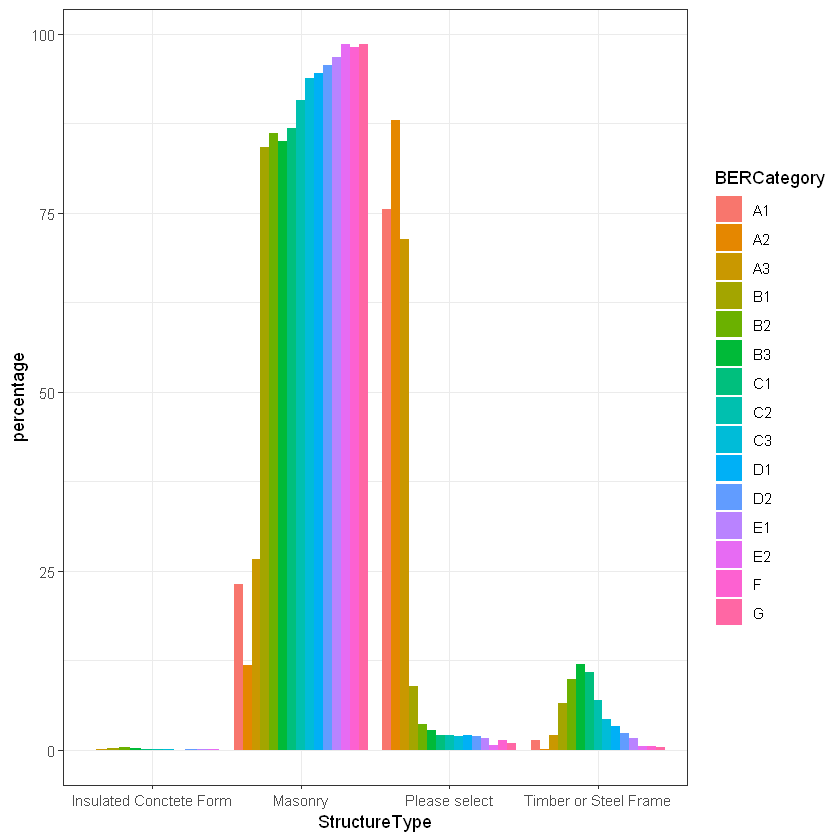

In [39]:
# House Structure: different percentage for different classes so it does have an impact- keep it
retrofitBER %>% 
  group_by(BERCategory,StructureType) %>% 
  tally() %>% 
  complete(StructureType, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(StructureType, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# Structure - 13K 'Please Select' rows (not filled in). 
# All but 2 of the A1s contain 'please select' so this causes a problem in the model training
# need to impute - nominal variable so impute the mode (masonry)
unique(retrofitBER[c("StructureType")])
nrow(retrofitBER[retrofitBER$StructureType == "Please select",])
# seems to be no pattern to the structure type in relation to the BER category so use the mode
Mode(retrofitBER$StructureType)
retrofitBER$StructureType[retrofitBER$StructureType  == "Please select"]  <- Mode(retrofitBER$StructureType)
# fix the names
retrofitBER$StructureType[retrofitBER$StructureType == "Timber or Steel Frame"] <- "Timber or Steel"
retrofitBER$StructureType[retrofitBER$StructureType == "Insulated Conctete Form"] <- "Insulated Concrete"

Warning message:
"Removed 4 rows containing missing values (geom_bar)."


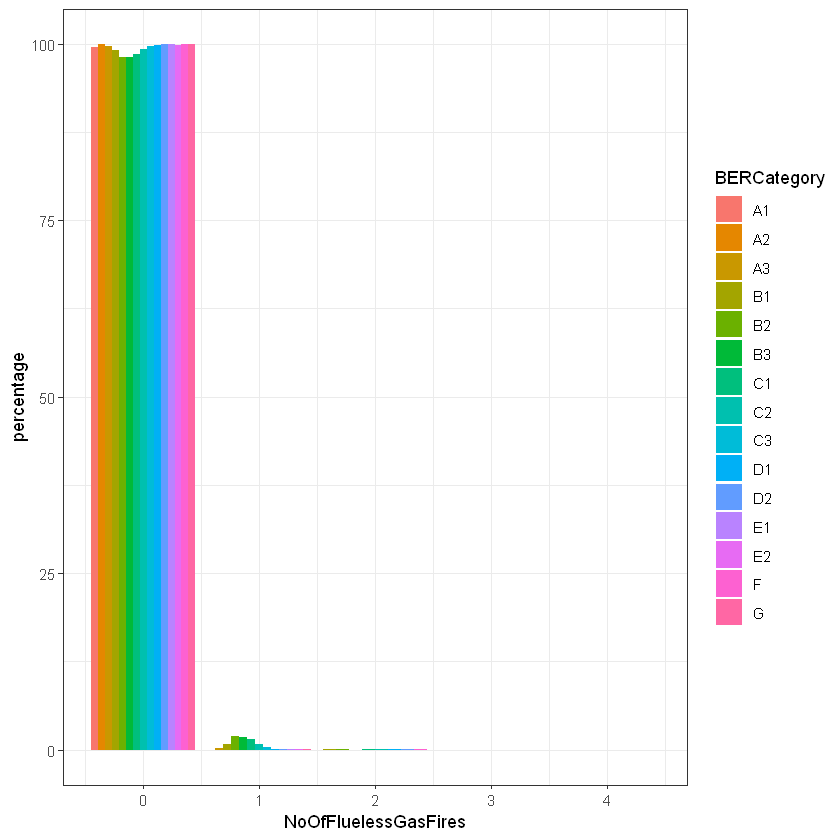

In [40]:
#Flueless Gas Fires: very little difference between the classes for yes or no - remove it 
retrofitBER %>% 
  group_by(BERCategory,NoOfFluelessGasFires) %>% 
  tally() %>% 
  complete(NoOfFluelessGasFires, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoOfFluelessGasFires, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

,VentilationMethod
,<chr>
1,Natural vent.
94,Whole house extract vent.
104,Bal.whole mech.vent heat recvr
482,Pos input vent.- outside
1421,Pos input vent.- loft
2926,Bal.whole mech.vent no heat re


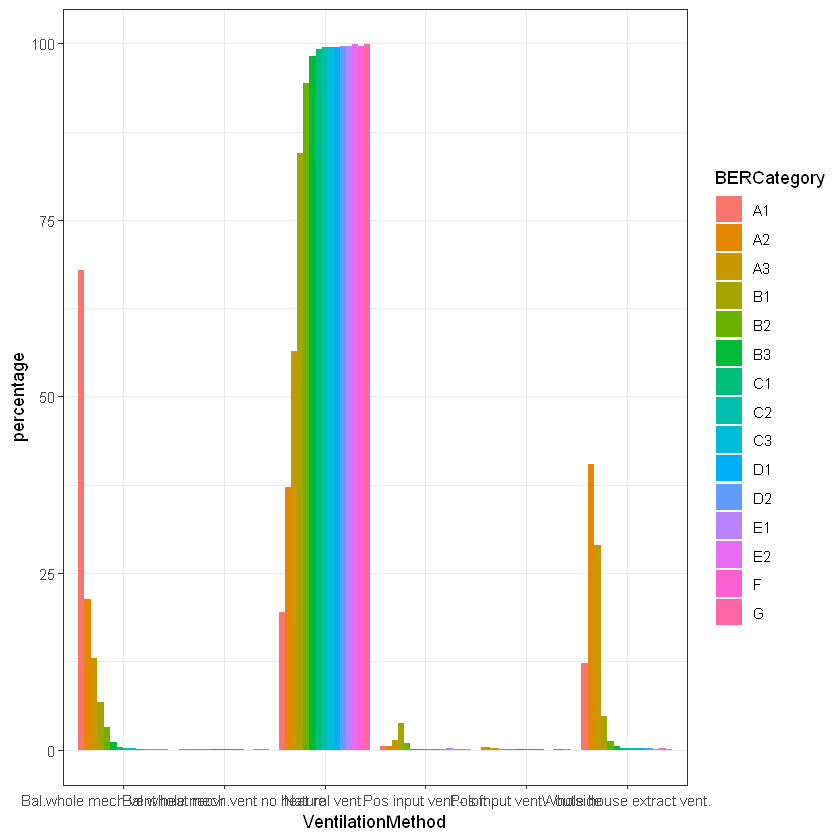

In [41]:
# ventilation : keep it
retrofitBER %>% 
  group_by(BERCategory,VentilationMethod ) %>% 
  tally() %>% 
  complete(VentilationMethod , fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(VentilationMethod , percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# ventilation method - rename categories, no NA to handle
unique(retrofitBER[c("VentilationMethod")])
retrofitBER$VentilationMethod[retrofitBER$VentilationMethod == "Natural vent."] <- "Natural"
retrofitBER$VentilationMethod[retrofitBER$VentilationMethod == "Whole house extract vent."] <- "Whole house"
retrofitBER$VentilationMethod[retrofitBER$VentilationMethod == "Bal.whole mech.vent no heat re"] <- "No heat recvr"
retrofitBER$VentilationMethod[retrofitBER$VentilationMethod == "Bal.whole mech.vent heat recvr"] <- "Heat recvr"
retrofitBER$VentilationMethod[retrofitBER$VentilationMethod == "Pos input vent.- outside"] <- "Vent outside"
retrofitBER$VentilationMethod[retrofitBER$VentilationMethod == "Pos input vent.- loft"] <- "Vent loft"

,SuspendedWoodenFloor
,<chr>
1,No
2,Yes (Unsealed)
194,Yes (Sealed)


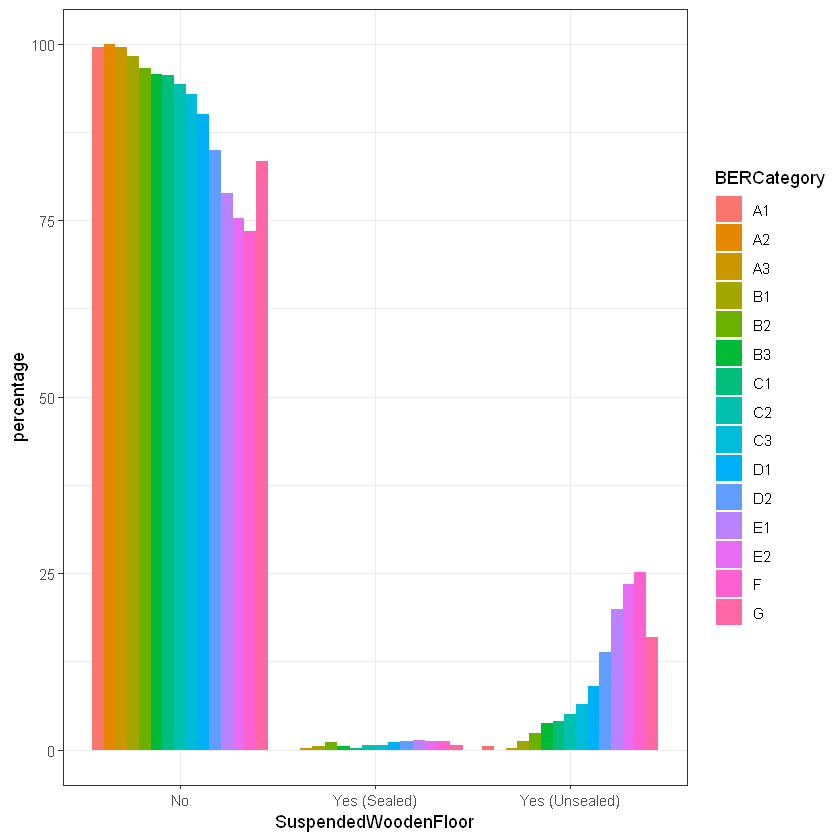

In [42]:
# Suspended wooden floor: keep it
retrofitBER %>% 
  group_by(BERCategory,SuspendedWoodenFloor ) %>% 
  tally() %>% 
  complete(SuspendedWoodenFloor , fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(SuspendedWoodenFloor , percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# wooden floor - rename categories
unique(retrofitBER[c("SuspendedWoodenFloor")])
retrofitBER$SuspendedWoodenFloor[retrofitBER$SuspendedWoodenFloor == "Yes (Unsealed)"] <- "UnSealed"
retrofitBER$SuspendedWoodenFloor[retrofitBER$SuspendedWoodenFloor == "Yes (Sealed)"] <- "Sealed"

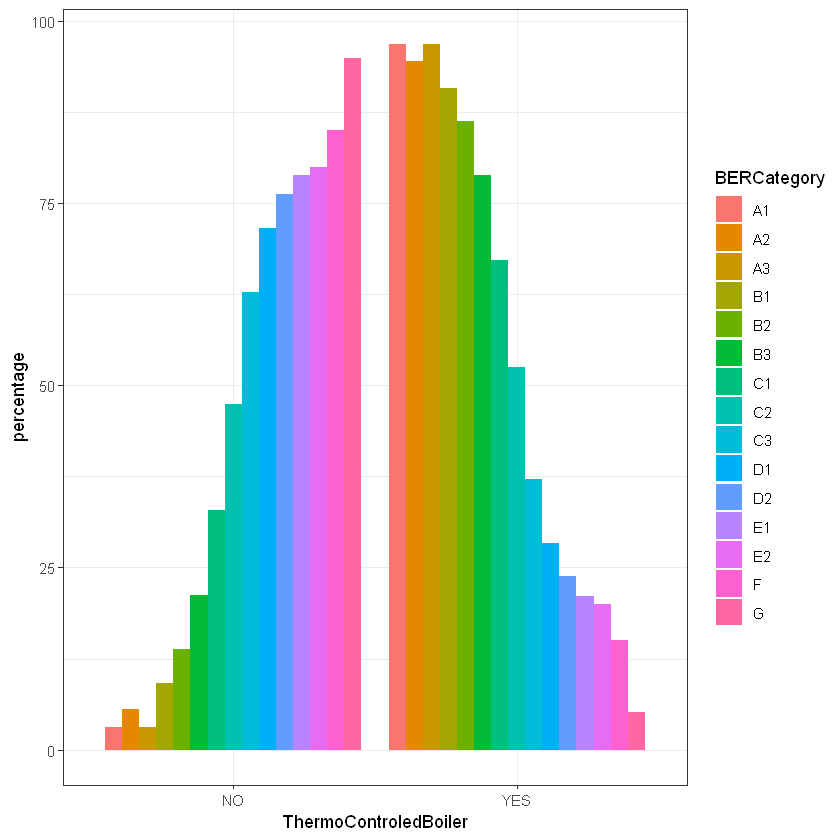

In [43]:
# ThermoControledBoiler, impact on the ratings: keep it
retrofitBER %>% 
  group_by(BERCategory,ThermoControledBoiler) %>% 
  tally() %>% 
  complete(ThermoControledBoiler            , fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(ThermoControledBoiler            , percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

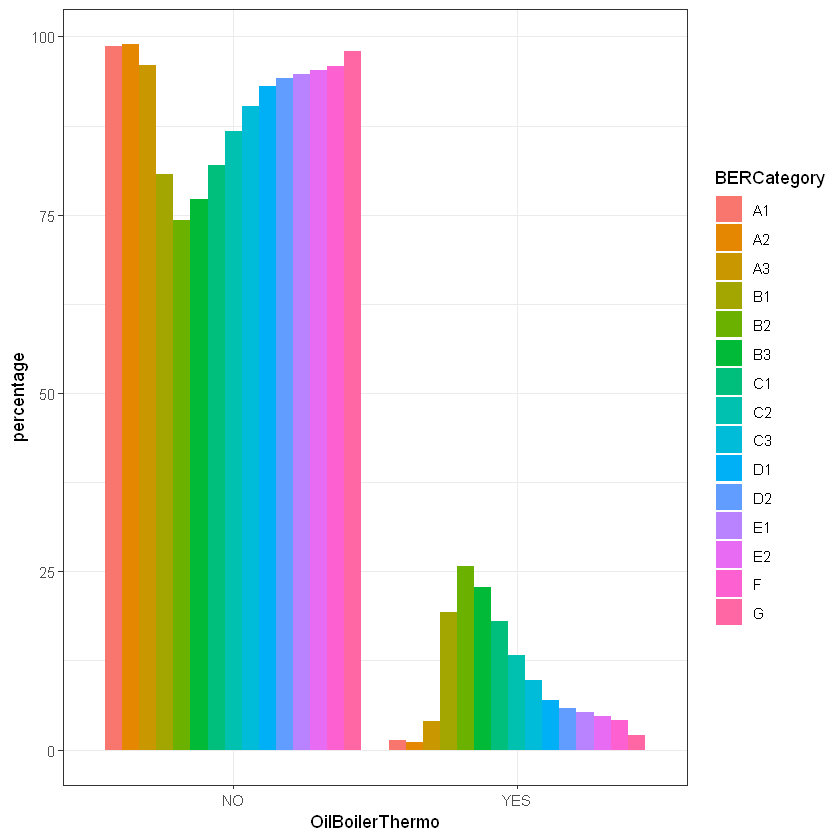

In [44]:
# OilBoilerThermo- keep it
retrofitBER %>% 
  group_by(BERCategory,OilBoilerThermo) %>% 
  tally() %>% 
  complete(OilBoilerThermo, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(OilBoilerThermo, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

,ThermoControledBoiler
,<chr>
1,NO
3,YES


,OilBoilerThermo
,<chr>
1,NO
22,YES


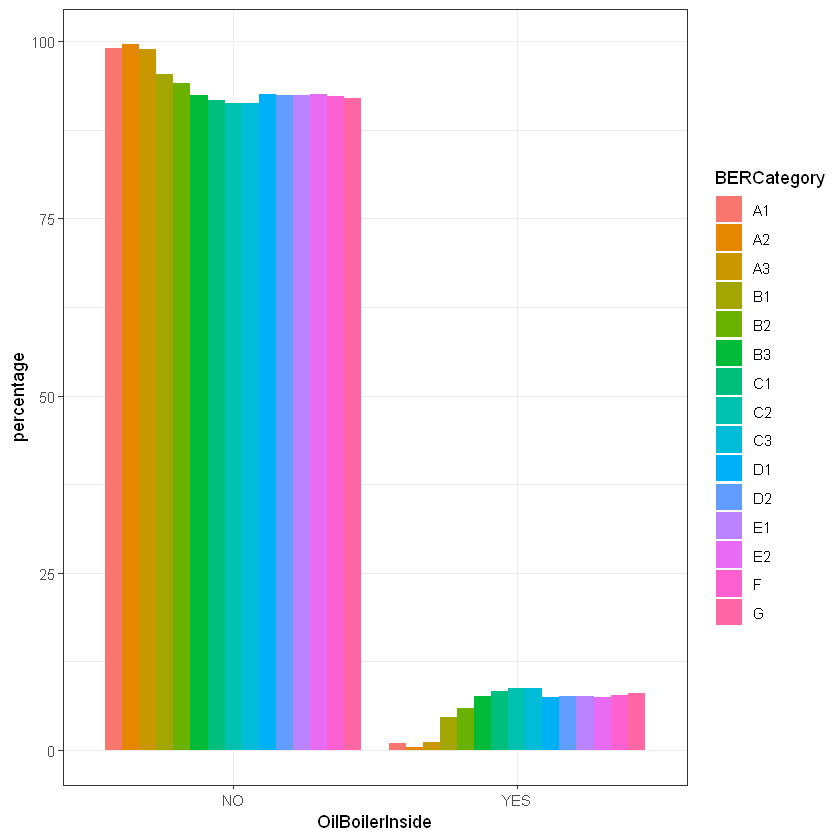

In [45]:
# OilBoilerInside- very little impact on the ratings - remove it
retrofitBER %>% 
  group_by(BERCategory,OilBoilerInside) %>% 
  tally() %>% 
  complete(OilBoilerInside, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(OilBoilerInside, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# check the values for the boilers
unique(retrofitBER[c("ThermoControledBoiler")])
unique(retrofitBER[c("OilBoilerThermo")])

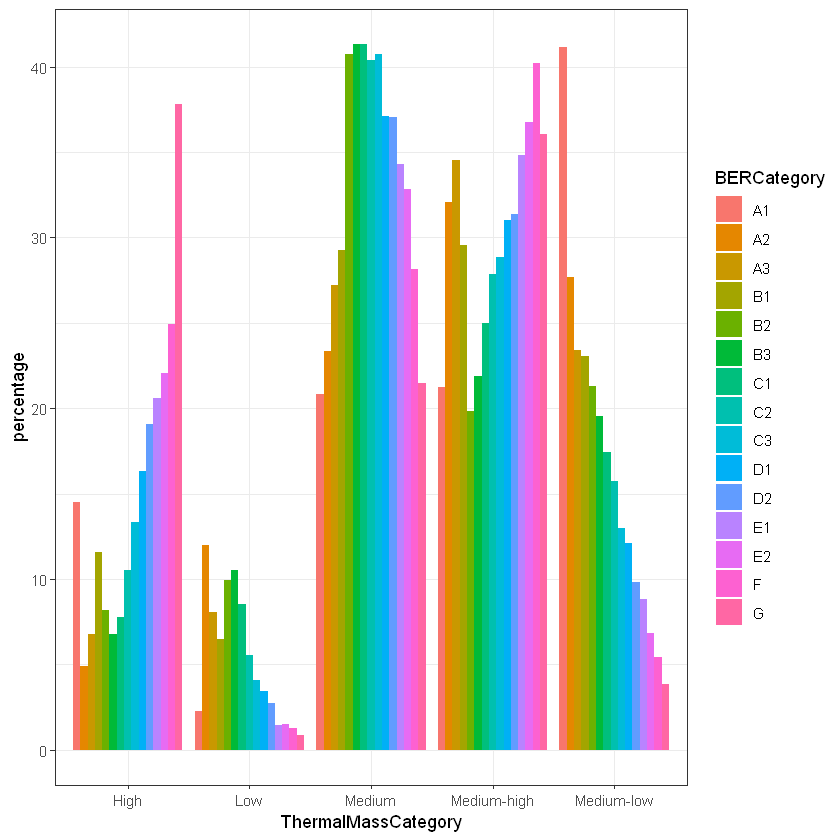

In [46]:
# ThermalMassCategory - big impact - keep it
retrofitBER %>% 
  group_by(BERCategory,ThermalMassCategory) %>% 
  tally() %>% 
  complete(ThermalMassCategory, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(ThermalMassCategory, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

In [47]:
# WaterStorageVolume - only 9 populated rows and no way to impute what the values might be so - remove it    
unique(retrofitBER[c("WaterStorageVolume")])

,WaterStorageVolume
,<int>
1,NA
5304,200
7754,180
15744,95
58141,120
58278,176
63992,0


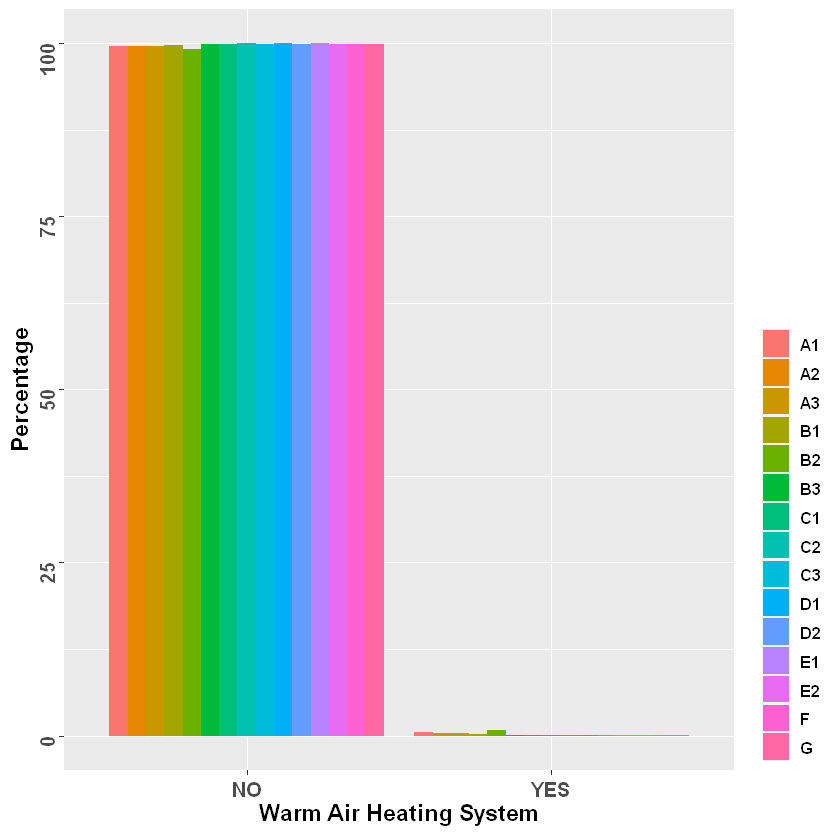

In [48]:
# Type of Warm Air Heating: very little difference between the classes for yes or no - remove it
  retrofitBER %>% 
    group_by(BERCategory,WarmAirHeatingSystem) %>% 
    tally() %>% 
    complete(WarmAirHeatingSystem, fill = list(n = 0)) %>% 
  mutate(Percentage = n / sum(n) * 100) %>%
  ggplot(aes(WarmAirHeatingSystem, Percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  xlab(expression(paste(bold('Warm Air Heating System')))) +
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

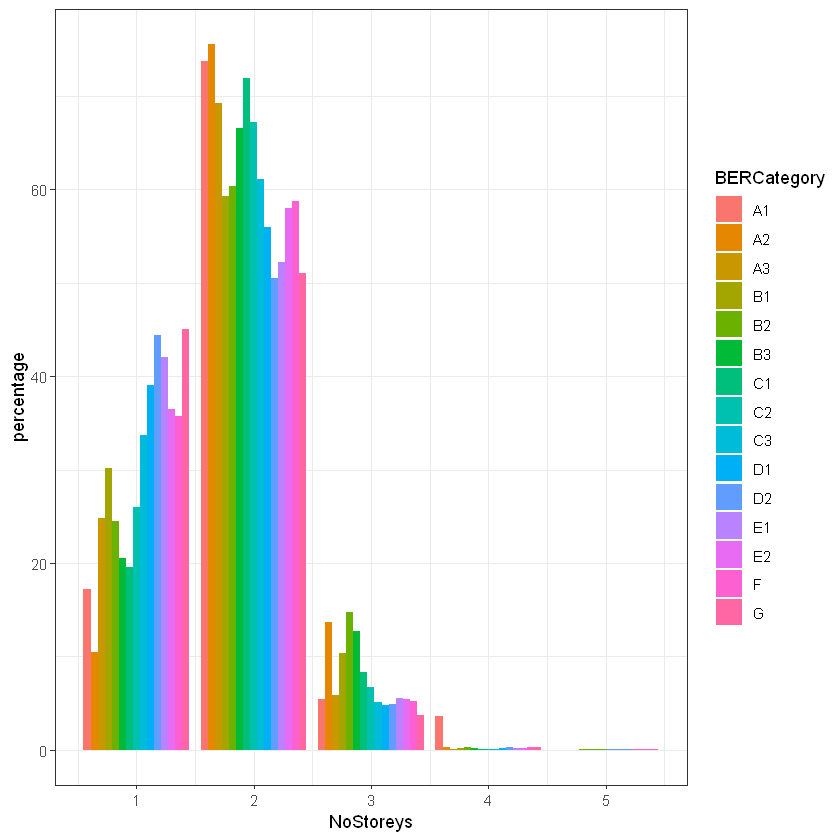

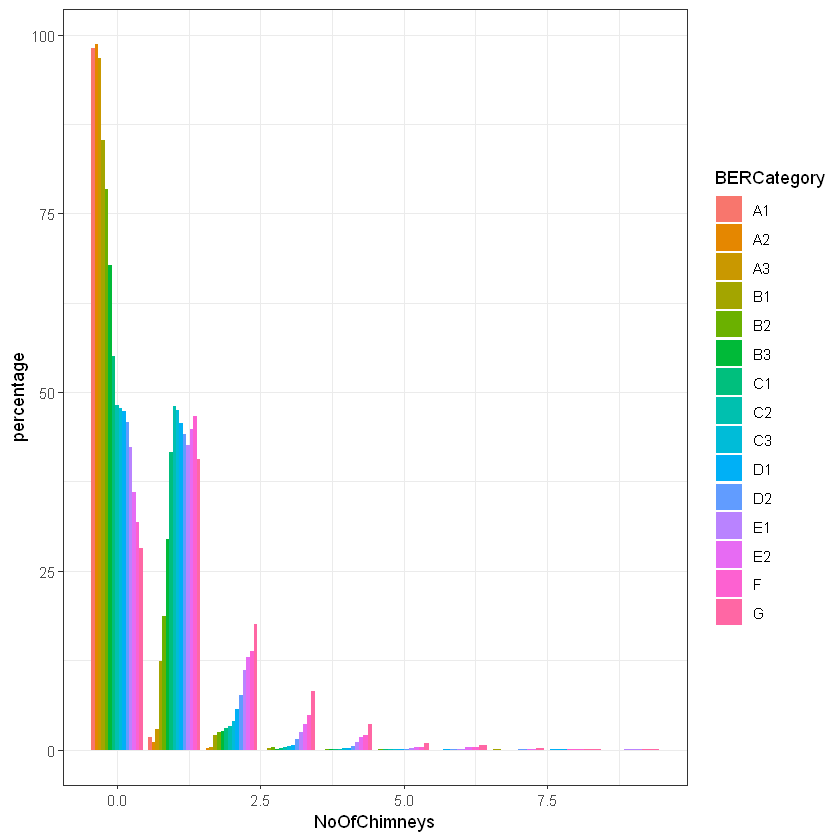

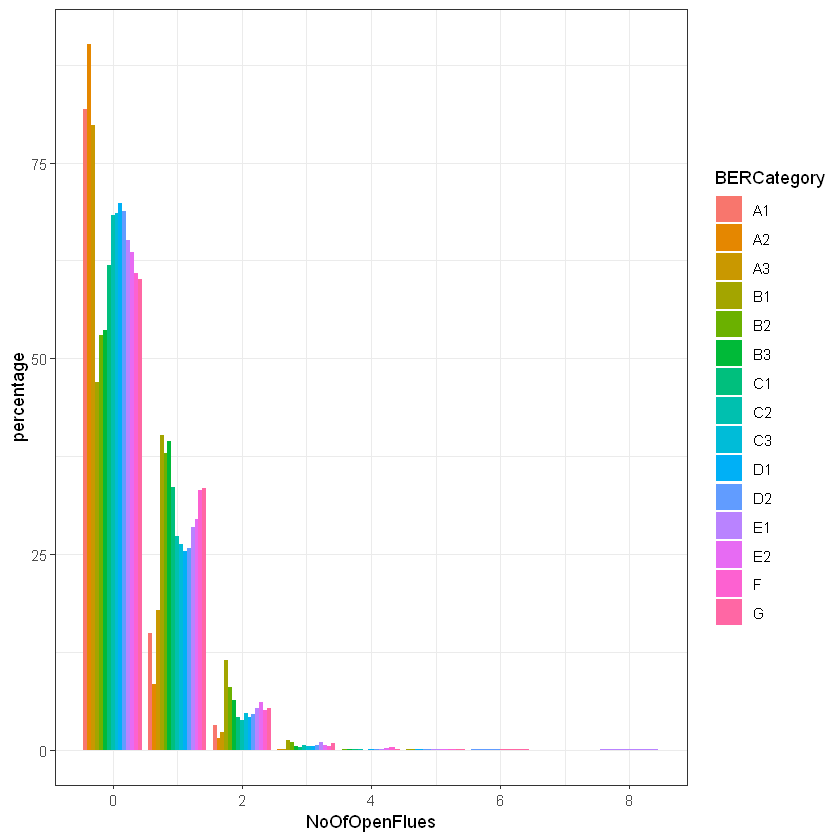

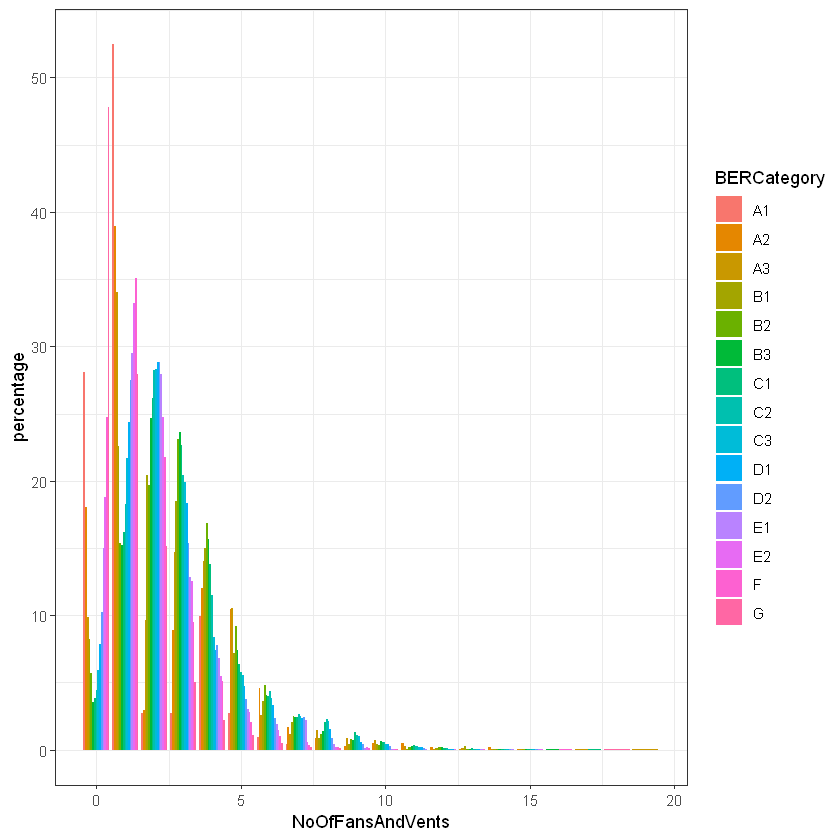

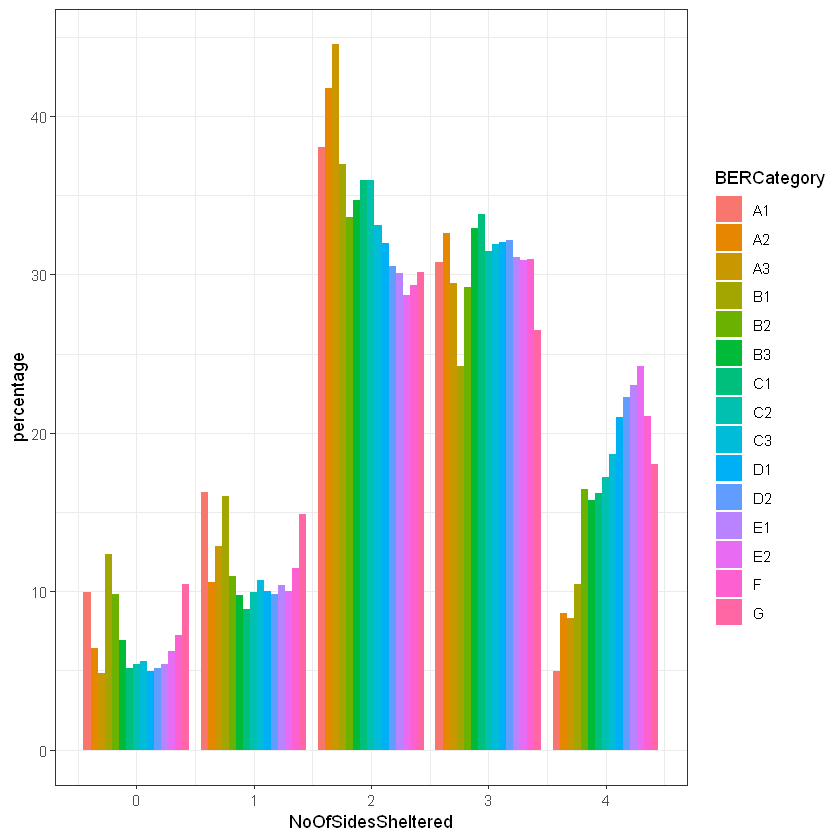

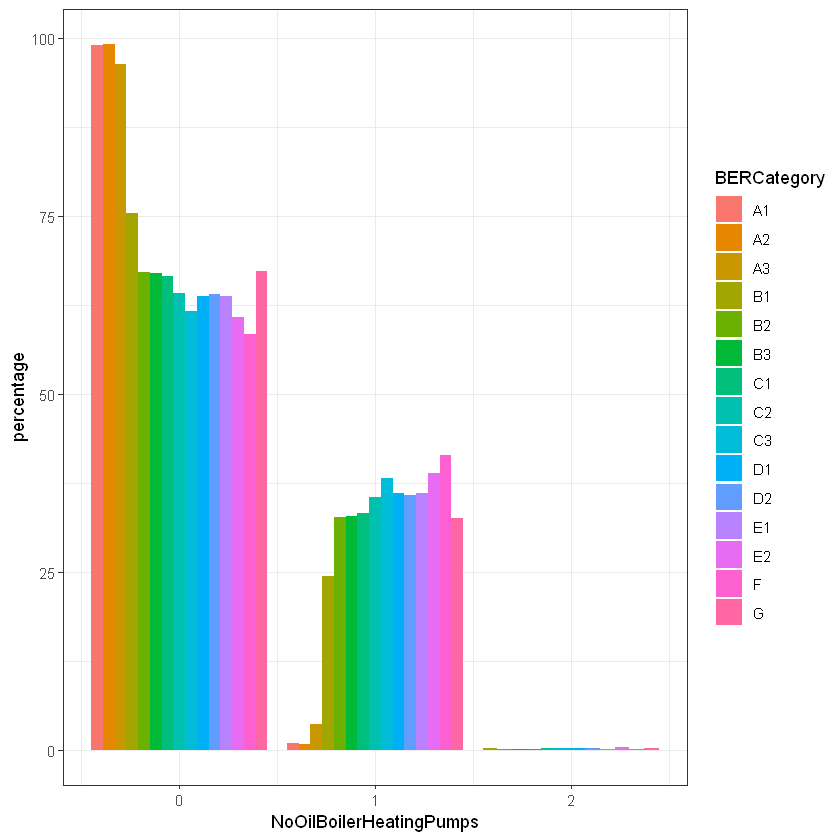

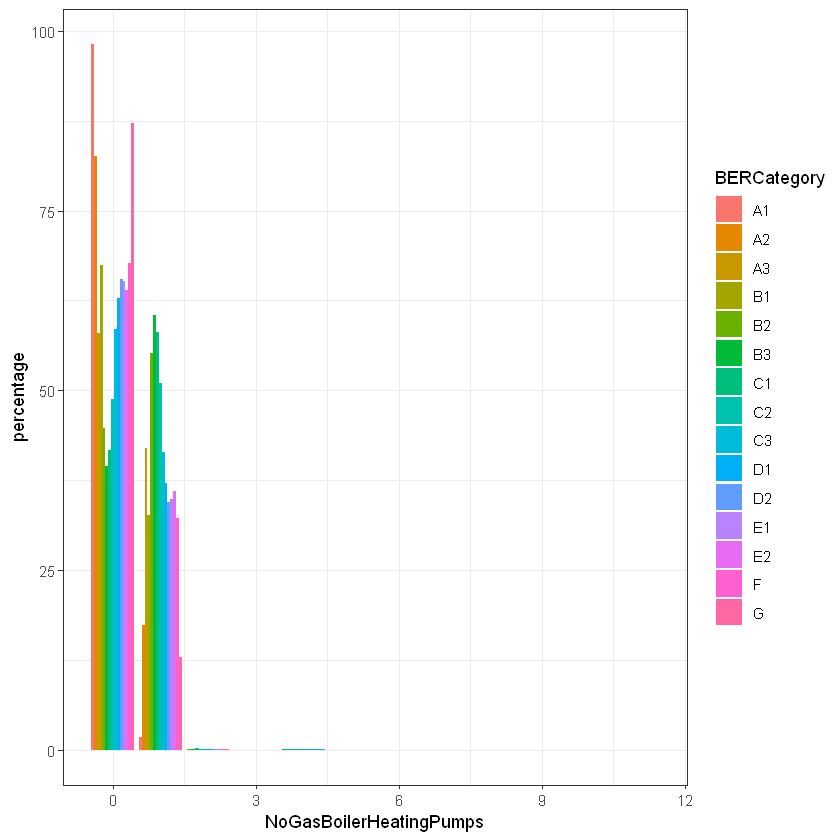

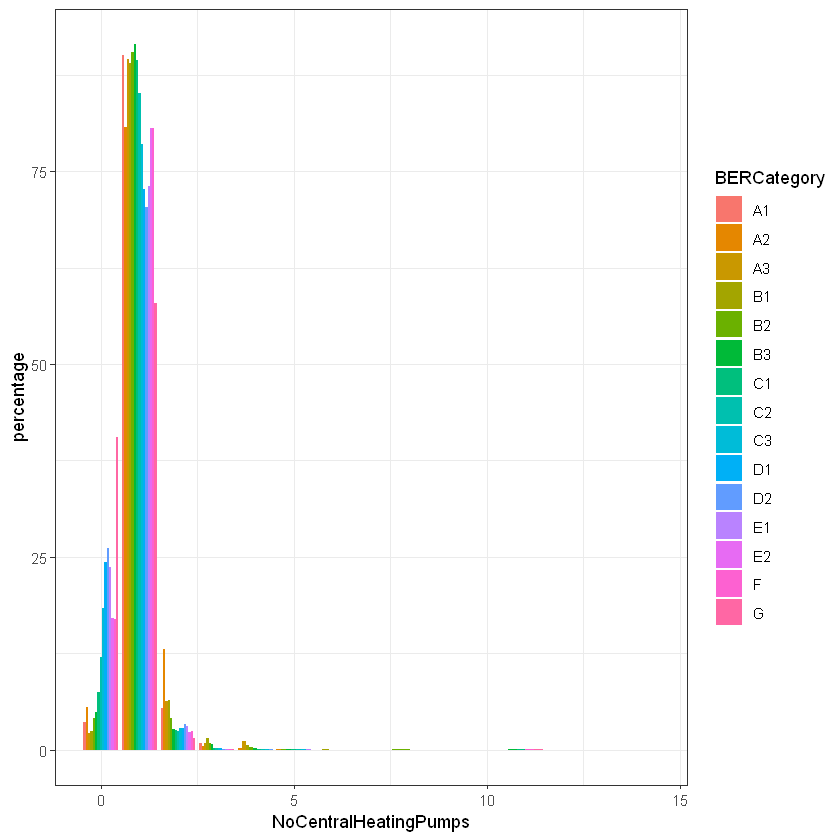

In [49]:
# NoStoreys: keep it
retrofitBER %>% 
  group_by(BERCategory,NoStoreys) %>% 
  tally() %>% 
  complete(NoStoreys, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoStoreys, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# NoOfChimneys: keep it
retrofitBER %>% 
  group_by(BERCategory,NoOfChimneys) %>% 
  tally() %>% 
  complete(NoOfChimneys, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoOfChimneys, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# NoOfOpenFlues: keep it
retrofitBER %>% 
  group_by(BERCategory,NoOfOpenFlues) %>% 
  tally() %>% 
  complete(NoOfOpenFlues, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoOfOpenFlues, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# NoOfFansAndVents: keep it
retrofitBER %>% 
  group_by(BERCategory,NoOfFansAndVents) %>% 
  tally() %>% 
  complete(NoOfFansAndVents, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoOfFansAndVents, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# NoOfSidesSheltered: keep it
retrofitBER %>% 
  group_by(BERCategory,NoOfSidesSheltered) %>% 
  tally() %>% 
  complete(NoOfSidesSheltered, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoOfSidesSheltered, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# NoOilBoilerHeatingPumps: keep it
retrofitBER %>% 
  group_by(BERCategory,NoOilBoilerHeatingPumps) %>% 
  tally() %>% 
  complete(NoOilBoilerHeatingPumps, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoOilBoilerHeatingPumps, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# NoGasBoilerHeatingPumps: keep it
retrofitBER %>% 
  group_by(BERCategory,NoGasBoilerHeatingPumps) %>% 
  tally() %>% 
  complete(NoGasBoilerHeatingPumps, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoGasBoilerHeatingPumps, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

# NoCentralHeatingPumps: keep it
retrofitBER %>% 
  group_by(BERCategory,NoCentralHeatingPumps) %>% 
  tally() %>% 
  complete(NoCentralHeatingPumps, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100) %>%
  ggplot(aes(NoCentralHeatingPumps, percentage, fill = BERCategory)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

**<font color = green> e. Remove the categorical columns that do not impact the BER category based on the previous analysis**</font>

In [50]:
retrofitBER <- retrofitBER %>%
  select(
    -LaggingJacketType, -InsulationThickness, -NoOfFluelessGasFires, -OilBoilerInside, -WaterStorageVolume, -WarmAirHeatingSystem)

In [51]:
# check all NAs have been handled
sapply(retrofitBER, function(x) sum(is.na(x)))

Type                       YearBuilt 
                              0                               0 
                    BERCategory                  TotalFloorArea 
                              0                               0 
                       WallArea                       FloorArea 
                              0                               0 
                     WindowArea                        DoorArea 
                              0                               0 
                       RoofArea                       NoStoreys 
                              0                               0 
                   UValueWindow                      UValueDoor 
                              0                               0 
                     UValueRoof                     UValueFloor 
                              0                               0 
                     UValueWall                        HeatType 
                              0                               0 
                  WaterHeatType                    NoOfChimneys 
                              0                               0 
                  NoOfOpenFlues                NoOfFansAndVents 
                              0                               0 
                    SealedPorch                   StructureType 
                              0                               0 
           SuspendedWoodenFloor               VentilationMethod 
                              0                               0 
      PercentageDraughtStripped              NoOfSidesSheltered 
                              0                               0 
        NoOilBoilerHeatingPumps           ThermoControledBoiler 
                              0                               0 
        NoGasBoilerHeatingPumps         DeliveredLightingEnergy 
                              0                               0 
          PrimaryEnergyLighting                     CO2Lighting 
                              0                               0 
       LowEnergyLightingPercent              DistributionLosses 
                              0                               0 
                WHMainSystemEff                  WHEffAdjFactor 
                              0                               0 
            ThermalMassCategory          PrimaryEnergyPumpsFans 
                              0                               0 
         PrimaryEnergyMainWater PrimaryEnergySupplementaryWater 
                              0                               0 
       DeliveredEnergyMainSpace   DeliveredEnergySecondarySpace 
                              0                               0 
         PrimaryEnergyMainSpace     PrimaryEnergySecondarySpace 
                              0                               0 
                   CO2MainSpace               CO2SecondarySpace 
                              0                               0 
          NoCentralHeatingPumps                 OilBoilerThermo 
                              0                               0

**<font color = green> f. Update all attributes to correct formats (factors or numeric as required for various algorithims)**</font>

In [52]:
# correct the data type from charcter to factor
retrofitBER$HeatType = as.factor(retrofitBER$HeatType)
retrofitBER$WaterHeatType = as.factor(retrofitBER$WaterHeatType)
retrofitBER$SealedPorch= as.factor(retrofitBER$SealedPorch)
retrofitBER$StructureType= as.factor(retrofitBER$StructureType)
retrofitBER$VentilationMethod= as.factor(retrofitBER$VentilationMethod)
retrofitBER$SuspendedWoodenFloor= as.factor(retrofitBER$SuspendedWoodenFloor)
retrofitBER$Type= as.factor(retrofitBER$Type)
retrofitBER$ThermoControledBoiler= as.factor(retrofitBER$ThermoControledBoiler)
retrofitBER$ThermalMassCategory= as.factor(retrofitBER$ThermalMassCategory)
retrofitBER$OilBoilerThermo = as.factor(retrofitBER$OilBoilerThermo)
str(retrofitBER)

'data.frame':	73926 obs. of  48 variables:
 $ Type                           : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 6 5 5 3 5 6 4 1 3 5 ...
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ TotalFloorArea                 : num  49.9 101.8 117.9 144.4 149.1 ...
 $ WallArea                       : num  46.4 115.2 111.8 133 142.4 ...
 $ FloorArea                      : num  28.5 61 73.5 78.7 63.6 ...
 $ WindowArea                     : num  8.53 23.63 18.55 19.88 28.36 ...
 $ DoorArea                       : num  0 3.89 1.85 3.7 3.7 1.99 1.85 1.78 5.87 0 ...
 $ RoofArea                       : num  27.6 61.5 73.5 80.7 65 ...
 $ NoStoreys                      : int  2 2 2 2 3 3 1 1 2 1 ...
 $ UValueWindow                   : num  1.59 2.9 2.56 3.1 3.1 2.72 2.8 2.2 2.8 2.28 ...
 $ UValueDoor                     :

**<font color = green> g. Examine numerics. Check for strong correlations , see if there are any variables that can be dropped. This will be particularly important for Naive Bayes where highly correlated features inflate similar probabilities**</font>

In [53]:
numeric_Test <- retrofitBER %>%
             select_if(is.numeric) 

str(numeric_Test)

'data.frame':	73926 obs. of  36 variables:
 $ TotalFloorArea                 : num  49.9 101.8 117.9 144.4 149.1 ...
 $ WallArea                       : num  46.4 115.2 111.8 133 142.4 ...
 $ FloorArea                      : num  28.5 61 73.5 78.7 63.6 ...
 $ WindowArea                     : num  8.53 23.63 18.55 19.88 28.36 ...
 $ DoorArea                       : num  0 3.89 1.85 3.7 3.7 1.99 1.85 1.78 5.87 0 ...
 $ RoofArea                       : num  27.6 61.5 73.5 80.7 65 ...
 $ NoStoreys                      : int  2 2 2 2 3 3 1 1 2 1 ...
 $ UValueWindow                   : num  1.59 2.9 2.56 3.1 3.1 2.72 2.8 2.2 2.8 2.28 ...
 $ UValueDoor                     : num  0 3 3 3 3 3 1.71 2.61 2.95 0 ...
 $ UValueRoof                     : num  0.25 0.37 0.3 0.36 0.36 0.31 0.4 0 0.26 0.35 ...
 $ UValueFloor                    : num  0.31 0.64 0.38 0.44 0.44 0.36 0.41 0 0.64 0.52 ...
 $ UValueWall                     : num  0.27 0.6 0.46 0.55 0.54 0.54 0.55 0.46 0.52 0.98 ...
 $ NoOfChi

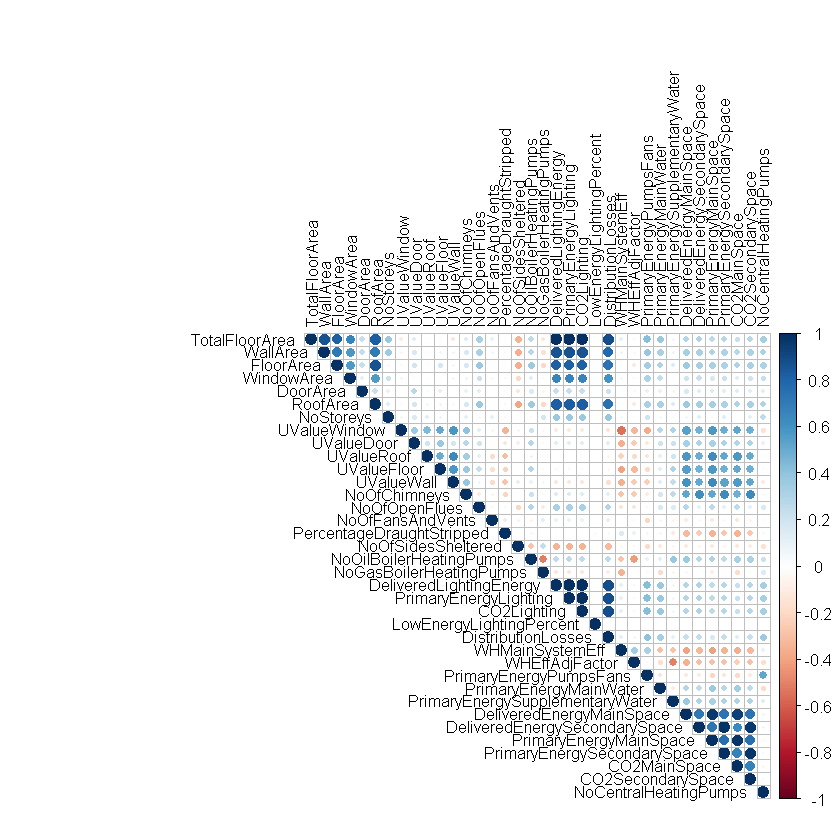

In [54]:
corMat <- cor(numeric_Test)
corrplot(corMat, type="upper", number.cex = 0.5, number.digits=1, tl.cex	= 0.8, tl.col = "black")

<font color = red> -TotalFloorArea correlate strongly with WallArea and FloorArea <br>
-TotalFloorArea correlate very strongly with DeliveredLightingEnergy, PrimaryEnergyLighting, DistributionLosses and CO2Lighting <br>
-WallArea and FloorArea correlate strongly with DeliveredLightingEnergy, PrimaryEnergyLighting and CO2Lighting <br>
-DeliveredLightingEnergy correlate strongly with CO2Lighting and DistributionLosses <br>
-PrimaryLightingEnergy correlate strongly with CO2Lighting and DistributionLosses <br>
-CO2Lighting correlates strongly with DistributionLosses <br>
-DeliveredEnergyMainSpace correlates strongly with PrimaryEnergyMainSpace and CO2MainSpace <br>
-DeliveredEnergySecondarySpace correlates strongly with PrimaryEnergySecondarySpace and CO2SecondarySpace <br>
-PrimaryEnergyMainSpace correlates strongly with CO2MainSpace <br>
-PrimaryEnergyySecondarySpace correlates strongly with CO2SEcondarySpace <br>
</font>

**<font color = green> h. Check if any of these can be removed  based on relationship to BER by comparing boxplots. If not sure, keep them**</font>

In [55]:
# TotalFloorArea is significantly different for the upper ratings so keep it
b1 <- ggplot(
  data = retrofitBER,
  aes(y = TotalFloorArea, x = BERCategory, color = BERCategory)) +
  theme(legend.position="none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------
# this almost has the same distribution as TotalFloorArea so remove it 
b2<-  ggplot(
  data = retrofitBER,
  aes(y = FloorArea, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------
# different distribution to TotalFloorArea so keep it
b3 <-  ggplot(
  data = retrofitBER,
  aes(y = WallArea, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------
# WindowArea  is significantly different for the upper ratings so keep it
b4 <-  ggplot(
  data = retrofitBER,
  aes(y = WindowArea, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# very little difference across categories of BER so remove it
b5 <-  ggplot(
  data = retrofitBER,
  aes(y = DoorArea, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------  
# hugely different so keep it
b7<-  ggplot(
  data = retrofitBER,
  aes(y = PercentageDraughtStripped, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# PrimaryEnergyLighting is significantly different for the upper ratings so keep it
b8 <-  ggplot(
  data = retrofitBER,
  aes(y = PrimaryEnergyLighting, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# hugely different so keep it
b9 <-  ggplot(
  data = retrofitBER,
  aes(y = DistributionLosses, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# almost the exact same as PrimaryEnergyLighting so possibly remove it 
b10 <-  ggplot(
  data = retrofitBER,
  aes(y = DeliveredLightingEnergy, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# almost the exact same as PrimaryEnergyLighting so possibly remove one of them
b11 <-  ggplot(
  data = retrofitBER,
  aes(y = CO2Lighting, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# hugely different so keep it
b12 <-  ggplot(
  data = retrofitBER,
  aes(y = DeliveredEnergyMainSpace, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# almost the exact same as DeliveredEnergyMainSpace so possibly remove one of them
b13<-  ggplot(
  data = retrofitBER,
  aes(y = PrimaryEnergyMainSpace, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

#------------------------------------------------ 
# similar but slightly different at the higher ratins so keep it
b14<-  ggplot(
  data = retrofitBER,
  aes(y = CO2MainSpace, x = BERCategory, color = BERCategory)) +
  theme(legend.position = "none") +
  theme(axis.title.x=element_blank(),
        axis.text.x  = element_text(angle=90, vjust=0.5, size=14)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(angle=90, vjust=0.5, size=16)) +
  geom_boxplot()

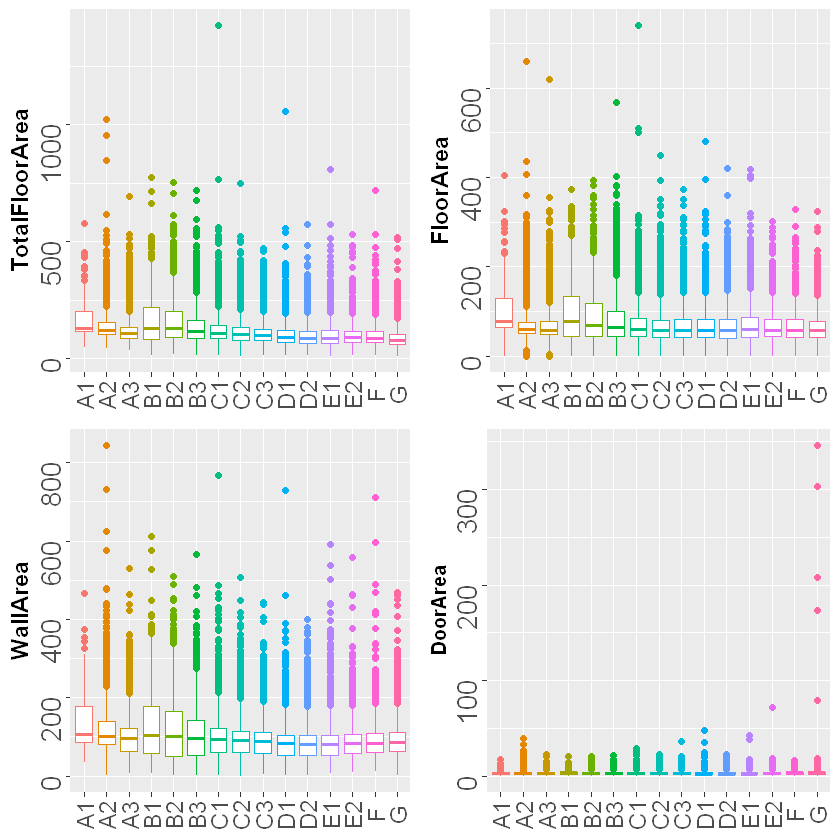

In [56]:
# plot them all
grid.arrange(b1, b2, b3, b5, ncol=2, nrow =2)

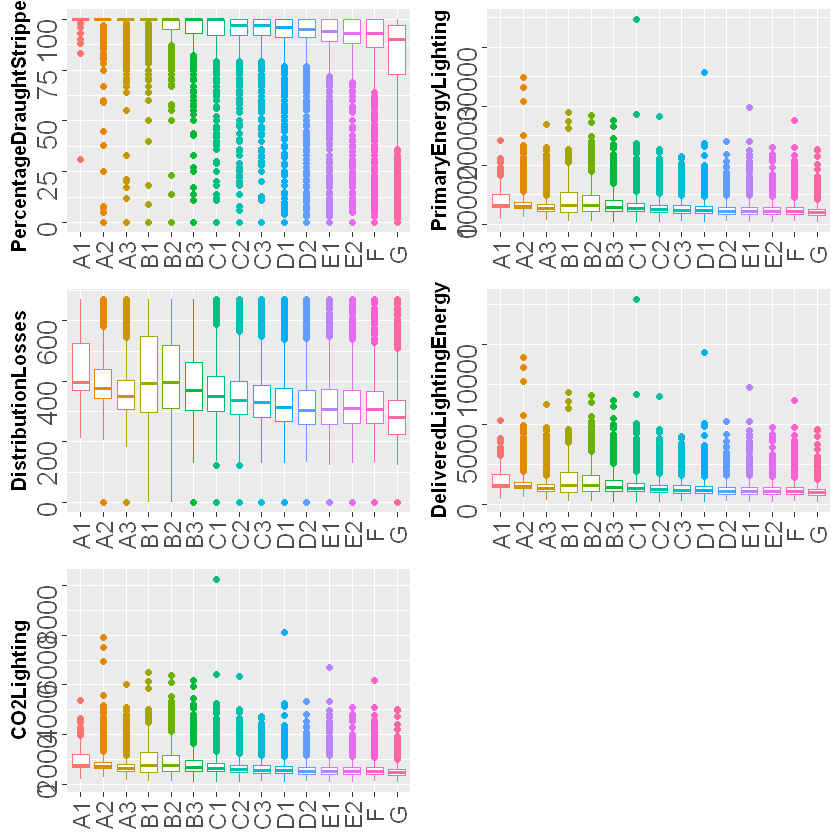

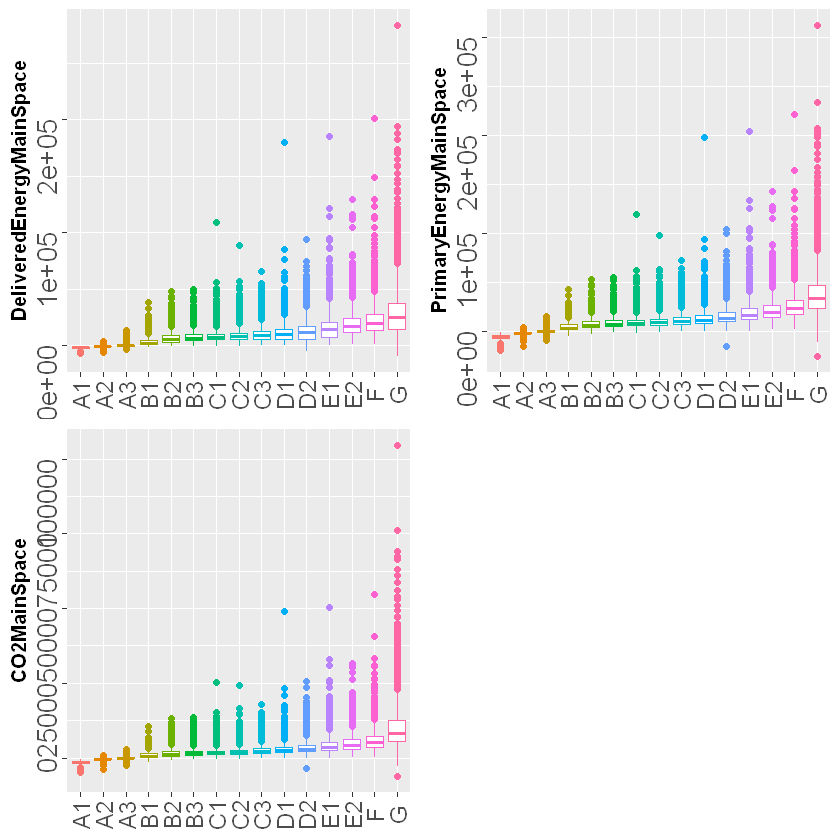

In [57]:

grid.arrange(b7, b8,b9,b10,b11, ncol=2, nrow =3)
grid.arrange(b12, b13,b14, ncol=2, nrow =2)

**<font color = green> i. Handle the outliers - first find them from the above plots**</font>

In [58]:
# first energy lighting
out <- boxplot.stats(retrofitBER$PrimaryEnergyLighting)$out
out_ind <- which(retrofitBER$PrimaryEnergyLighting %in% c(out))
sort(out_ind, decreasing = TRUE)
# order
temp <- retrofitBER[out_ind, ]
temp[order(temp$PrimaryEnergyLighting, decreasing = TRUE), ]

# floor area
out <- boxplot.stats(retrofitBER$TotalFloorArea)$out
out_ind <- which(retrofitBER$TotalFloorArea %in% c(out))
sort(out_ind, decreasing = TRUE)
# order - these are not that different
temp <- retrofitBER[out_ind, ]
temp[order(temp$TotalFloorArea, decreasing = TRUE), ]

#  window area
out <- boxplot.stats(retrofitBER$WindowArea)$out
out_ind <- which(retrofitBER$WindowArea %in% c(out))
sort(out_ind, decreasing = TRUE)
# order - one specific outlier to remove
temp <- retrofitBER[out_ind, ]
temp[order(temp$WindowArea, decreasing = TRUE), ]

#  Energy main space
out <- boxplot.stats(retrofitBER$DeliveredEnergyMainSpace)$out
out_ind <- which(retrofitBER$DeliveredEnergyMainSpace %in% c(out))
sort(out_ind, decreasing = TRUE)
# order - one specific outlier to remove
temp <- retrofitBER[out_ind, ]
temp[order(temp$DeliveredEnergyMainSpace, decreasing = TRUE), ]

# remove outlier observations -  primary energy and window area 
retrofitBER <- retrofitBER[-c(33742, 15503, 27325, 6382, 63991, 9320, 33273, 41022, 24325), ]

# Re-run the above plots to check 

[1] 73891 73890 73868 73840 73800 73785 73784 73777 73773 73735 73719 73691
  [13] 73683 73680 73678 73654 73648 73611 73609 73604 73603 73601 73584 73577
  [25] 73562 73559 73555 73536 73528 73519 73514 73491 73459 73458 73452 73446
  [37] 73445 73416 73415 73373 73359 73337 73330 73325 73322 73320 73312 73298
  [49] 73292 73259 73242 73218 73207 73202 73201 73191 73186 73179 73172 73171
  [61] 73149 73139 73136 73130 73104 73101 73094 73075 73064 73062 73060 73014
  [73] 73011 73005 72998 72997 72964 72936 72919 72908 72903 72897 72890 72889
  [85] 72879 72874 72857 72808 72799 72781 72766 72748 72741 72721 72714 72711
  [97] 72704 72692 72690 72667 72657 72638 72607 72578 72575 72521 72486 72482
 [109] 72480 72471 72449 72446 72438 72436 72411 72396 72395 72386 72374 72372
 [121] 72363 72357 72353 72349 72348 72334 72321 72307 72281 72280 72264 72263
 [133] 72255 72252 72236 72228 72223 72208 72157 72146 72144 72141 72137 72111
 [145] 72102 72090 72076 72075 72064 72062 72059 72050 72042 72013 72011 72001
 [157] 71996 71976 71963 71961 71955 71945 71941 71933 71917 71906 71905 71878
 [169] 71868 71846 71827 71823 71820 71813 71809 71786 71785 71776 71765 71762
 [181] 71753 71750 71746 71729 71722 71710 71704 71682 71667 71640 71639 71635
 [193] 71618 71617 71616 71601 71600 71596 71589 71571 71570 71561 71545 71532
 [205] 71525 71524 71510 71467 71446 71436 71421 71415 71403 71402 71395 71386
 [217] 71358 71344 71341 71316 71312 71298 71296 71293 71283 71264 71261 71224
 [229] 71213 71163 71154 71146 71118 71104 71100 71066 71063 71062 71057 71054
 [241] 71043 71023 71014 71012 70987 70972 70971 70915 70908 70899 70896 70895
 [253] 70862 70833 70827 70814 70811 70796 70786 70773 70751 70748 70731 70724
 [265] 70721 70717 70692 70681 70673 70669 70657 70654 70645 70634 70612 70594
 [277] 70592 70591 70589 70535 70512 70511 70480 70458 70453 70448 70441 70415
 [289] 70391 70372 70351 70345 70307 70294 70287 70279 70263 70251 70238 70237
 [301] 70235 70234 70220 70207 70204 70199 70184 70172 70161 70135 70110 70106
 [313] 70100 70084 70083 70080 70077 70067 70064 70063 70061 70022 70019 70015
 [325] 69998 69983 69977 69963 69959 69933 69922 69918 69908 69905 69893 69891
 [337] 69879 69878 69870 69867 69864 69851 69848 69818 69794 69789 69784 69783
 [349] 69781 69771 69734 69719 69715 69694 69681 69672 69665 69661 69653 69645
 [361] 69606 69604 69581 69555 69499 69487 69484 69483 69458 69455 69451 69435
 [373] 69418 69414 69411 69402 69400 69395 69388 69382 69349 69344 69339 69336
 [385] 69332 69298 69297 69293 69290 69288 69283 69279 69273 69252 69242 69232
 [397] 69187 69174 69160 69158 69135 69128 69116 69113 69108 69102 69087 69081
 [409] 69073 69070 69066 68982 68971 68969 68966 68951 68949 68947 68939 68928
 [421] 68926 68913 68911 68869 68855 68848 68806 68801 68782 68776 68775 68772
 [433] 68750 68746 68735 68732 68727 68723 68702 68686 68677 68671 68656 68637
 [445] 68598 68572 68564 68540 68490 68486 68475 68466 68453 68448 68431 68429
 [457] 68423 68420 68415 68414 68404 68403 68401 68371 68365 68353 68291 68289
 [469] 68283 68281 68280 68268 68267 68244 68219 68195 68188 68184 68164 68163
 [481] 68162 68141 68100 68095 68082 68080 68071 68048 68024 68014 68006 67985
 [493] 67959 67936 67925 67919 67911 67909 67886 67881 67862 67814 67774 67768
 [505] 67762 67755 67749 67732 67715 67710 67709 67674 67659 67658 67636 67632
 [517] 67628 67612 67611 67601 67598 67597 67595 67581 67573 67559 67554 67519
 [529] 67511 67510 67463 67430 67375 67374 67349 67343 67317 67296 67291 67285
 [541] 67270 67259 67243 67235 67223 67209 67190 67170 67140 67125 67122 67087
 [553] 67081 67079 67063 67056 67051 67048 67045 67040 67029 67025 67001 66990
 [565] 66988 66987 66986 66985 66981 66938 66931 66921 66904 66862 66832 66823
 [577] 66821 66814 66765 66764 66740 66714 66713 66710 66701 66698 66693 66691
 [589] 66680 66678 66651 66635 66628 66612 66603 66598 66593 66591 66586 66575
 [601] 66568 66517 66498 66488 66460 66457 66454 6644

,Type,YearBuilt,BERCategory,TotalFloorArea,WallArea,FloorArea,WindowArea,DoorArea,RoofArea,NoStoreys,...,PrimaryEnergyMainWater,PrimaryEnergySupplementaryWater,DeliveredEnergyMainSpace,DeliveredEnergySecondarySpace,PrimaryEnergyMainSpace,PrimaryEnergySecondarySpace,CO2MainSpace,CO2SecondarySpace,NoCentralHeatingPumps,OilBoilerThermo
,<fct>,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
33742,Detached house,"(2009,2011]",C1,1423.780,767.67,739.74,190.42,7.80,702.27,3,...,7796.747,0.000,108578.693,50066.842,119436.562,55073.526,25190.257,11615.507,6,NO
15503,Detached house,"(1750,1800]",D1,1056.660,729.15,316.75,148.55,9.14,420.41,4,...,7353.077,0.000,179959.280,30326.471,197955.208,36391.765,48948.924,11887.977,1,YES
27325,Detached house,"(2015,2017]",A2,1021.250,730.91,660.52,292.85,19.93,519.82,3,...,10113.881,0.000,713.112,520.407,1925.402,572.448,458.531,105.643,2,NO
6382,Detached house,"(2007,2009]",A2,952.650,478.70,406.53,119.35,6.55,352.32,3,...,9978.703,0.000,953.885,656.112,2575.490,721.723,613.348,133.191,3,NO
63991,Detached house,"(2015,2017]",A2,849.481,577.13,436.10,152.13,8.54,462.28,3,...,5824.972,0.000,-1505.090,-1340.431,-4063.743,-1474.474,-967.773,-33.511,1,NO
9320,Detached house,"(1890,1900]",E1,809.080,536.89,404.54,97.71,7.10,386.54,2,...,9077.015,0.000,185334.870,23760.881,203868.357,26136.969,50411.085,8767.765,1,NO
35047,Detached house,"(1750,1800]",B1,774.310,611.50,258.18,88.12,11.53,259.48,3,...,8560.814,0.000,38332.134,6104.747,42165.347,6715.222,10426.340,2252.652,1,YES
12954,Detached house,"(1997,1999]",C1,765.120,466.02,255.74,97.22,10.63,342.49,3,...,10542.705,0.000,55854.614,23272.756,61440.075,25600.032,15192.455,5399.279,2,NO
8232,Detached house,"(1999,2001]",B2,754.500,509.30,251.50,105.20,14.80,251.50,3,...,8215.304,0.000,48183.655,7638.002,53002.021,8401.802,13105.954,190.950,1,YES


[1] 73891 73890 73868 73840 73800 73785 73784 73777 73773 73735 73719 73691
  [13] 73683 73680 73678 73654 73648 73611 73609 73604 73603 73601 73584 73577
  [25] 73562 73559 73555 73536 73528 73519 73514 73491 73459 73458 73452 73446
  [37] 73445 73416 73415 73373 73359 73337 73330 73325 73322 73320 73312 73298
  [49] 73292 73259 73242 73218 73207 73202 73201 73191 73186 73179 73172 73171
  [61] 73149 73139 73136 73130 73104 73101 73094 73075 73064 73062 73060 73014
  [73] 73011 73005 72998 72997 72964 72936 72919 72908 72903 72897 72890 72889
  [85] 72879 72874 72857 72808 72799 72781 72766 72748 72741 72721 72714 72711
  [97] 72704 72692 72690 72667 72657 72638 72607 72578 72575 72521 72486 72482
 [109] 72480 72471 72449 72446 72438 72436 72411 72396 72395 72386 72374 72372
 [121] 72363 72357 72353 72349 72348 72334 72321 72307 72281 72280 72264 72263
 [133] 72255 72252 72236 72228 72223 72208 72157 72146 72144 72141 72137 72111
 [145] 72102 72090 72076 72075 72064 72062 72059 72050 72042 72013 72011 72001
 [157] 71996 71976 71963 71961 71955 71945 71941 71933 71917 71906 71905 71878
 [169] 71868 71846 71827 71823 71820 71813 71809 71786 71785 71776 71765 71762
 [181] 71753 71750 71746 71729 71722 71710 71704 71682 71667 71640 71639 71635
 [193] 71618 71617 71616 71601 71600 71596 71589 71571 71570 71561 71545 71532
 [205] 71525 71524 71510 71467 71446 71436 71421 71415 71403 71402 71395 71386
 [217] 71358 71344 71341 71316 71312 71298 71296 71293 71283 71264 71261 71224
 [229] 71213 71163 71154 71146 71118 71104 71100 71066 71063 71062 71057 71054
 [241] 71043 71023 71014 71012 70987 70972 70971 70915 70908 70899 70896 70895
 [253] 70862 70833 70827 70814 70811 70796 70786 70773 70751 70748 70731 70724
 [265] 70721 70717 70692 70681 70673 70669 70657 70654 70645 70634 70612 70594
 [277] 70592 70591 70589 70535 70512 70511 70480 70458 70453 70448 70441 70415
 [289] 70391 70372 70351 70345 70307 70294 70287 70279 70263 70251 70238 70237
 [301] 70235 70234 70220 70207 70204 70199 70184 70172 70161 70135 70110 70106
 [313] 70100 70084 70083 70080 70077 70067 70064 70063 70061 70022 70019 70015
 [325] 69998 69983 69977 69963 69959 69933 69922 69918 69908 69905 69893 69891
 [337] 69879 69878 69870 69867 69864 69851 69848 69818 69794 69789 69784 69783
 [349] 69781 69771 69734 69719 69715 69694 69681 69672 69665 69661 69653 69645
 [361] 69606 69604 69581 69555 69499 69487 69484 69483 69458 69455 69451 69435
 [373] 69418 69414 69411 69402 69400 69395 69388 69382 69349 69344 69339 69336
 [385] 69332 69298 69297 69293 69290 69288 69283 69279 69273 69252 69242 69232
 [397] 69187 69174 69160 69158 69135 69128 69116 69113 69108 69102 69087 69081
 [409] 69073 69070 69066 68982 68971 68969 68966 68951 68949 68947 68939 68928
 [421] 68926 68913 68911 68869 68855 68848 68806 68801 68782 68776 68775 68772
 [433] 68750 68746 68735 68732 68727 68723 68702 68686 68677 68671 68656 68637
 [445] 68598 68572 68564 68540 68490 68486 68475 68466 68453 68448 68431 68429
 [457] 68423 68420 68415 68414 68404 68403 68401 68371 68365 68353 68291 68289
 [469] 68283 68281 68280 68268 68267 68244 68219 68195 68188 68184 68164 68163
 [481] 68162 68141 68100 68095 68082 68080 68071 68048 68024 68014 68006 67985
 [493] 67959 67936 67925 67919 67911 67909 67886 67881 67862 67814 67774 67768
 [505] 67762 67755 67749 67732 67715 67710 67709 67674 67659 67658 67636 67632
 [517] 67628 67612 67611 67601 67598 67597 67595 67581 67573 67559 67554 67519
 [529] 67511 67510 67463 67430 67375 67374 67349 67343 67317 67296 67291 67285
 [541] 67270 67259 67243 67235 67223 67209 67190 67170 67140 67125 67122 67087
 [553] 67081 67079 67063 67056 67051 67048 67045 67040 67029 67025 67001 66990
 [565] 66988 66987 66986 66985 66981 66938 66931 66921 66904 66862 66832 66823
 [577] 66821 66814 66765 66764 66740 66714 66713 66710 66701 66698 66693 66691
 [589] 66680 66678 66651 66635 66628 66612 66603 66598 66593 66591 66586 66575
 [601] 66568 66517 66498 66488 66460 66457 66454 6644

,Type,YearBuilt,BERCategory,TotalFloorArea,WallArea,FloorArea,WindowArea,DoorArea,RoofArea,NoStoreys,...,PrimaryEnergyMainWater,PrimaryEnergySupplementaryWater,DeliveredEnergyMainSpace,DeliveredEnergySecondarySpace,PrimaryEnergyMainSpace,PrimaryEnergySecondarySpace,CO2MainSpace,CO2SecondarySpace,NoCentralHeatingPumps,OilBoilerThermo
,<fct>,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
33742,Detached house,"(2009,2011]",C1,1423.780,767.67,739.74,190.42,7.80,702.27,3,...,7796.747,0.000,108578.693,50066.842,119436.562,55073.526,25190.257,11615.507,6,NO
15503,Detached house,"(1750,1800]",D1,1056.660,729.15,316.75,148.55,9.14,420.41,4,...,7353.077,0.000,179959.280,30326.471,197955.208,36391.765,48948.924,11887.977,1,YES
27325,Detached house,"(2015,2017]",A2,1021.250,730.91,660.52,292.85,19.93,519.82,3,...,10113.881,0.000,713.112,520.407,1925.402,572.448,458.531,105.643,2,NO
6382,Detached house,"(2007,2009]",A2,952.650,478.70,406.53,119.35,6.55,352.32,3,...,9978.703,0.000,953.885,656.112,2575.490,721.723,613.348,133.191,3,NO
63991,Detached house,"(2015,2017]",A2,849.481,577.13,436.10,152.13,8.54,462.28,3,...,5824.972,0.000,-1505.090,-1340.431,-4063.743,-1474.474,-967.773,-33.511,1,NO
9320,Detached house,"(1890,1900]",E1,809.080,536.89,404.54,97.71,7.10,386.54,2,...,9077.015,0.000,185334.870,23760.881,203868.357,26136.969,50411.085,8767.765,1,NO
35047,Detached house,"(1750,1800]",B1,774.310,611.50,258.18,88.12,11.53,259.48,3,...,8560.814,0.000,38332.134,6104.747,42165.347,6715.222,10426.340,2252.652,1,YES
12954,Detached house,"(1997,1999]",C1,765.120,466.02,255.74,97.22,10.63,342.49,3,...,10542.705,0.000,55854.614,23272.756,61440.075,25600.032,15192.455,5399.279,2,NO
8232,Detached house,"(1999,2001]",B2,754.500,509.30,251.50,105.20,14.80,251.50,3,...,8215.304,0.000,48183.655,7638.002,53002.021,8401.802,13105.954,190.950,1,YES


[1] 73918 73891 73890 73874 73796 73787 73785 73775 73761 73742 73735 73710
  [13] 73683 73682 73669 73662 73638 73628 73627 73609 73603 73601 73591 73584
  [25] 73555 73536 73528 73526 73508 73453 73452 73446 73445 73415 73392 73373
  [37] 73367 73336 73325 73324 73320 73319 73318 73312 73308 73298 73292 73247
  [49] 73243 73238 73236 73201 73191 73186 73183 73179 73171 73149 73138 73136
  [61] 73123 73115 73102 73101 73094 73054 73048 73020 73011 73009 73005 72994
  [73] 72983 72968 72948 72936 72908 72907 72890 72889 72874 72849 72844 72824
  [85] 72808 72802 72781 72766 72719 72704 72698 72690 72689 72684 72669 72654
  [97] 72638 72634 72627 72610 72607 72575 72545 72543 72533 72521 72486 72475
 [109] 72438 72436 72432 72411 72406 72404 72393 72386 72378 72374 72357 72349
 [121] 72348 72315 72281 72264 72263 72255 72252 72228 72223 72195 72187 72150
 [133] 72144 72134 72111 72102 72090 72076 72070 72059 72052 72050 72042 72037
 [145] 72023 72013 72001 71999 71996 71961 71955 71934 71933 71906 71896 71880
 [157] 71878 71868 71855 71846 71827 71813 71809 71795 71792 71788 71785 71776
 [169] 71773 71770 71762 71729 71707 71704 71687 71682 71667 71666 71650 71647
 [181] 71646 71640 71635 71618 71612 71601 71600 71596 71589 71580 71561 71532
 [193] 71515 71504 71502 71501 71499 71472 71467 71466 71463 71446 71436 71421
 [205] 71403 71402 71386 71358 71355 71341 71339 71337 71328 71316 71314 71311
 [217] 71298 71296 71295 71293 71234 71224 71163 71154 71153 71146 71118 71080
 [229] 71079 71066 71063 71062 71057 71052 71043 71023 71014 71012 70987 70971
 [241] 70963 70930 70915 70897 70896 70895 70850 70847 70844 70833 70827 70786
 [253] 70773 70751 70731 70721 70692 70687 70673 70654 70634 70612 70594 70589
 [265] 70562 70556 70535 70526 70513 70512 70510 70480 70458 70442 70441 70422
 [277] 70411 70391 70361 70351 70347 70307 70294 70279 70269 70255 70241 70238
 [289] 70234 70199 70175 70148 70140 70135 70114 70110 70108 70106 70100 70083
 [301] 70080 70077 70076 70071 70066 70046 70022 70015 69998 69983 69963 69951
 [313] 69933 69918 69909 69905 69893 69892 69891 69870 69867 69864 69843 69839
 [325] 69818 69794 69789 69781 69719 69712 69681 69677 69661 69653 69646 69645
 [337] 69638 69606 69604 69595 69594 69591 69581 69556 69552 69491 69484 69476
 [349] 69455 69445 69414 69411 69400 69395 69388 69382 69365 69339 69293 69290
 [361] 69288 69283 69279 69273 69262 69252 69232 69226 69160 69153 69128 69119
 [373] 69113 69110 69106 69096 69087 69073 69067 69051 69039 69038 69020 69004
 [385] 68982 68961 68959 68951 68949 68939 68928 68926 68911 68888 68869 68855
 [397] 68847 68806 68801 68782 68767 68756 68746 68735 68723 68702 68686 68677
 [409] 68672 68671 68668 68656 68647 68646 68637 68636 68598 68590 68587 68540
 [421] 68511 68490 68474 68467 68466 68464 68463 68453 68448 68423 68415 68409
 [433] 68403 68401 68365 68352 68332 68323 68291 68289 68281 68268 68267 68253
 [445] 68244 68222 68206 68185 68174 68164 68163 68161 68149 68148 68141 68138
 [457] 68071 68024 68014 68006 67972 67925 67919 67911 67894 67889 67881 67861
 [469] 67853 67814 67790 67787 67774 67762 67759 67755 67737 67734 67726 67674
 [481] 67636 67611 67601 67595 67590 67582 67568 67559 67526 67520 67519 67464
 [493] 67463 67376 67350 67349 67344 67332 67317 67310 67292 67273 67270 67235
 [505] 67223 67209 67208 67190 67147 67134 67130 67122 67100 67087 67081 67079
 [517] 67078 67063 67058 67056 67048 67045 67041 67040 67037 67034 67025 67023
 [529] 67001 66988 66987 66986 66982 66981 66958 66946 66938 66931 66923 66904
 [541] 66894 66862 66850 66844 66832 66824 66823 66802 66765 66764 66760 66749
 [553] 66740 66720 66714 66711 66710 66701 66698 66694 66691 66680 66678 66672
 [565] 66651 66640 66628 66615 66598 66593 66591 66588 66586 66575 66551 66535
 [577] 66516 66492 66488 66460 66457 66441 66439 66434 66415 66408 66394 66390
 [589] 66387 66376 66285 66268 66250 66242 66239 66164 66159 66137 66130 66100
 [601] 66097 66093 66091 66088 66084 66083 66042 6603

,Type,YearBuilt,BERCategory,TotalFloorArea,WallArea,FloorArea,WindowArea,DoorArea,RoofArea,NoStoreys,...,PrimaryEnergyMainWater,PrimaryEnergySupplementaryWater,DeliveredEnergyMainSpace,DeliveredEnergySecondarySpace,PrimaryEnergyMainSpace,PrimaryEnergySecondarySpace,CO2MainSpace,CO2SecondarySpace,NoCentralHeatingPumps,OilBoilerThermo
,<fct>,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
33273,Detached house,"(2017,2019]",A2,373.00,346.00,211.00,1129.00,1.85,211.00,2,...,22498.714,0,-5956.006,-2068.058,-16081.216,-2274.864,-3829.712,-51.701,1,NO
39404,Detached house,"(1910,1920]",G,91.20,132.96,45.60,884.28,1.85,51.19,2,...,5662.435,0,50646.406,42205.338,136745.296,46425.872,32565.639,15573.770,0,NO
5825,Semi-detached house,"(1940,1950]",B3,239.34,125.34,124.83,628.61,1.85,114.60,3,...,7619.208,0,7054.404,0.000,19046.891,0.000,4535.982,0.000,0,NO
15173,Semi-detached house,"(1970,1980]",G,69.44,69.15,34.72,505.71,3.48,34.72,2,...,5843.075,0,23113.386,6908.334,25424.725,7599.167,6286.841,2549.175,1,NO
2768,Detached house,"(2011,2013]",B2,462.99,376.67,209.27,484.30,6.84,218.11,3,...,7069.065,0,26298.693,4534.090,28928.562,4987.499,7153.244,1673.079,1,YES
49816,Detached house,"(2007,2009]",C1,263.50,78.00,186.00,443.40,1.85,185.00,2,...,6190.054,0,22648.588,3829.289,24913.447,4595.147,4597.663,1501.081,1,NO
25030,Detached house,"(2011,2013]",B3,301.79,257.55,150.99,405.53,6.30,150.99,2,...,7236.261,0,19974.429,3266.189,21971.872,3592.808,5433.045,1205.224,1,NO
48884,Detached house,"(2001,2003]",C3,224.10,214.67,119.30,390.86,3.65,125.10,2,...,3918.847,0,31287.227,4491.676,34415.950,4940.844,8510.126,1042.069,1,NO
6986,Detached house,"(1990,1995]",B2,315.69,203.97,111.72,366.92,1.85,111.72,2,...,7260.540,0,20030.458,0.000,22033.504,0.000,4066.183,0.000,1,NO


[1] 73891 73883 73857 73855 73853 73840 73823 73803 73800 73787 73777 73766
  [13] 73764 73762 73753 73723 73722 73710 73691 73680 73666 73664 73621 73616
  [25] 73607 73591 73585 73584 73546 73498 73491 73439 73430 73405 73401 73397
  [37] 73392 73391 73385 73384 73373 73362 73345 73343 73316 73312 73308 73298
  [49] 73289 73261 73255 73230 73219 73218 73204 73189 73183 73177 73174 73172
  [61] 73160 73157 73110 73109 73098 73081 73075 73064 73057 73050 73020 73015
  [73] 73006 73005 73002 73001 73000 72970 72957 72951 72941 72940 72913 72908
  [85] 72904 72874 72861 72857 72854 72846 72844 72843 72822 72808 72806 72783
  [97] 72782 72781 72779 72761 72748 72744 72742 72735 72728 72722 72714 72711
 [109] 72703 72695 72694 72692 72679 72670 72667 72655 72611 72607 72584 72575
 [121] 72572 72564 72557 72532 72523 72520 72517 72484 72480 72474 72471 72460
 [133] 72443 72438 72435 72432 72428 72424 72411 72391 72386 72374 72370 72368
 [145] 72363 72361 72357 72355 72353 72349 72348 72314 72304 72301 72298 72283
 [157] 72281 72262 72228 72223 72186 72185 72179 72129 72111 72078 72050 72028
 [169] 72023 72001 71982 71973 71962 71950 71941 71939 71900 71895 71890 71868
 [181] 71860 71818 71809 71807 71788 71755 71750 71749 71744 71740 71729 71708
 [193] 71667 71666 71651 71607 71569 71559 71551 71548 71545 71466 71441 71435
 [205] 71408 71406 71403 71402 71362 71320 71319 71312 71272 71257 71253 71251
 [217] 71234 71213 71194 71165 71163 71153 71125 71100 71063 71014 71007 70960
 [229] 70914 70907 70901 70883 70875 70871 70851 70845 70816 70773 70745 70742
 [241] 70683 70658 70655 70631 70618 70609 70592 70519 70518 70513 70506 70482
 [253] 70390 70379 70335 70234 70233 70229 70224 70217 70077 70068 70065 70028
 [265] 70016 70015 70005 69969 69963 69934 69911 69888 69859 69838 69805 69800
 [277] 69786 69783 69782 69726 69715 69708 69681 69667 69665 69604 69584 69537
 [289] 69514 69487 69484 69447 69442 69400 69389 69382 69332 69314 69304 69253
 [301] 69247 69232 69191 69160 69153 69130 69128 69124 69087 69085 69071 69004
 [313] 68998 68978 68966 68926 68923 68911 68890 68889 68880 68807 68802 68801
 [325] 68771 68748 68723 68686 68677 68656 68644 68624 68623 68613 68609 68587
 [337] 68578 68572 68565 68564 68540 68537 68518 68500 68496 68491 68488 68464
 [349] 68461 68447 68445 68434 68423 68377 68370 68348 68339 68338 68336 68330
 [361] 68323 68244 68238 68220 68206 68188 68131 68124 68095 68071 68017 68015
 [373] 68001 67988 67974 67972 67963 67931 67927 67914 67898 67889 67834 67824
 [385] 67818 67812 67752 67713 67697 67681 67668 67650 67648 67611 67575 67559
 [397] 67552 67546 67496 67484 67463 67458 67449 67422 67399 67392 67386 67383
 [409] 67334 67324 67317 67291 67279 67259 67223 67192 67147 67119 67102 67097
 [421] 67094 67078 67077 67064 67048 67041 67025 67023 67002 67001 66983 66981
 [433] 66980 66979 66968 66942 66867 66844 66825 66823 66821 66805 66801 66797
 [445] 66773 66762 66757 66719 66710 66701 66612 66606 66575 66573 66565 66556
 [457] 66548 66541 66534 66519 66431 66410 66355 66340 66338 66309 66306 66301
 [469] 66283 66250 66188 66177 66130 66103 66091 66078 66072 66052 66045 66036
 [481] 65996 65964 65947 65943 65942 65935 65926 65911 65823 65811 65745 65744
 [493] 65729 65664 65659 65651 65629 65613 65577 65570 65562 65545 65539 65523
 [505] 65517 65474 65458 65421 65414 65409 65408 65376 65361 65360 65344 65336
 [517] 65314 65304 65300 65285 65270 65269 65268 65255 65236 65191 65187 65185
 [529] 65180 65146 65143 65127 65042 65023 64982 64957 64938 64927 64857 64854
 [541] 64847 64846 64833 64821 64817 64808 64806 64792 64784 64782 64763 64750
 [553] 64729 64723 64711 64688 64676 64654 64646 64629 64597 64584 64571 64547
 [565] 64546 64543 64539 64538 64531 64492 64481 64479 64472 64469 64458 64452
 [577] 64383 64366 64338 64327 64257 64222 64218 64197 64178 64160 64143 64126
 [589] 64125 64064 64050 64006 64003 63996 63994 63949 63872 63482 63474 63423
 [601] 63408 63398 63345 63295 63275 63168 63138 6311

,Type,YearBuilt,BERCategory,TotalFloorArea,WallArea,FloorArea,WindowArea,DoorArea,RoofArea,NoStoreys,...,PrimaryEnergyMainWater,PrimaryEnergySupplementaryWater,DeliveredEnergyMainSpace,DeliveredEnergySecondarySpace,PrimaryEnergyMainSpace,PrimaryEnergySecondarySpace,CO2MainSpace,CO2SecondarySpace,NoCentralHeatingPumps,OilBoilerThermo
,<fct>,<ord>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
41022,Detached house,"(1800,1850]",G,473.650,460.30,171.44,38.49,8.83,171.44,3,...,5743.581,4520.043,283258.6,9441.955,311584.5,25493.279,104522.44,6071.177,3,NO
24325,Detached house,"(1800,1850]",F,719.230,712.11,328.75,71.98,12.31,328.87,3,...,10244.060,0.000,200902.0,49481.420,220992.2,54429.562,54645.35,18258.644,1,NO
39298,Detached house,"(1890,1900]",G,222.130,200.82,135.97,42.44,8.17,139.45,2,...,12614.954,0.000,193990.4,6466.346,232788.4,17459.134,76044.23,4157.860,0,NO
371,Detached house,"(1910,1920]",G,191.080,215.88,104.19,14.29,3.46,119.78,2,...,10780.761,0.000,187573.5,0.000,206330.9,0.000,69214.64,0.000,0,NO
9320,Detached house,"(1890,1900]",E1,809.080,536.89,404.54,97.71,7.10,386.54,2,...,9077.015,0.000,185334.9,23760.881,203868.4,26136.969,50411.08,8767.765,1,NO
52329,Terraced House,"(1920,1930]",G,216.680,239.10,144.30,23.53,8.45,144.46,2,...,9774.400,0.000,182723.6,6090.788,200996.0,16445.128,67425.02,3916.377,0,NO
15503,Detached house,"(1750,1800]",D1,1056.660,729.15,316.75,148.55,9.14,420.41,4,...,7353.077,0.000,179959.3,30326.471,197955.2,36391.765,48948.92,11887.977,1,YES
18410,Detached house,"(1970,1980]",G,519.790,436.74,322.87,47.04,1.85,325.15,2,...,6794.722,3985.443,173742.4,39767.703,191116.6,43744.473,47257.93,14674.282,1,NO
50319,Detached house,"(1920,1930]",G,191.370,222.28,107.26,25.48,7.00,110.57,2,...,11242.095,0.000,171100.1,9505.563,188210.2,10456.119,63135.95,3507.553,0,NO


**<font color = green> j. Based on this analysis remove these variables based on correlation and matching distributions**</font>

In [59]:
retrofitBER <- retrofitBER %>%
  select(
    -FloorArea, -DoorArea, -CO2Lighting, -DeliveredLightingEnergy)

**<font color = green> h. Write out the final full file for checking - 74K rows, 45 variables and to the DB as a central store**</font>

In [60]:
  str(retrofitBER)
  write.csv(retrofitBER, "finalretrofitBER.csv", row.names = FALSE)
  dbWriteTable(conn = con_datamart, name = 'retrofit_cleaned_datamart', value = retrofitBER, row.names=FALSE, overwrite=TRUE, sep =',')

'data.frame':	73917 obs. of  44 variables:
 $ Type                           : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 6 5 5 3 5 6 4 1 3 5 ...
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ TotalFloorArea                 : num  49.9 101.8 117.9 144.4 149.1 ...
 $ WallArea                       : num  46.4 115.2 111.8 133 142.4 ...
 $ WindowArea                     : num  8.53 23.63 18.55 19.88 28.36 ...
 $ RoofArea                       : num  27.6 61.5 73.5 80.7 65 ...
 $ NoStoreys                      : int  2 2 2 2 3 3 1 1 2 1 ...
 $ UValueWindow                   : num  1.59 2.9 2.56 3.1 3.1 2.72 2.8 2.2 2.8 2.28 ...
 $ UValueDoor                     : num  0 3 3 3 3 3 1.71 2.61 2.95 0 ...
 $ UValueRoof                     : num  0.25 0.37 0.3 0.36 0.36 0.31 0.4 0 0.26 0.35 ...
 $ UValueFloor            

[1] TRUE

***
**<font color = blue> 10. Start model preperation**</font>

**<font color = green> a. Create two retrofit datafiles for analysis - Insulator Data Frame (29 variables) and Heating Data Frame (40 variables)**</font>

In [61]:
insulatorBER <- retrofitBER %>%
  select(Type,YearBuilt,BERCategory,TotalFloorArea,WallArea,WindowArea,NoStoreys,UValueWindow,UValueDoor,UValueRoof,
         UValueFloor,UValueWall,HeatType,WaterHeatType,NoOfChimneys,NoOfOpenFlues,NoOfFansAndVents,SealedPorch,StructureType,
         SuspendedWoodenFloor,VentilationMethod,PercentageDraughtStripped,NoOfSidesSheltered,NoOilBoilerHeatingPumps,ThermoControledBoiler, 
         NoGasBoilerHeatingPumps,PrimaryEnergyLighting,LowEnergyLightingPercent   
  )
str(insulatorBER)
  
heatingBER <- retrofitBER %>%
  select(Type,YearBuilt,BERCategory,TotalFloorArea,WallArea,WindowArea,NoStoreys,HeatType,WaterHeatType,NoOfChimneys,NoOfOpenFlues,NoOfFansAndVents,
         SealedPorch,StructureType, SuspendedWoodenFloor,VentilationMethod,PercentageDraughtStripped,NoOfSidesSheltered,NoOilBoilerHeatingPumps,ThermoControledBoiler, 
         NoGasBoilerHeatingPumps,PrimaryEnergyLighting,LowEnergyLightingPercent,DistributionLosses,WHMainSystemEff,WHEffAdjFactor,
         ThermalMassCategory,PrimaryEnergyPumpsFans,PrimaryEnergyMainWater,PrimaryEnergySupplementaryWater,DeliveredEnergyMainSpace,DeliveredEnergySecondarySpace,
         PrimaryEnergyMainSpace,PrimaryEnergySecondarySpace,CO2MainSpace,CO2SecondarySpace,NoCentralHeatingPumps,OilBoilerThermo
  )
str(heatingBER)

'data.frame':	73917 obs. of  28 variables:
 $ Type                     : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 6 5 5 3 5 6 4 1 3 5 ...
 $ YearBuilt                : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ BERCategory              : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ TotalFloorArea           : num  49.9 101.8 117.9 144.4 149.1 ...
 $ WallArea                 : num  46.4 115.2 111.8 133 142.4 ...
 $ WindowArea               : num  8.53 23.63 18.55 19.88 28.36 ...
 $ NoStoreys                : int  2 2 2 2 3 3 1 1 2 1 ...
 $ UValueWindow             : num  1.59 2.9 2.56 3.1 3.1 2.72 2.8 2.2 2.8 2.28 ...
 $ UValueDoor               : num  0 3 3 3 3 3 1.71 2.61 2.95 0 ...
 $ UValueRoof               : num  0.25 0.37 0.3 0.36 0.36 0.31 0.4 0 0.26 0.35 ...
 $ UValueFloor              : num  0.31 0.64 0.38 0.44 0.44 0.36 0.41 0 0.64 0.52 ...
 $ UValueWall               : num  0.27 0.6 0.46 0.55 0.54 0.54 0.55

**<font color = green> b. Write both datasets to the database**</font>

In [62]:
dbWriteTable(conn = con_datamart, name = 'insulator_cleaned_datamart', value = insulatorBER, row.names=FALSE, overwrite=TRUE, sep =',')
dbWriteTable(conn = con_datamart, name = 'heating_cleaned_datamart', value = heatingBER, row.names=FALSE, overwrite=TRUE, sep =',')

[1] TRUE

[1] TRUE

**<font color = green> c. Split the data into training and validation sets -  74K observations with 70%/30% random split between training (52K) and validation (22K)**</font>

In [63]:
# use retrofit as is the file from which the other two were built so it contains the same number of rows 
dt = sort(sample(nrow(retrofitBER), nrow(retrofitBER)*.7))

# insulator - 51,741 training/22,176 Validation; 27 variables
BERTrainInsul<-insulatorBER[dt,]
BERValInsul <-insulatorBER[-dt,]
dim(BERTrainInsul)
dim(BERValInsul)

# heating - 51,741 training/22,176 Validation; 38 variables
BERTrainHeat<-heatingBER[dt,]
BERValHeat <-heatingBER[-dt,]
dim(BERTrainHeat)
dim(BERValHeat)

[1] 51741    28

[1] 22176    28

[1] 51741    38

[1] 22176    38

***
**<font color = red> Start the modeling**</font>

***
**<font color = blue> 11. Random Forest - Insulator Data  (The AUC and ROC cruves will be generated for the best performing model based on best precision/recall balance i.e. Macro F1-score)**</font>

**<font color = green> a. Start with default and unbalanced data**</font>

In [64]:
rf_Insul_default <- randomForest(BERCategory ~., data = BERTrainInsul)

**<font color = green> b. Prediction and confusion matrix**</font>

In [65]:
pred_insul_rf <- predict(rf_Insul_default, BERValInsul[,-3])
CM_RF_I_Def <- confusionMatrix(pred_insul_rf, BERValInsul$BERCategory, mode = "prec_recall")
CM_RF_I_Def

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   27    0    0    0    0    0    0    0    0    0    0    0    0
        A2   17 2372  182    1    2    0    0    0    0    0    0    0    0
        A3    9  166 1612   95   25   13    7    5    1    1    1    0    0
        B1    3    1   30  153   39   11    0    1    3    0    1    0    0
        B2    0    1   13  101  459  175   35   10    4    1    0    0    0
        B3    0    1   11   69  397 1114  576  175   39   13    3    0    0
        C1    0    0    2   14  105  670 1234  668  221   47   10    0    1
        C2    0    0    0    4   15  136  542  874  492  195   45    9    1
        C3    0    0    3    3    4   42  161  446  733  436  154   43   13
        D1    0    0    1    1    3   15   47  161  417  677  429   86   36
        D2    0    0    0    1    0    1   10   55  149  385  704  376  172
        E1    0    0    0    0    0

**<font color = green> Calculate average metrics across all classes**</font>

In [66]:
print(paste("Macro Recall:", mean(CM_RF_I_Def$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_I_Def$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_RF_I_Def$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_RF_I_Def$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.471938290124619"
[1] "Macro Precision: 0.528598104707104"
[1] "Macro F1 Score: 0.487759343636511"
[1] "Macro Specificity: 0.964604259842613"


**<font color = red> 52% accuracy ; 53% precision and 47% recall with an F1-score of 49%**</font>

**<font color = green> c. Random Forest Plots - OOB error versus the number of trees - error is constant after about 150 trees**</font>

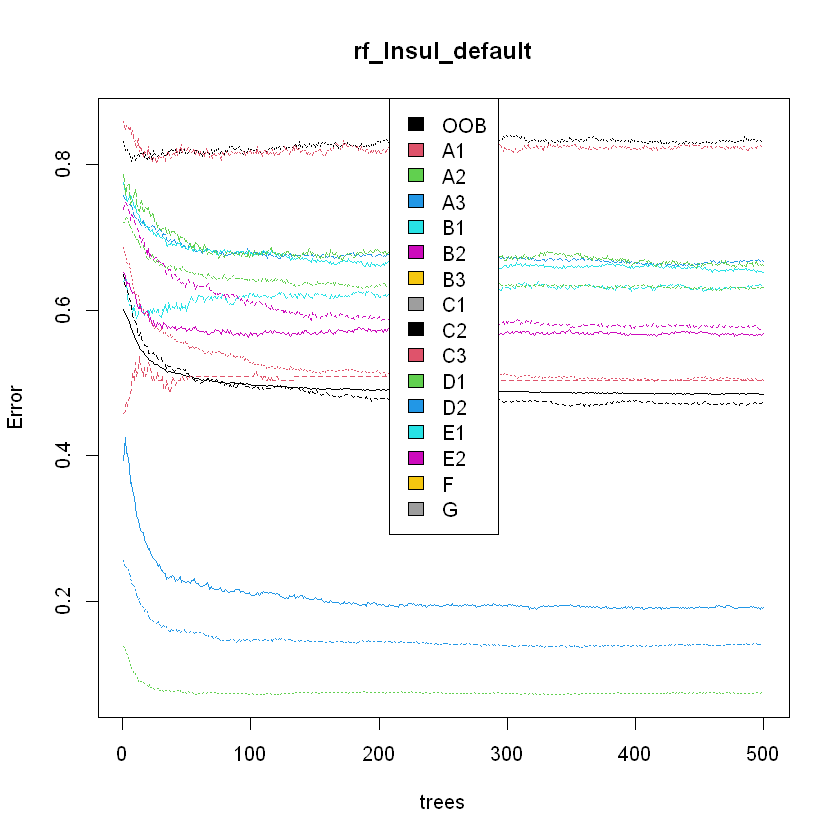

In [67]:
plot(rf_Insul_default)
legend("top", colnames(rf_Insul_default$err.rate), fill=1:ncol(rf_Insul_default$err.rate))

**<font color = green> d. Random Forest Plots - Importance**</font>

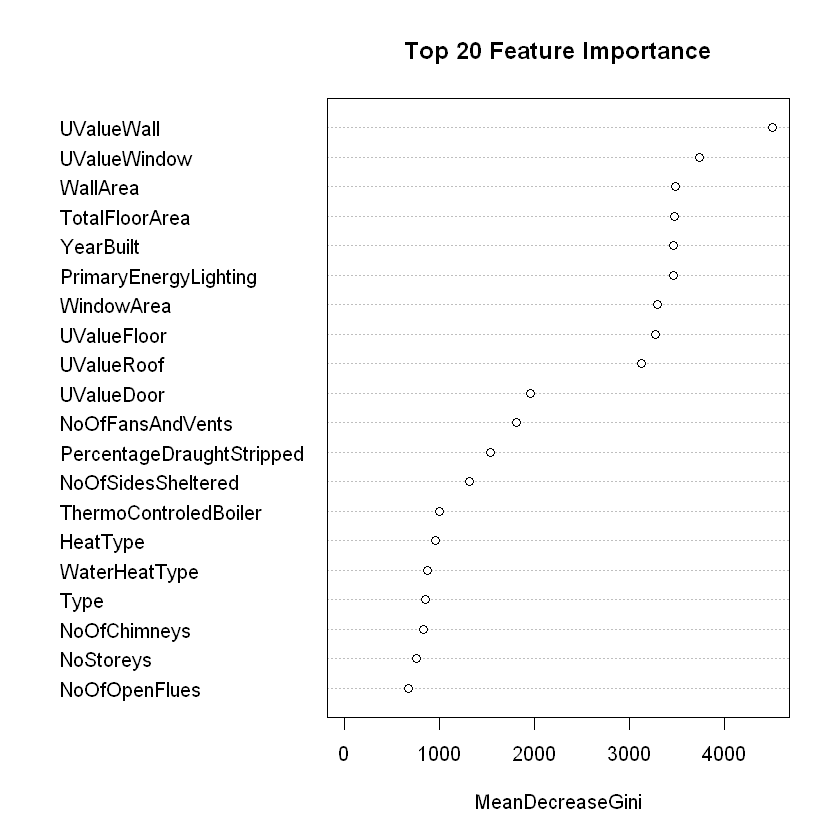

In [68]:
varImpPlot(rf_Insul_default, sort=T, n.var = 20, main = 'Top 20 Feature Importance')

**<font color = green> e. Remove those features that are not contributing (less than 1000 MeanDecreaseGini)to make a more robust and performant model and rerun to test the model - Reduced from 28 to 15 features**</font>

In [69]:
insulatorBER_Fix <- insulatorBER %>%
  select(UValueWall,UValueWindow,BERCategory,YearBuilt,TotalFloorArea,WallArea,PrimaryEnergyLighting,UValueFloor,WindowArea, UValueRoof,
         UValueDoor, NoOfFansAndVents,PercentageDraughtStripped, NoOfSidesSheltered, ThermoControledBoiler, HeatType
  )
str(insulatorBER_Fix)

# create training and validation data from the reduced dataset
dt = sort(sample(nrow(insulatorBER_Fix), nrow(insulatorBER_Fix)*.7))
BERTrainInsul_Fix<-insulatorBER_Fix[dt,]
BERValInsul_Fix <-insulatorBER_Fix[-dt,]
dim(BERTrainInsul_Fix)
dim(BERValInsul_Fix)

'data.frame':	73917 obs. of  16 variables:
 $ UValueWall               : num  0.27 0.6 0.46 0.55 0.54 0.54 0.55 0.46 0.52 0.98 ...
 $ UValueWindow             : num  1.59 2.9 2.56 3.1 3.1 2.72 2.8 2.2 2.8 2.28 ...
 $ BERCategory              : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ YearBuilt                : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ TotalFloorArea           : num  49.9 101.8 117.9 144.4 149.1 ...
 $ WallArea                 : num  46.4 115.2 111.8 133 142.4 ...
 $ PrimaryEnergyLighting    : num  1216 2480 2872 3518 3634 ...
 $ UValueFloor              : num  0.31 0.64 0.38 0.44 0.44 0.36 0.41 0 0.64 0.52 ...
 $ WindowArea               : num  8.53 23.63 18.55 19.88 28.36 ...
 $ UValueRoof               : num  0.25 0.37 0.3 0.36 0.36 0.31 0.4 0 0.26 0.35 ...
 $ UValueDoor               : num  0 3 3 3 3 3 1.71 2.61 2.95 0 ...
 $ NoOfFansAndVents         : int  5 4 2 4 2 3 7 5 0 7 ...
 $ PercentageDraughtStrip

[1] 51741    16

[1] 22176    16

In [70]:
# re-run with the reduced features
rf_Insul_default_Fix <- randomForest(BERCategory ~., data = BERTrainInsul_Fix)
# predict using the random forest model and examine the confusion matrix
pred_insulfix_rf <- predict(rf_Insul_default_Fix, BERValInsul_Fix[,-3])
CM_RF_I_Import <- confusionMatrix(pred_insulfix_rf, BERValInsul_Fix$BERCategory,  mode = "prec_recall")
# examine
CM_RF_I_Import

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   27    0    0    0    0    0    0    0    0    0    0    0    0
        A2   23 2292  229    3    1    0    0    0    0    0    0    0    0
        A3   14  159 1659  102   30   13    8    5    0    1    1    0    0
        B1    2    1   33  157   52   13    3    1    4    0    0    0    0
        B2    0    2   10   97  442  176   36   11    3    1    0    0    0
        B3    0    0    8   58  409 1072  567  212   63   15    1    0    0
        C1    0    0    2   12  112  616 1232  628  260   81   24    3    1
        C2    0    0    7    5   25  180  563  838  509  220   52   17    1
        C3    0    0    1    1   14   66  178  434  672  418  171   49   10
        D1    0    0    1    1    2   22   56  177  378  649  371  105   46
        D2    0    0    0    1    0    8   19   70  182  445  656  345  195
        E1    0    0    0    0    0

In [71]:
print(paste("Macro Recall:", mean(CM_RF_I_Import$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_I_Import$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_RF_I_Import$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_RF_I_Import$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.454107277052401"
[1] "Macro Precision: 0.514098660177632"
[1] "Macro F1 Score: 0.469829559808395"
[1] "Macro Specificity: 0.963385421986047"


**<font color = red> Accuracy only slightly reduced to 50%. Precision 51% and Recall 45% and an F1-score of 47%, for a much more stable model**</font>

**<font color = green> f. Test with balanced training data. Need to take a sample due to performance reasons (20% - 18K observations). Verify against the original Validation data set**</font>

In [72]:
x <- as.data.frame(BERTrainInsul_Fix %>% select(-BERCategory))
y <- as.factor(BERTrainInsul_Fix$BERCategory)
# oversample because there are so few observations for the A1 class
BERTrainInsulFix_BalUp <- upSample(x, y, yname = "BERCategory")

# sample it for computational reasons
dt = sort(sample(nrow(BERTrainInsulFix_BalUp), nrow(BERTrainInsulFix_BalUp)*.2))
sampleInsul_TrainBalFix <- BERTrainInsulFix_BalUp[dt,]
dim(sampleInsul_TrainBalFix)
table(sampleInsul_TrainBalFix$BERCategory)

# re-run with the new parameters and balanced
rf_Insul_default_Fix_Bal <- randomForest(BERCategory ~., data = sampleInsul_TrainBalFix)

[1] 18480    16


  A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2    F    G 
1183 1233 1242 1218 1198 1260 1221 1178 1253 1212 1241 1234 1298 1275 1234 

In [73]:
# predict using the random forest model and examine the confusion matrix
pred_insulfix_bal_rf <- predict(rf_Insul_default_Fix_Bal, BERValInsul_Fix[,-3])
CM_RF_I_Bal <- confusionMatrix(pred_insulfix_bal_rf, BERValInsul_Fix$BERCategory, mode = "prec_recall")
#examine
CM_RF_I_Bal

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   32   28    6    0    1    0    0    0    0    0    0    0    0
        A2   19 2120  283    4    0    0    0    0    0    0    0    0    0
        A3   10  284 1440   29   12    3    2    3    2    2    0    0    0
        B1    5   21  198  268  169   66   23   12   13   13    6    1    0
        B2    0    1   13   83  493  413  154   47   15    4    4    0    0
        B3    0    0    5   40  279  880  650  272   95   24    4    0    0
        C1    0    0    1    7   83  493  937  582  239   78   20    4    3
        C2    0    0    1    3   24  173  489  599  325  157   33   10    0
        C3    0    0    2    2   16   87  255  454  618  395  172   39   12
        D1    0    0    1    1    7   37  102  273  454  515  305   87   22
        D2    0    0    0    0    1    7   36  104  213  440  449  183   93
        E1    0    0    0    0    0

In [74]:
print(paste("Macro Recall:", mean(CM_RF_I_Bal$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_I_Bal$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_RF_I_Bal$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_RF_I_Bal$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.44484692396571"
[1] "Macro Precision: 0.424494929670337"
[1] "Macro F1 Score: 0.430452578110319"
[1] "Macro Specificity: 0.959708410765473"


**<font color = red> Oversampling minority class. Accuracy 45% with a Precision of 42% and a Recall of 44% and F1-score of 43%. It doesnt improve the model**</font>

***
**<font color = blue> 11. Random Forest - Heating Data (The AUC and ROC cruves will be generated for the best performing model based on best precision/recall balance i.e. Macro F1-score)**</font>

**<font color = green> a. Start with default**</font>

In [75]:
rf_Heat_default <- randomForest(BERCategory ~., data = BERTrainHeat)

**<font color = green> b. Prediction and confusion matrix</font>**

In [76]:
pred_heat_rf <- predict(rf_Heat_default, BERValHeat[,-3])
CM_RF_H_Def <- confusionMatrix(pred_heat_rf, BERValHeat$BERCategory, mode = "prec_recall")
CM_RF_H_Def

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   50    3    0    0    0    0    0    0    0    0    0    0    0
        A2    5 2495   67    0    0    0    0    0    0    0    0    0    0
        A3    1   43 1765   53    0    1    0    0    0    0    0    0    0
        B1    0    0   22  306   46    2    0    0    0    0    0    0    0
        B2    0    0    0   79  789   87    7    4    0    0    0    0    0
        B3    0    0    0    3  209 1810  181    5    2    1    0    0    0
        C1    0    0    0    0    5  272 2165  277   13    1    0    0    0
        C2    0    0    0    0    0    3  251 1863  276   20    0    1    0
        C3    0    0    0    1    0    2    9  242 1572  257   17    1    0
        D1    0    0    0    0    0    0    1   12  208 1371  220    8    2
        D2    0    0    0    0    0    0    1    0    7  174 1269  249   19
        E1    0    0    0    0    0

In [77]:
print(paste("Macro Recall:", mean(CM_RF_H_Def$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_H_Def$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_RF_H_Def$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_RF_H_Def$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.789618646061521"
[1] "Macro Precision: 0.807581289569879"
[1] "Macro F1 Score: 0.797073005139024"
[1] "Macro Specificity: 0.986401998526616"


**<font color = red> 81% accuracy ; 81% precision and 79% recall, with an F1-score of 80%**</font>

**<font color = green> c. Random Forest Plots - OOB error versus the number of trees - error is constant after about 200 trees**</font>

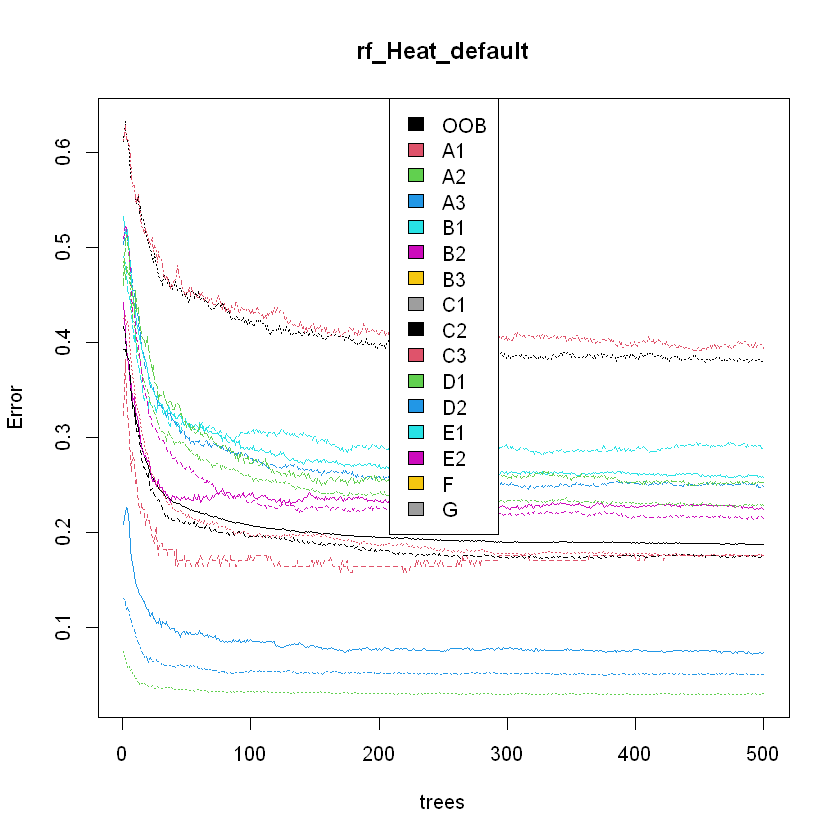

In [78]:
plot(rf_Heat_default)
legend("top", colnames(rf_Heat_default$err.rate), fill=1:ncol(rf_Heat_default$err.rate))

**<font color = green> d. Random Forest Plots - Importance**</font>

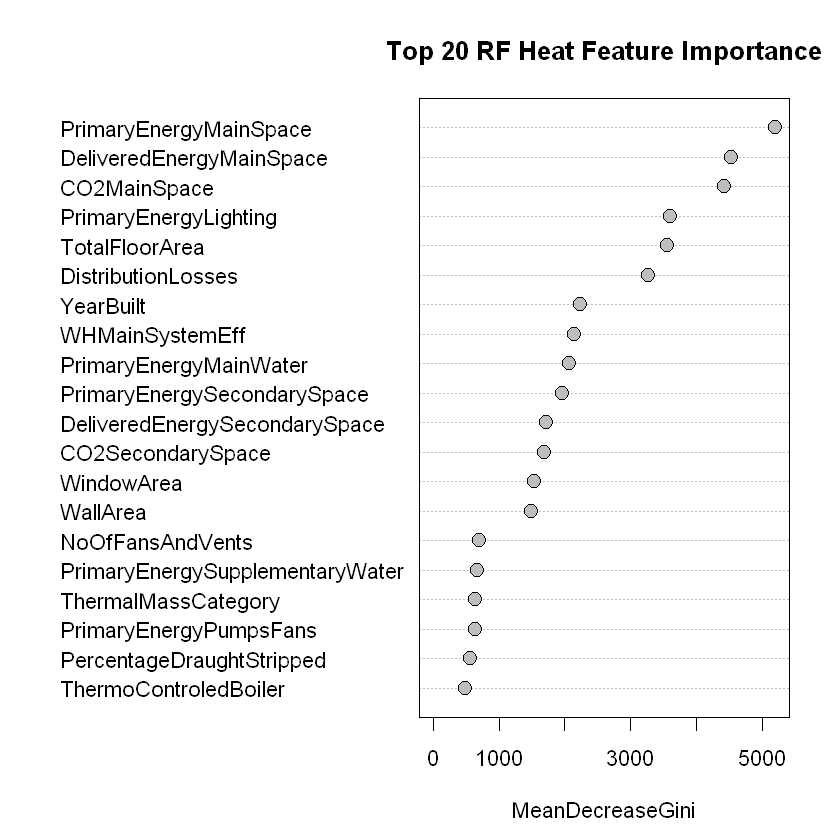

In [79]:
varImpPlot(rf_Heat_default, sort=T, n.var = 20, main = 'Top 20 RF Heat Feature Importance', pch = 21, cex=1.1, pt.cex = 1.5, bg = "gray")

**<font color = green> e. Remove those features that are not contributing to make a more robust and performant model and rerun to test the model. Reduced from 38 to 14 features for a more stable and perfomant model**</font>

In [80]:
heatingBER_Fix <-  heatingBER %>%
  select(PrimaryEnergyMainSpace,DeliveredEnergyMainSpace,BERCategory,CO2MainSpace,TotalFloorArea,PrimaryEnergyLighting,
         DistributionLosses, WHMainSystemEff, YearBuilt, PrimaryEnergyMainWater, PrimaryEnergySecondarySpace, DeliveredEnergySecondarySpace, CO2SecondarySpace,
         WindowArea, WallArea
  )
str(heatingBER_Fix)

# create new training and validation data from this dataset
dt = sort(sample(nrow(heatingBER_Fix), nrow(heatingBER_Fix)*.7))
BERTrainHeat_Fix<-heatingBER_Fix[dt,]
BERValHeat_Fix <-heatingBER_Fix[-dt,]
dim(BERTrainHeat_Fix)
dim(BERValHeat_Fix)

'data.frame':	73917 obs. of  15 variables:
 $ PrimaryEnergyMainSpace       : num  3791 14664 8785 12214 11187 ...
 $ DeliveredEnergyMainSpace     : num  3447 13331 7987 11104 10170 ...
 $ BERCategory                  : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ CO2MainSpace                 : num  700 2706 1621 2254 2065 ...
 $ TotalFloorArea               : num  49.9 101.8 117.9 144.4 149.1 ...
 $ PrimaryEnergyLighting        : num  1216 2480 2872 3518 3634 ...
 $ DistributionLosses           : num  219 338 371 423 432 ...
 $ WHMainSystemEff              : num  90.1 78.1 78.1 78.2 91.5 74 90.1 90.1 60 90.1 ...
 $ YearBuilt                    : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ PrimaryEnergyMainWater       : num  1875 4093 6174 5527 4795 ...
 $ PrimaryEnergySecondarySpace  : num  0 3022 1386 1179 5687 ...
 $ DeliveredEnergySecondarySpace: num  0 2748 1155 1072 5170 ...
 $ CO2SecondarySpace            : num  0 558 453 218

[1] 51741    15

[1] 22176    15

In [81]:
# re-run with the new parameters
rf_Heat_default_Fix <- randomForest(BERCategory ~., data = BERTrainHeat_Fix)
# predict using the random forest model and examine the confusion matrix 
pred_heatfix_rf <- predict(rf_Heat_default_Fix, BERValHeat_Fix[,-3])
CM_RF_H_Import <- confusionMatrix(pred_heatfix_rf, BERValHeat_Fix$BERCategory, mode = "prec_recall")
#examine
CM_RF_H_Import

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   57    2    0    0    0    0    0    0    0    0    0    0    0
        A2   11 2437   76    0    0    0    0    0    0    0    0    0    0
        A3    0   88 1835   60    1    0    1    0    0    0    0    0    0
        B1    0    0   30  324   40    0    0    0    0    0    0    0    0
        B2    0    0    1   86  814  114    7    1    0    0    0    0    0
        B3    0    0    0    1  179 1734  266   15    4    0    0    1    0
        C1    0    0    0    0    2  273 1999  339   23    2    1    0    0
        C2    0    0    0    0    0    1  342 1777  348   15    2    1    0
        C3    0    0    0    0    0    0   16  300 1503  269   10    1    0
        D1    0    0    0    0    0    1    0    8  245 1331  229   10    2
        D2    0    0    0    0    0    0    0    0    3  182 1205  204   13
        E1    0    0    0    0    0

In [82]:
print(paste("Macro Recall:", mean(CM_RF_H_Import$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_H_Import$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_RF_H_Import$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_RF_H_Import$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.783488954418986"
[1] "Macro Precision: 0.802002327361996"
[1] "Macro F1 Score: 0.791847941176635"
[1] "Macro Specificity: 0.985111151314147"


**<font color = red> Effective model with only minor drop in Accuracy to 80% with 80% precision and 78% recall and an F1-score of 79%**</font>

**<font color = green> f. Test with balanced training data. Need to take a sample due to performance reasons (20% - 18K observations). Verify against the original Validation data set**</font>

In [83]:
x <- as.data.frame(BERTrainHeat_Fix %>% select(-BERCategory))
y <- as.factor(BERTrainHeat_Fix$BERCategory)
# upsample
BERTrainHeatFix_BalUp <- upSample(x, y, yname = "BERCategory")
# random sample it for computational reasons
dt = sort(sample(nrow(BERTrainHeatFix_BalUp), nrow(BERTrainHeatFix_BalUp)*.2))
sampleHeat_TrainBalFix <- BERTrainHeatFix_BalUp[dt,]
dim(sampleHeat_TrainBalFix)
table(sampleHeat_TrainBalFix$BERCategory)

[1] 18579    15


  A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2    F    G 
1264 1219 1249 1256 1267 1257 1199 1168 1307 1234 1261 1235 1236 1192 1235 

In [84]:
rf_Heat_default_Fix_Bal <- randomForest(BERCategory ~., data = sampleHeat_TrainBalFix)

In [85]:
# predict using the random forest model and examine the confusion matrix
pred_heatfix_rf_bal <- predict(rf_Heat_default_Fix_Bal, BERValHeat_Fix[,-3])
CM_RF_H_Bal <- confusionMatrix(pred_heatfix_rf_bal, BERValHeat_Fix$BERCategory, mode = "prec_recall")
# examine
CM_RF_H_Bal

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   65   18    0    0    0    0    0    0    0    0    0    0    0
        A2    3 2323  135    0    0    0    0    0    0    0    0    0    0
        A3    0  186 1720   36    1    1    1    0    0    0    0    0    0
        B1    0    0   86  387   89    0    2    0    0    0    0    0    0
        B2    0    0    1   48  822  229   29    7    3    1    0    0    0
        B3    0    0    0    0  122 1580  393   30    7    1    0    0    0
        C1    0    0    0    0    0  294 1730  394   25    1    1    0    0
        C2    0    0    0    0    2   16  435 1502  317   18    1    0    0
        C3    0    0    0    0    0    2   40  470 1413  314   22    2    1
        D1    0    0    0    0    0    1    1   33  339 1191  230   14    0
        D2    0    0    0    0    0    0    0    4   17  268 1096  153   10
        E1    0    0    0    0    0

In [86]:
print(paste("Macro Recall:", mean(CM_RF_H_Bal$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_H_Bal$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_RF_H_Bal$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_RF_H_Bal$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.757583064451369"
[1] "Macro Precision: 0.733957733816033"
[1] "Macro F1 Score: 0.744417180042891"
[1] "Macro Specificity: 0.981050808565494"


**<font color = red> The balanced model is not an improvement with all metrics decreasing - F1-score drops to 74%**</font>

**<font color = green> f. Calculate AUC (Macro is of interest) and plot the Precision-Recall using : https://github.com/WandeRum/multiROC**</font>

In [87]:
# plot the ROC and PRecision-Recall - https://github.com/WandeRum/multiROC
options(warn=-1)
#
rf_pred <- predict(rf_Heat_default_Fix, BERValHeat_Fix, type = 'prob') 
#
rf_pred <- data.frame(rf_pred)
colnames(rf_pred) <- paste(colnames(rf_pred), "pred_RF", sep="_")

true_label <- dummies::dummy(BERValHeat_Fix$BERCategory, sep = ".")
true_label <- data.frame(true_label)
colnames(true_label) <- gsub(".*?\\.", "", colnames(true_label))
colnames(true_label) <- paste(colnames(true_label), "true", sep = "_")
final_df <- cbind(true_label, rf_pred)

roc_res <- multi_roc(final_df, force_diag=T)
pr_res <- multi_pr(final_df, force_diag=T)

plot_roc_df <- plot_roc_data(roc_res)
plot_pr_df <- plot_pr_data(pr_res)

plot_roc_df <- plot_roc_df[plot_roc_df$Group!="Macro" & plot_roc_df$Group!="Micro", ]
plot_pr_df <- plot_pr_df[plot_pr_df$Group!="Macro" & plot_pr_df$Group!="Micro", ]
options(warn=0)

In [88]:
# Precision - Recall AUC 
pr_res$AUC

$RF
$RF$A1
[1] 0.9677898

$RF$A2
[1] 0.9943631

$RF$A3
[1] 0.982954

$RF$B1
[1] 0.8463483

$RF$B2
[1] 0.8761466

$RF$B3
[1] 0.8842031

$RF$C1
[1] 0.8455446

$RF$C2
[1] 0.7975314

$RF$C3
[1] 0.7934298

$RF$D1
[1] 0.8116774

$RF$D2
[1] 0.8408399

$RF$E1
[1] 0.7239005

$RF$E2
[1] 0.7529443

$RF$F
[1] 0.8616686

$RF$G
[1] 0.9894571

$RF$macro
[1] 0.8642954

$RF$micro
[1] 0.889746

**<font color = red> The Macro AUC is an excellent 0.87**</font>

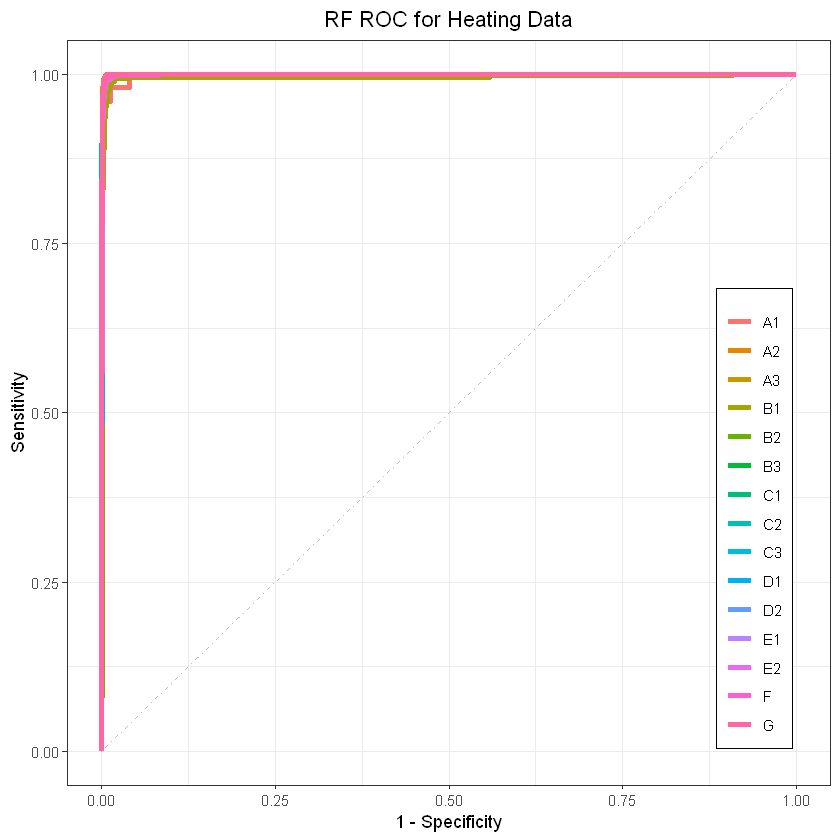

In [215]:
ggplot(plot_roc_df, aes(x = 1-Specificity, y=Sensitivity)) +
  geom_path(aes(color = Group), size=1.5) +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1), 
               colour='gray', linetype = 'dotdash') +
  ggtitle("RF ROC for Heating Data") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5), 
        legend.justification=c(1, 0), legend.position=c(.95, .05),
        legend.title=element_blank(), 
        legend.background = element_rect(fill=NULL, size=0.5, 
                                         linetype="solid", colour ="black"))

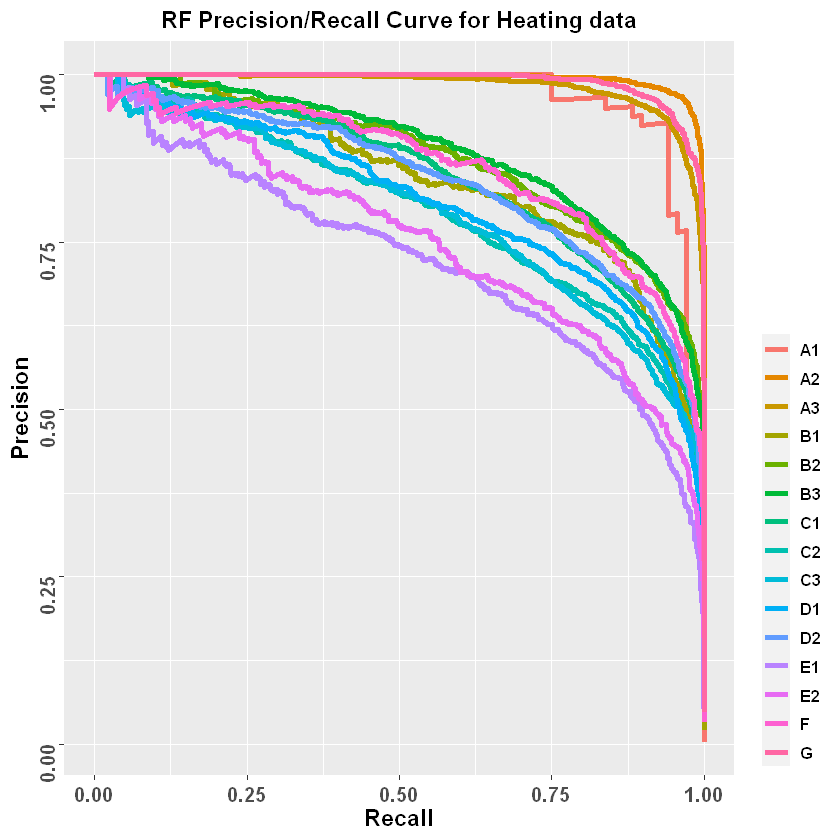

In [90]:
ggplot(plot_pr_df, aes(x=Recall, y=Precision)) + 
  geom_path(aes(color = Group), size=1.5) + 
  ggtitle("RF Precision/Recall Curve for Heating data") +
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

***
**<font color = blue> 12. Random Forest Tuning - Insulator Data (Note: Random Forest tuning code based on Enda Stafford tutorial)**</font>

**<font color = green> a. Define control parameters using k-fold cross validation with k = 10 and a random search to improve performance**</font>

In [91]:
trControl <- trainControl(method = "cv", number = 10, search = "random")

**<font color = green> b. Use a sample (20% - 10K rows) as the execution time with the full 47K observations is over 12 hours**</font>

In [121]:
BERTrain <- insulatorBER_Fix %>% sample_frac(0.2)

**<font color = green> c. Get best mtry (number of predictors sampled for splitting at each node. Max it can be is the number of variables) - start at 200 trees based on the OOB plot earlier**</font>

In [93]:
tuneGrid <- expand.grid(.mtry = c(1: 15))
rf_mtry <- caret::train(BERCategory~.,
                        data = BERTrain,
                        method = "rf",
                        metric = "Accuracy",
                        tuneGrid = tuneGrid,
                        trControl = trControl,
                        importance = TRUE,
                        ntree = 200,
                        na.action=na.exclude)
summary(rf_mtry)

                Length Class      Mode     
call                 6 -none-     call     
type                 1 -none-     character
predicted        14783 factor     numeric  
err.rate          3200 -none-     numeric  
confusion          240 -none-     numeric  
votes           221745 matrix     numeric  
oob.times        14783 -none-     numeric  
classes             15 -none-     character
importance         901 -none-     numeric  
importanceSD       848 -none-     numeric  
localImportance      0 -none-     NULL     
proximity            0 -none-     NULL     
ntree                1 -none-     numeric  
mtry                 1 -none-     numeric  
forest              14 -none-     list     
y                14783 factor     numeric  
test                 0 -none-     NULL     
inbag                0 -none-     NULL     
xNames              53 -none-     character
problemType          1 -none-     character
tuneValue            1 data.frame list     
obsLevels           15 -none-   

**<font color = red> Best value of mtry = 13**</font>

In [94]:
max(rf_mtry$results$Accuracy) # 0.45
best_mtry<- rf_mtry$bestTune$mtry
best_mtry

[1] 0.4498368

[1] 13

**<font color = green> c. Apply the best mtry to the tuning grid for following iterations**</font>

In [95]:
tunegrid <- expand.grid(.mtry=best_mtry)

**<font color = green> d. Search for best maxnodes (tree depth)**</font>

In [96]:
store_maxnode <- list()
tuneGrid <- expand.grid(.mtry = best_mtry)
for (maxnodes in c(5: 60)) {
  rf_maxnode <- caret::train(BERCategory ~.,
                             data = BERTrain,
                             method = "rf",
                             metric = "Accuracy",
                             tuneGrid = tuneGrid,
                             trControl = trControl,
                             importance = TRUE,
                             maxnodes = maxnodes,
                             ntree = 200,
                             na.action=na.exclude)
  current_iteration <- toString(maxnodes)
  store_maxnode[[current_iteration]] <- rf_maxnode
}
results_mtry <- resamples(store_maxnode)
summary(results_mtry)


Call:
summary.resamples(object = results_mtry)

Models: 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60 
Number of resamples: 10 

Accuracy 
        Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
5  0.2748143 0.2766207 0.2787548 0.2803903 0.2816567 0.2902571    0
6  0.2798103 0.2835895 0.2864393 0.2864107 0.2898918 0.2924016    0
7  0.2835922 0.2888287 0.2963476 0.2953423 0.2990528 0.3155044    0
8  0.2872629 0.2929639 0.2955694 0.2968931 0.3019124 0.3069642    0
9  0.3010825 0.3040602 0.3084205 0.3073119 0.3089926 0.3152909    0
10 0.3046716 0.3126794 0.3166614 0.3175280 0.3210419 0.3349120    0
11 0.3044655 0.3236340 0.3278078 0.3259834 0.3314174 0.3412322    0
12 0.3175355 0.3257235 0.3332200 0.3314623 0.3373351 0.3410014    0
13 0.3245436 0.3387972 0.3407696 0.3430327 0.3504144 0.3612991    0
14 0.325

**<font color = red> Best value of maxnodes = 47**</font>

**<font color = green> e. search for best ntrees (number of trees)**</font>

In [97]:
store_maxtrees <- list()
for (ntree in c(100, 200, 250, 300, 350, 400, 450, 500, 550, 600)) {
  rf_maxtrees <- caret::train(BERCategory ~.,
                              data = BERTrain,
                              method = "rf",
                              metric = "Accuracy",
                              tuneGrid = tuneGrid,
                              trControl = trControl,
                              importance = TRUE,
                              maxnodes = 47,
                              ntree = ntree,
                              na.action=na.exclude)
  key <- toString(ntree)
  store_maxtrees[[key]] <- rf_maxtrees
}
results_tree <- resamples(store_maxtrees)
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 100, 200, 250, 300, 350, 400, 450, 500, 550, 600 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.3527420 0.3754454 0.3811782 0.3790794 0.3829499 0.3975659    0
200 0.3691684 0.3749181 0.3818039 0.3803712 0.3865136 0.3883627    0
250 0.3577236 0.3741948 0.3840430 0.3814463 0.3927732 0.4001354    0
300 0.3662830 0.3722299 0.3789718 0.3805011 0.3867205 0.3998647    0
350 0.3679946 0.3748735 0.3816768 0.3789509 0.3832232 0.3881001    0
400 0.3631436 0.3750633 0.3823511 0.3833374 0.3940162 0.3983795    0
450 0.3732252 0.3756125 0.3810961 0.3813184 0.3849533 0.3951286    0
500 0.3678862 0.3730323 0.3780856 0.3804999 0.3796073 0.4066306    0
550 0.3705962 0.3753383 0.3832882 0.3808407 0.3849146 0.3903924    0
600 0.3624661 0.3756980 0.3803240 0.3811095 0.3830001 0.4063556    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.2854718 0.31117

**<font color = red> Best number of trees = 250**</font>

**<font color = green> f. Display best settings for model**</font>

In [112]:
# display best settings for model
best_mtry    #13
store_maxnode  #47
store_maxtrees  #250
summary(results_tree)

[1] 14

$`5`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9314, 9311, 9316, 9312, 9314, 9312, ... 
Resampling results:

  Accuracy   Kappa    
  0.3001568  0.2119682

Tuning parameter 'mtry' was held constant at a value of 14

$`6`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9312, 9313, 9313, 9315, 9313, 9312, ... 
Resampling results:

  Accuracy   Kappa    
  0.3045052  0.2168203

Tuning parameter 'mtry' was held constant at a value of 14

$`7`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cro

$`100`
Random Forest 

14783 samples
   15 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13304, 13307, 13302, 13301, 13305, 13307, ... 
Resampling results:

  Accuracy   Kappa    
  0.3790794  0.3147824

Tuning parameter 'mtry' was held constant at a value of 13

$`200`
Random Forest 

14783 samples
   15 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 13305, 13304, 13303, 13303, 13303, 13307, ... 
Resampling results:

  Accuracy   Kappa    
  0.3803712  0.3162216

Tuning parameter 'mtry' was held constant at a value of 13

$`250`
Random Forest 

14783 samples
   15 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processi


Call:
summary.resamples(object = results_tree)

Models: 100, 200, 250, 300, 350, 400, 450, 500, 550, 600 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.3527420 0.3754454 0.3811782 0.3790794 0.3829499 0.3975659    0
200 0.3691684 0.3749181 0.3818039 0.3803712 0.3865136 0.3883627    0
250 0.3577236 0.3741948 0.3840430 0.3814463 0.3927732 0.4001354    0
300 0.3662830 0.3722299 0.3789718 0.3805011 0.3867205 0.3998647    0
350 0.3679946 0.3748735 0.3816768 0.3789509 0.3832232 0.3881001    0
400 0.3631436 0.3750633 0.3823511 0.3833374 0.3940162 0.3983795    0
450 0.3732252 0.3756125 0.3810961 0.3813184 0.3849533 0.3951286    0
500 0.3678862 0.3730323 0.3780856 0.3804999 0.3796073 0.4066306    0
550 0.3705962 0.3753383 0.3832882 0.3808407 0.3849146 0.3903924    0
600 0.3624661 0.3756980 0.3803240 0.3811095 0.3830001 0.4063556    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.2854718 0.31117

**<font color = green> g. Create the final model with the best parameters and evaluate**</font>

In [122]:
fit_rf_I <- caret::train(BERCategory ~.,
                       BERTrain,
                       method = "rf",
                       metric = "Accuracy",
                       tuneGrid = tuneGrid,
                       trControl = trControl,
                       importance = TRUE,
                       ntree = 250,
                       na.action=na.exclude)

In [123]:
#evaluate final insulator model
prediction <- predict(fit_rf_I, BERValInsul_Fix[-3])
CM_RF_I_Tune <- confusionMatrix(prediction, BERValInsul_Fix$BERCategory, mode = "prec_recall")
CM_RF_I_Tune
# importance of features
varImp(fit_rf_I)

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   32    0    0    0    0    0    0    0    0    0    0    0    0
        A2   20 2273  319    4    1    1    0    0    0    0    0    0    0
        A3   11  171 1548   69   21    6    6    5    1    2    1    0    1
        B1    3    4   49  200   45   12    4    1    4    0    0    0    0
        B2    0    3   15   83  498  142   26   11    4    1    0    0    0
        B3    0    1   15   57  366 1261  508  177   69   22    7    1    2
        C1    0    0    1   18  116  499 1402  528  227   64   22    5    0
        C2    0    1    2    3   21  142  430 1063  365  221   57   16    3
        C3    0    1    0    1   14   76  189  365  922  350  149   47   12
        D1    0    0    1    1    4   22   65  168  312  850  288  115   54
        D2    0    0    0    1    1    4   32   61  162  306  747  223  144
        E1    0    0    0    0    0

rf variable importance

  variables are sorted by maximum importance across the classes
  only 20 most important variables shown (out of 53)

                             A1    A2    A3     B1     B2     B3    C1     C2
UValueRoof                26.45 42.38 37.11 47.037 44.637 41.553 40.51 36.505
UValueWall                49.54 56.38 31.26 57.326 52.479 44.249 50.41 59.611
ThermoControledBoilerYES  14.67 27.65 57.15 69.491 75.339 76.456 65.21 43.294
UValueDoor                44.21 75.41 36.42 29.197 23.780 15.854 20.43 17.421
HeatTypeElectricity       44.21 61.34 66.42 64.886 54.843 72.050 59.02 47.285
WallArea                  25.69 61.77 66.54 44.823 31.259 39.298 48.99 35.876
NoOfFansAndVents          32.16 43.47 65.43 18.318 16.988 12.651 18.68 14.569
TotalFloorArea            35.08 65.17 59.00 39.551 43.367 46.216 38.48 30.856
WindowArea                45.03 63.81 62.07 37.685 28.469 23.743 33.33 23.070
PrimaryEnergyLighting     34.94 62.60 53.38 36.122 46.050 42.612 40.45 27.097


In [124]:
print(paste("Macro Recall:", mean(CM_RF_I_Tune$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_I_Tune$byClass[, "Precision"], na.rm = TRUE)))
print(paste("Macro F1 Score:", mean(CM_RF_I_Tune$byClass[, "F1"], na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_RF_I_Tune$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.526780531827436"
[1] "Macro Precision: 0.583592882723575"
[1] "Macro F1 Score: 0.544962694686954"
[1] "Macro Specificity: 0.968085355281767"


**<font color = red> More robust model as tested with 10 fold cross validaiton and higher accuracy at 56%. Precision is 58% and Recall is 53%, with an F1-score of 54%. It is still a poor prediction model**</font>

**<font color = green> h. AUC and Precision-Recall plot - https://github.com/WandeRum/multiROC </font>**

In [125]:
# plot the ROC and Precision-Recall- https://github.com/WandeRum/multiROC
options(warn=-1)
#
rf_pred_RF_I <- predict(fit_rf_I, BERValInsul_Fix, type = 'prob')
#
rf_pred_RF_I <- data.frame(rf_pred_RF_I)
colnames(rf_pred_RF_I) <- paste(colnames(rf_pred_RF_I), "pred_RF", sep="_")

true_label <- dummies::dummy(BERValInsul_Fix$BERCategory, sep = ".")
true_label <- data.frame(true_label)
colnames(true_label) <- gsub(".*?\\.", "", colnames(true_label))
colnames(true_label) <- paste(colnames(true_label), "true", sep = "_")
final_df <- cbind(true_label, rf_pred_RF_I)

roc_res <- multi_roc(final_df, force_diag=T)
pr_res <- multi_pr(final_df, force_diag=T)

plot_roc_df <- plot_roc_data(roc_res)
plot_pr_df <- plot_pr_data(pr_res)

plot_roc_df <- plot_roc_df[plot_roc_df$Group!="Macro" & plot_roc_df$Group!="Micro", ]
plot_pr_df <- plot_pr_df[plot_pr_df$Group!="Macro" & plot_pr_df$Group!="Micro", ]
options(warn=0)

In [126]:
# Precision - Recall AUC 
pr_res$AUC

$RF
$RF$A1
[1] 0.6029702

$RF$A2
[1] 0.9595434

$RF$A3
[1] 0.9016482

$RF$B1
[1] 0.5758667

$RF$B2
[1] 0.620085

$RF$B3
[1] 0.6266437

$RF$C1
[1] 0.6038901

$RF$C2
[1] 0.5466287

$RF$C3
[1] 0.5247929

$RF$D1
[1] 0.5311152

$RF$D2
[1] 0.5436291

$RF$E1
[1] 0.4486818

$RF$E2
[1] 0.4323271

$RF$F
[1] 0.5026447

$RF$G
[1] 0.8753152

$RF$macro
[1] 0.6196371

$RF$micro
[1] 0.6735191

**<font color = red> The AUC is a poor 0.62 ...**</font>

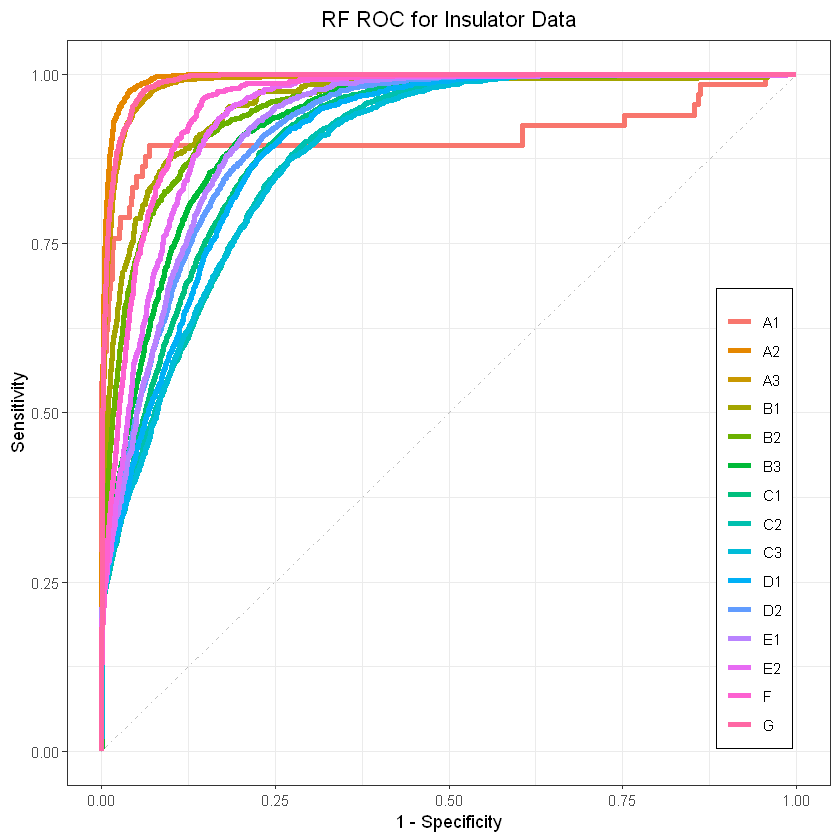

In [127]:
ggplot(plot_roc_df, aes(x = 1-Specificity, y=Sensitivity)) +
  geom_path(aes(color = Group), size=1.5) +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1), 
               colour='grey', linetype = 'dotdash') +
  ggtitle("RF ROC for Insulator Data") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5), 
        legend.justification=c(1, 0), legend.position=c(.95, .05),
        legend.title=element_blank(), 
        legend.background = element_rect(fill=NULL, size=0.5, 
                                         linetype="solid", colour ="black"))

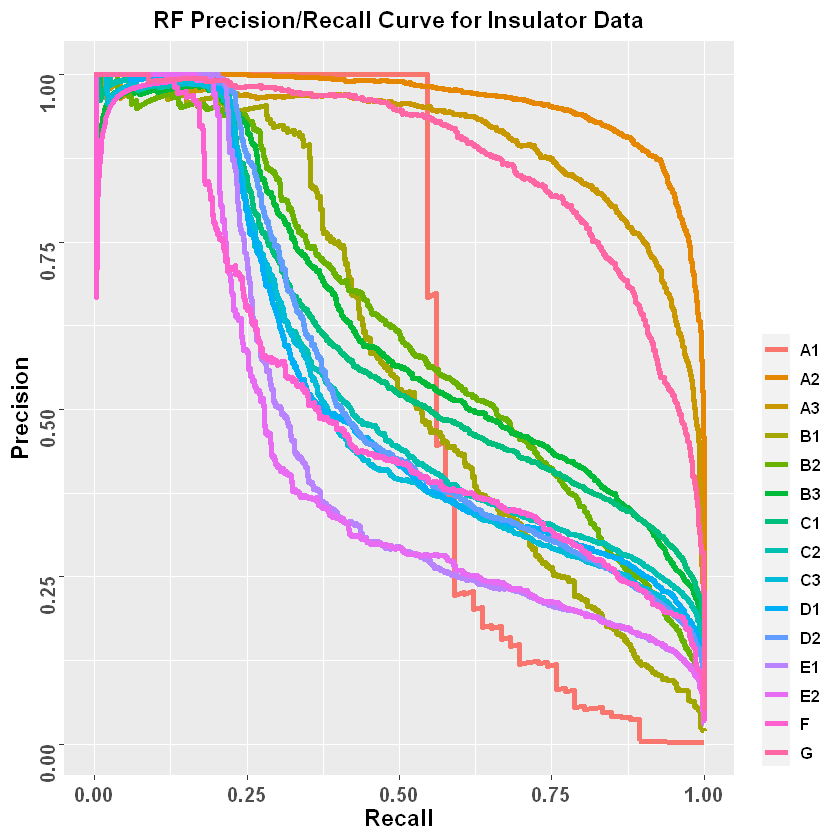

In [128]:
ggplot(plot_pr_df, aes(x=Recall, y=Precision)) + 
  geom_path(aes(color = Group), size=1.5) + 
  ggtitle("RF Precision/Recall Curve for Insulator Data") +
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

***
**<font color = blue> 13. Random Forest Tuning - Heating Data**</font>

**<font color = green> a. Define control parameters using k-fold cross validation with k = 10 and a random search to improve performance**</font>

In [106]:
trControl <- trainControl(method = "cv", number = 10, search = "random")

**<font color = green> b. Use a sample (20% - 10K rows) as the execution time with the full 47K observations is over 16 hours**</font>

In [107]:
BERTrain <- BERTrainHeat_Fix %>% sample_frac(0.2)
dim(BERTrain)

[1] 10348    15

**<font color = green> c. Get best mtry (max is can be is the number of variables) - start at 200 trees based on the OOB plot earlier**</font>

In [108]:
options(warn=-1)
tuneGrid <- expand.grid(.mtry = c(1: 14))
rf_mtry <- caret::train(BERCategory~.,
                        data = BERTrain,
                        method = "rf",
                        metric = "Accuracy",
                        tuneGrid = tuneGrid,
                        trControl = trControl,
                        importance = TRUE,
                        ntree = 200,
                        na.action=na.exclude)
summary(rf_mtry)
options(warn=0)

                Length Class      Mode     
call                 6 -none-     call     
type                 1 -none-     character
predicted        10348 factor     numeric  
err.rate          3200 -none-     numeric  
confusion          240 -none-     numeric  
votes           155220 matrix     numeric  
oob.times        10348 -none-     numeric  
classes             15 -none-     character
importance         680 -none-     numeric  
importanceSD       640 -none-     numeric  
localImportance      0 -none-     NULL     
proximity            0 -none-     NULL     
ntree                1 -none-     numeric  
mtry                 1 -none-     numeric  
forest              14 -none-     list     
y                10348 factor     numeric  
test                 0 -none-     NULL     
inbag                0 -none-     NULL     
xNames              40 -none-     character
problemType          1 -none-     character
tuneValue            1 data.frame list     
obsLevels           15 -none-   

**<font color = red> Best value of mtry = 14**</font>

In [109]:
max(rf_mtry$results$Accuracy) # 0.70
best_mtry<- rf_mtry$bestTune$mtry
best_mtry

[1] 0.7014822

[1] 14

**<font color = green> c. Apply the best mtry to the tuning grid for following iterations**</font>

In [110]:
tunegrid <- expand.grid(.mtry=best_mtry)

**<font color = green> d. Search for best maxnodes (tree depth)**</font>

In [111]:
store_maxnode <- list()
tuneGrid <- expand.grid(.mtry = best_mtry)
for (maxnodes in c(5: 70)) {
  rf_maxnode <- caret::train(BERCategory ~.,
                             data = BERTrain,
                             method = "rf",
                             metric = "Accuracy",
                             tuneGrid = tuneGrid,
                             trControl = trControl,
                             importance = TRUE,
                             maxnodes = maxnodes,
                             ntree = 200,
                             na.action=na.exclude)
  current_iteration <- toString(maxnodes)
  store_maxnode[[current_iteration]] <- rf_maxnode
}
results_mtry <- resamples(store_maxnode)
summary(results_mtry)


Call:
summary.resamples(object = results_mtry)

Models: 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70 
Number of resamples: 10 

Accuracy 
        Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
5  0.2898551 0.2988855 0.3004834 0.3001568 0.3035504 0.3068732    0
6  0.2956522 0.2994451 0.3040119 0.3045052 0.3065409 0.3188406    0
7  0.2913843 0.3060801 0.3108111 0.3086603 0.3121826 0.3169082    0
8  0.3008679 0.3124267 0.3167066 0.3161051 0.3226908 0.3243243    0
9  0.3111111 0.3179917 0.3233449 0.3246030 0.3312379 0.3458937    0
10 0.3065764 0.3218169 0.3312382 0.3263422 0.3336555 0.3391473    0
11 0.3188406 0.3289850 0.3310792 0.3314629 0.3335744 0.3452266    0
12 0.3172613 0.3273643 0.3309214 0.3314655 0.3345420 0.3439614    0
13 0.3330116 0.3524431 0.3542768 0.3

**<font color = red> Best value of maxnodes =67**</font>

**<font color = green> e. search for best ntrees (number of trees)**</font>

In [113]:
store_maxtrees <- list()
for (ntree in c(100, 200, 250, 300, 350, 400, 450, 500, 550, 600)) {
  rf_maxtrees <- caret::train(BERCategory ~.,
                              data = BERTrain,
                              method = "rf",
                              metric = "Accuracy",
                              tuneGrid = tuneGrid,
                              trControl = trControl,
                              importance = TRUE,
                              maxnodes = 67,
                              ntree = ntree,
                              na.action=na.exclude)
  key <- toString(ntree)
  store_maxtrees[[key]] <- rf_maxtrees
}
results_tree <- resamples(store_maxtrees)
summary(results_tree)


Call:
summary.resamples(object = results_tree)

Models: 100, 200, 250, 300, 350, 400, 450, 500, 550, 600 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.4357488 0.4386606 0.4437464 0.4479151 0.4573168 0.4667310    0
200 0.4255319 0.4421639 0.4498086 0.4512972 0.4600895 0.4729207    0
250 0.4251208 0.4338245 0.4447600 0.4482875 0.4635345 0.4801932    0
300 0.4263566 0.4396901 0.4461067 0.4457726 0.4505199 0.4629451    0
350 0.4307841 0.4430458 0.4483591 0.4485963 0.4521106 0.4743466    0
400 0.4368370 0.4464854 0.4536232 0.4529393 0.4610557 0.4647343    0
450 0.4326923 0.4448469 0.4505073 0.4504390 0.4584338 0.4618357    0
500 0.4300868 0.4346118 0.4552935 0.4515008 0.4599776 0.4796905    0
550 0.4361702 0.4421070 0.4506320 0.4508008 0.4552927 0.4754098    0
600 0.4433688 0.4469675 0.4512082 0.4528430 0.4536232 0.4820910    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.3750601 0.37830

**<font color = red> Best number of trees = 250**</font>

**<font color = green> f. Display best settings for model**</font>

In [114]:
# display best settings for model
best_mtry    #14
store_maxnode  #67
store_maxtrees  #250
summary(results_tree)

[1] 14

$`5`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9314, 9311, 9316, 9312, 9314, 9312, ... 
Resampling results:

  Accuracy   Kappa    
  0.3001568  0.2119682

Tuning parameter 'mtry' was held constant at a value of 14

$`6`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9312, 9313, 9313, 9315, 9313, 9312, ... 
Resampling results:

  Accuracy   Kappa    
  0.3045052  0.2168203

Tuning parameter 'mtry' was held constant at a value of 14

$`7`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cro

$`100`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9311, 9315, 9310, 9312, 9312, 9313, ... 
Resampling results:

  Accuracy   Kappa    
  0.4479151  0.3885844

Tuning parameter 'mtry' was held constant at a value of 14

$`200`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9314, 9312, 9313, 9313, 9314, 9310, ... 
Resampling results:

  Accuracy   Kappa    
  0.4512972  0.3924287

Tuning parameter 'mtry' was held constant at a value of 14

$`250`
Random Forest 

10348 samples
   14 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

No pre-processing
Resamplin


Call:
summary.resamples(object = results_tree)

Models: 100, 200, 250, 300, 350, 400, 450, 500, 550, 600 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.4357488 0.4386606 0.4437464 0.4479151 0.4573168 0.4667310    0
200 0.4255319 0.4421639 0.4498086 0.4512972 0.4600895 0.4729207    0
250 0.4251208 0.4338245 0.4447600 0.4482875 0.4635345 0.4801932    0
300 0.4263566 0.4396901 0.4461067 0.4457726 0.4505199 0.4629451    0
350 0.4307841 0.4430458 0.4483591 0.4485963 0.4521106 0.4743466    0
400 0.4368370 0.4464854 0.4536232 0.4529393 0.4610557 0.4647343    0
450 0.4326923 0.4448469 0.4505073 0.4504390 0.4584338 0.4618357    0
500 0.4300868 0.4346118 0.4552935 0.4515008 0.4599776 0.4796905    0
550 0.4361702 0.4421070 0.4506320 0.4508008 0.4552927 0.4754098    0
600 0.4433688 0.4469675 0.4512082 0.4528430 0.4536232 0.4820910    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
100 0.3750601 0.37830

**<font color = green> g. Create the final model with the best parameters and evaluate - very poor results (down to 45% accuracy with the selected maxnodes 66, so not setting the max nodes)**</font>

In [115]:
# create the final model with the best parameters
fit_rf_h <- caret::train(BERCategory ~.,
                       BERTrain,
                       method = "rf",
                       metric = "Accuracy",
                       tuneGrid = tuneGrid,
                       trControl = trControl,
                       importance = TRUE,
                       ntree = 250,
                       na.action=na.exclude)

In [116]:
# evaluate final insulator model against the original validation data
prediction_rfh <- predict(fit_rf_h, BERValHeat_Fix[-3])
CM_RF_H_Tune <- confusionMatrix(prediction_rfh, BERValHeat_Fix$BERCategory, mode = "prec_recall")
CM_RF_H_Tune
# importance of features
varImp(fit_rf_h)

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   42    5    0    0    0    0    0    0    0    0    0    0    0
        A2   25 2308  164    1    0    0    0    0    0    0    0    0    0
        A3    1  214 1727   87    5    1    1    0    0    0    0    0    0
        B1    0    0   50  249   62    2    1    1    0    0    0    0    0
        B2    0    0    1  127  675  128   13    4    3    1    0    1    0
        B3    0    0    0    7  290 1490  330   25    3    1    0    0    0
        C1    0    0    0    0    4  484 1849  495   35    1    1    0    0
        C2    0    0    0    0    0   14  407 1519  448   34    4    5    0
        C3    0    0    0    0    0    3   28  351 1280  399   16    4    0
        D1    0    0    0    0    0    1    2   42  333 1113  342   19    2
        D2    0    0    0    0    0    0    0    2   20  242 1044  321   44
        E1    0    0    0    0    0

rf variable importance

  variables are sorted by maximum importance across the classes
  only 20 most important variables shown (out of 40)

                                  A1    A2     A3     B1    B2     B3    C1
PrimaryEnergyMainSpace        59.718 51.86 36.681 58.926 72.01 82.027 95.06
CO2MainSpace                  71.316 60.01 35.006 59.133 71.58 81.967 81.34
TotalFloorArea                15.452 46.38 56.757 47.823 66.40 82.270 86.41
PrimaryEnergyLighting         11.700 45.84 53.051 49.117 64.79 74.938 82.86
WHMainSystemEff               28.976 80.31 60.173 48.700 47.62 51.143 55.74
PrimaryEnergyMainWater        15.232 76.46 31.335 30.819 54.22 64.256 65.20
DistributionLosses            10.254 49.50 50.556 52.135 62.52 73.184 75.77
DeliveredEnergyMainSpace      33.323 37.95 29.501 43.436 54.01 62.856 73.15
PrimaryEnergySecondarySpace   26.396 10.26 23.150 31.445 53.87 60.525 49.88
DeliveredEnergySecondarySpace 12.939 10.92 25.073 25.319 40.46 49.706 54.48
CO2SecondarySpace     

In [117]:
print(paste("Macro Recall:", mean(CM_RF_H_Tune$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_RF_H_Tune$byClass[, "Precision"],  na.rm = TRUE)))
print(paste("Macro F1 Score:", mean(CM_RF_H_Tune$byClass[, "F1"],  na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_RF_H_Tune$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.665515138359279"
[1] "Macro Precision: 0.697485330936063"
[1] "Macro F1 Score: 0.678407466475909"
[1] "Macro Specificity: 0.97796050478565"


**<font color = red> More robust model as tested with 10 fold cross validaiton but at 70% accuracy, an F1-score of 68%, it is not as good a model as the important feature untuned model. Precision is 70% and Recall 67%</font>**

***
**<font color = blue> 14. Naive Bayes - Insulator Data**</font>

**<font color = green> a. Re-examine correlations as independence of data is critical for NB**</font>

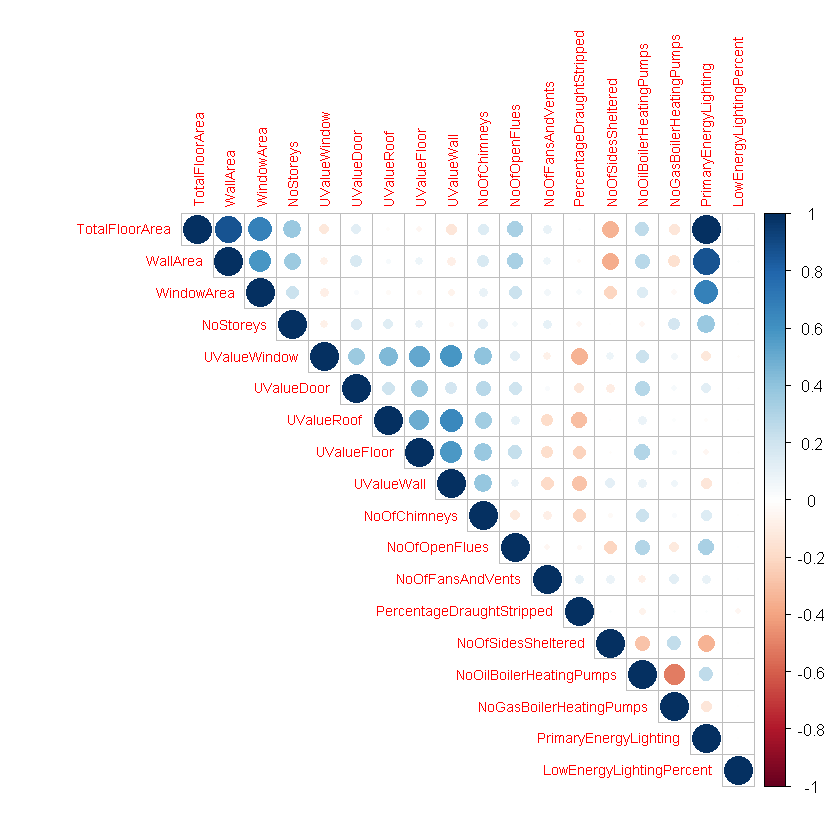

In [129]:
numeric_Test <- insulatorBER %>%
  select_if(is.numeric) 

corMat <- cor(numeric_Test)
corrplot(corMat, type="upper", number.cex = 0.5, number.digits=1, tl.cex	= 0.7)

**<font color = red>TotalFloor area correlates strongly with PrimaryEnergyLighting and WallArea</font>**

**<font color = green> b. Examine the plots to decide which attributes to keep or drop**</font>

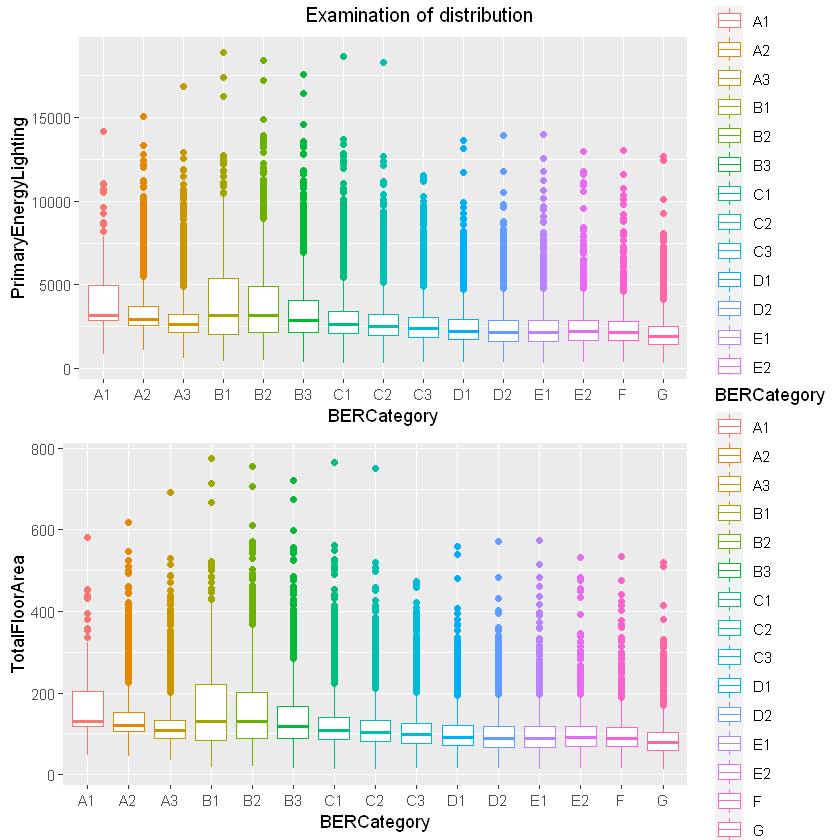

In [130]:
#  TotalFloorarea correlates strongly with PrimaryEnergyLighting and WallArea 
a1 <- ggplot(
  data = insulatorBER,
  aes(y = PrimaryEnergyLighting, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

# TotalFloorArea is a very similar plot to the energy plots
a2 <- ggplot(
  data = insulatorBER,
  aes(y = TotalFloorArea, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

grid.arrange(a1, a2, top = "Examination of distribution", ncol=1, nrow =2)

**<font color = green> c. Create a new data frame with those correlated parameters removed  TotalFloorArea and WallArea. Remove low energy light as it is primarily 0**</font>

In [131]:
insulatorBER_NB <- insulatorBER %>%
  select(
    -TotalFloorArea, -WallArea, -LowEnergyLightingPercent)

**<font color = green> d. Plot the distribution to determine the type of NB test to use for numerics i.e. is it a gaussian distirbution or not**</font>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



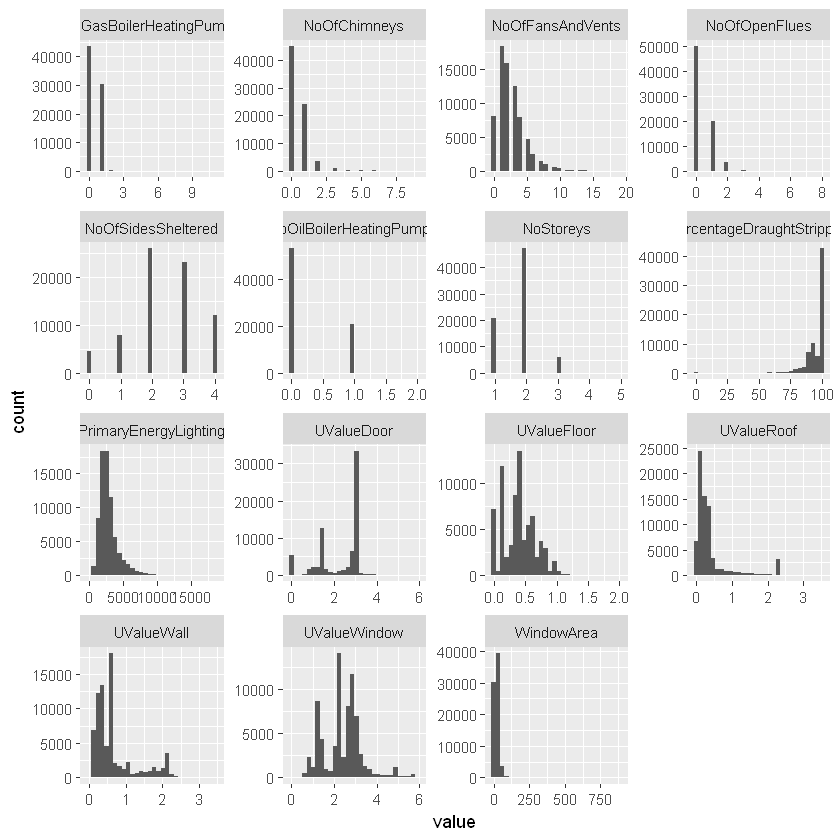

In [132]:
# check
numeric_Test <- insulatorBER_NB %>%
  select_if(is.numeric) 

# test for normality of the numeric variables - all are non gaussian distributions
numeric_Test %>%
  gather() %>% 
  ggplot(aes(value)) +
  facet_wrap(~ key, scales = "free") +
  geom_histogram()

**<font color = red> All are Non Gaussian distributions. This will be fed into the NB parameters</fomt>**

**<font color = green> e. Create the training data</font>**

In [133]:
# set up the training data
dt = sort(sample(nrow(insulatorBER_NB), nrow(insulatorBER_NB)*.7))
BERTrainInsul_NB<-insulatorBER_NB[dt,]
BERValInsul_NB <-insulatorBER_NB[-dt,]
dim(BERTrainInsul_NB)
dim(BERValInsul_NB)

# sample for computational reasons
BERTrainInsul_NB <- BERTrainInsul_NB %>% sample_frac(0.2)
str(BERTrainInsul_NB)

[1] 51741    25

[1] 22176    25

'data.frame':	10348 obs. of  25 variables:
 $ Type                     : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 1 3 6 1 4 5 6 3 1 1 ...
 $ YearBuilt                : Ord.factor w/ 28 levels "(1750,1800]"<..: 21 17 13 20 19 15 10 11 21 28 ...
 $ BERCategory              : Factor w/ 15 levels "A1","A2","A3",..: 7 8 9 3 12 10 5 10 11 3 ...
 $ WindowArea               : num  7.97 35.6 9.65 16.41 6.65 ...
 $ NoStoreys                : int  1 2 2 1 1 2 2 1 1 1 ...
 $ UValueWindow             : num  2.2 3.16 2.8 1.2 3.1 3.21 2.2 2.82 2.2 1.5 ...
 $ UValueDoor               : num  1.36 3 3 1.36 3 3 3 3 1.36 2.2 ...
 $ UValueRoof               : num  0.26 0.13 0.13 0 0.36 0.14 0.22 0.19 0.25 0.15 ...
 $ UValueFloor              : num  0 0.44 0.49 0.25 0.44 0.41 0.38 0.65 0 0.11 ...
 $ UValueWall               : num  0.73 0.55 0.3 0.61 0.55 0.55 0.55 0.5 0.74 0.14 ...
 $ HeatType                 : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 8 6 6 5 5 6 6 6 5 8 ...
 $ Water

**<font color = green> f. Default NB (no tuning / no feature engineering) </font>**

In [134]:
features <- setdiff(names(BERTrainInsul_NB), "BERCategory")
x.h <- BERTrainInsul_NB[, features] # Set X as list of features
y.h <- BERTrainInsul_NB$BERCategory # Set Y as BER Category

In [135]:
options(warn=-1)
# default execution with no tuning
nb_insul_default <- caret::train(
  x = x.h,
  y = y.h,
  method = "nb")

In [136]:
# evaluate
predNB_def <- predict(nb_insul_default, newdata = BERValInsul_NB)
CM_NB_I_Def <- confusionMatrix(predNB_def, BERValInsul_NB$BERCategory, mode = "prec_recall")
options(warn=0)
# examine
CM_NB_I_Def

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1    2   21    4    3    0    0    0    0    0    0    0    0    0
        A2   58 2362 1313   18    3    4    1    1    1    0    0    0    0
        A3    3  106  498  147  116   56   28   15   16    6    4    1    0
        B1    0    5   40   27   19   10    1    4    3    3    3    2    3
        B2    1   10   52  124  181  150   61   47   23    8    7    2    1
        B3    1    1   11  105  426  704  412  208   91   23   10    1    1
        C1    0    0   17   35  230  929 1531 1064  625  224   69    9    3
        C2    0    2   10   21   59  214  417  668  799  726  415  108   35
        C3    0    0    5    8   16   53  118  202  291  328  273  105   48
        D1    0    0    0    1    4   12   28   77  101  152  172  109   71
        D2    0    0    0    0    1   11   31   61  141  198  263  170  148
        E1    0    0    0    0    0

In [137]:
# print the primary metrics
print(paste("Macro Recall:", mean(CM_NB_I_Def$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_NB_I_Def$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_NB_I_Def$byClass[, "F1"], na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_NB_I_Def$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.281085748048997"
[1] "Macro Precision: 0.288417869053516"
[1] "Macro F1 Score: 0.264956583661495"
[1] "Macro Specificity: 0.952492015758202"


**<font color = red> Accuracy is a poor 35% with F1-score of 26%. Precision is 31% and Recall 28%. The A1 class Precision and Recall is a particular problem at less than 1%**</font>

**<font color = green> g. Set up NB with 10 fold cross validation </font>**

In [138]:
# set up ten fold cross validation for NB
train_control <- trainControl(
  method = "cv", 
  number = 10
)

**<font color = green> h. Tune it with fl as leplace correction; userkernal as distribution type (True sets it to non gaussian distribution), adjust is the bandwidth adjustment</font>**

In [139]:
search_grid <- expand.grid(
  usekernel = c(TRUE),
  fL = 1:3,
  adjust = seq(1, 3, by = 1)
)

**<font color = green> i. Run tuned NB (pre proc handles the normalisation of numerics). Tuned model finds best laplace estimaor as 3 with a bandwidth adjustment of 1</font>**

In [140]:
options(warn=-1)

# execute with tuning
nb_insul <- caret::train(
  x = x.h,
  y = y.h,
  method = "nb",
  trControl = train_control,
  tuneGrid = search_grid,
  preProc = c("scale", "center")
)

In [141]:
nb_insul

Naive Bayes 

10348 samples
   24 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

Pre-processing: scaled (15), centered (15), ignore (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 9312, 9312, 9311, 9315, 9314, 9315, ... 
Resampling results across tuning parameters:

  fL  adjust  Accuracy   Kappa    
  1   1       0.3553299  0.2883512
  1   2       0.3549451  0.2873242
  1   3       0.3516587  0.2838761
  2   1       0.3554269  0.2882553
  2   2       0.3535908  0.2855796
  2   3       0.3498210  0.2815578
  3   1       0.3556199  0.2882165
  3   2       0.3524305  0.2840903
  3   3       0.3505948  0.2821344

Tuning parameter 'usekernel' was held constant at a value of TRUE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 3, usekernel = TRUE and adjust
 = 1.

**<font color = green> j. Evaluate the model</font>**

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1    2   10    4    3    0    0    0    0    0    0    0    0    0
        A2   58 2381 1347   22    4    4    1    1    2    0    0    0    0
        A3    3  100  469  149  122   58   29   18   17    6    4    0    0
        B1    0    5   35   19    9    9    3    3    3    4    3    3    2
        B2    1    9   50  119  171  136   56   43   23    6    7    3    1
        B3    1    1   13  110  434  708  405  211   96   24   11    1    2
        C1    0    0   18   37  234  950 1546 1083  638  231   71    9    3
        C2    0    1    9   23   60  210  422  664  824  746  441  118   43
        C3    0    0    5    6   17   50  113  197  281  331  273  104   50
        D1    0    0    0    1    3    8   25   74   88  141  171  108   68
        D2    0    0    0    0    1   11   29   58  131  191  258  176  164
        E1    0    0    0    0    0

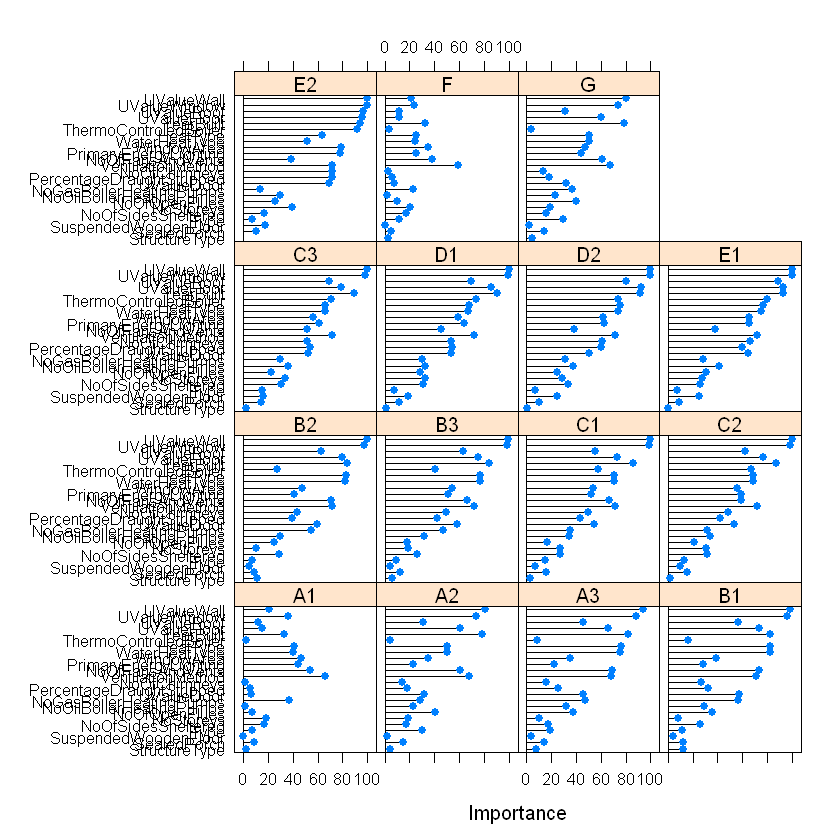

In [142]:
# test against the validation set
predNB <- predict(nb_insul, newdata = BERValInsul_NB)
CM_NB_I_Tune <- confusionMatrix(predNB, BERValInsul_NB$BERCategory, mode = "prec_recall")
options(warn=0)
# examine
CM_NB_I_Tune

# plot important features
plot(varImp(nb_insul))
options(warn=0)

In [143]:
print(paste("Macro Recall:", mean(CM_NB_I_Tune$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_NB_I_Tune$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_NB_I_Tune$byClass[, "F1"], na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_NB_I_Tune$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.275791031893407"
[1] "Macro Precision: 0.282883331370537"
[1] "Macro F1 Score: 0.258430990706434"
[1] "Macro Specificity: 0.952234813618868"


**<font color = red> Neither Accuracy or F1-score is improved,  and the same problem with A1 less than 1% precision and recall. However it is a more stable model following the application of 10-fold cross validation.**</font>

**<font color = green> k. Balance the classes by oversampling the minority class and execute new model</font>**

In [144]:
# balance and test (upsample creates too many samples - days to run )
table(BERTrainInsul_NB$BERCategory)
a.i <- as.data.frame(BERTrainInsul_NB %>% select(-BERCategory))
b.i <- as.factor(BERTrainInsul_NB$BERCategory)
# up sample (based on the 20% sample)
insulatorBER_Train_NB_BAL <- upSample(a.i, b.i, yname = "BERCategory")
table(insulatorBER_Train_NB_BAL$BERCategory)
str(insulatorBER_Train_NB_BAL)

# set up to run NB 
features <- setdiff(names(insulatorBER_Train_NB_BAL), "BERCategory")
x.i <- insulatorBER_Train_NB_BAL[, features] # Set X as list of features
y.i <- insulatorBER_Train_NB_BAL$BERCategory # Set Y as BER Category

options(warn=-1)
# execute
nb_insul_Bal <- caret::train(
  x = x.i,
  y = y.i,
  method = "nb",
  trControl = train_control,
  tuneGrid = search_grid,
  preProc = c("center","scale")
)


  A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2    F    G 
  39 1226  936  235  513  960 1211 1145  946  837  719  436  335  314  496 


  A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2    F    G 
1226 1226 1226 1226 1226 1226 1226 1226 1226 1226 1226 1226 1226 1226 1226 

'data.frame':	18390 obs. of  25 variables:
 $ Type                     : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 6 3 5 3 3 5 6 3 6 3 ...
 $ YearBuilt                : Ord.factor w/ 28 levels "(1750,1800]"<..: 27 28 27 27 9 27 27 4 27 28 ...
 $ WindowArea               : num  35.9 30.4 16.8 102.2 52.4 ...
 $ NoStoreys                : int  2 3 2 2 1 2 2 2 2 3 ...
 $ UValueWindow             : num  1.21 1.08 1.2 1.23 1.96 1.21 0.7 0.91 0.7 1.35 ...
 $ UValueDoor               : num  1.2 3 1.4 1.2 0 1.2 1.4 3 1.4 1.4 ...
 $ UValueRoof               : num  0.16 0.16 0.15 0.13 0.12 0.12 0.13 0.14 0.13 0.15 ...
 $ UValueFloor              : num  0.13 0.13 0.13 0.12 0.12 0.13 0.14 0.12 0.13 0.11 ...
 $ UValueWall               : num  0.19 0.2 0.16 0.16 0.2 0.19 0.18 0.17 0.21 0.15 ...
 $ HeatType                 : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 5 8 5 5 5 5 5 5 8 5 ...
 $ WaterHeatType            : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 5 8 5 5 5 

In [145]:
predNB_Bal <- predict(nb_insul, newdata = BERValInsul_NB)
CM_NB_I_BaL_Tune <- confusionMatrix(predNB, BERValInsul_NB$BERCategory,  mode = "prec_recall")
options(warn=0)
# examine
CM_NB_I_BaL_Tune

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1    2   10    4    3    0    0    0    0    0    0    0    0    0
        A2   58 2381 1347   22    4    4    1    1    2    0    0    0    0
        A3    3  100  469  149  122   58   29   18   17    6    4    0    0
        B1    0    5   35   19    9    9    3    3    3    4    3    3    2
        B2    1    9   50  119  171  136   56   43   23    6    7    3    1
        B3    1    1   13  110  434  708  405  211   96   24   11    1    2
        C1    0    0   18   37  234  950 1546 1083  638  231   71    9    3
        C2    0    1    9   23   60  210  422  664  824  746  441  118   43
        C3    0    0    5    6   17   50  113  197  281  331  273  104   50
        D1    0    0    0    1    3    8   25   74   88  141  171  108   68
        D2    0    0    0    0    1   11   29   58  131  191  258  176  164
        E1    0    0    0    0    0

In [146]:
# print metrics
print(paste("Macro Recall:", mean(CM_NB_I_BaL_Tune$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_NB_I_BaL_Tune$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_NB_I_BaL_Tune$byClass[, "F1"], , na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_NB_I_BaL_Tune$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.275791031893407"
[1] "Macro Precision: 0.282883331370537"
[1] "Macro F1 Score: 0.258430990706434"
[1] "Macro Specificity: 0.952234813618868"


**<font color = red> F1-score is not improved at 26%, returning almost the exact same results as the imbalanced model**</font>

**<font color = green> l. AUC and Precision-Recall plot - https://github.com/WandeRum/multiROC </font>**

In [226]:
options(warn=-1)
nb_pred <- predict(nb_insul, BERValInsul_NB, type = 'prob') 
nb_pred <- data.frame(nb_pred)
colnames(nb_pred) <- paste(colnames(nb_pred), "pred_NB", sep="_")

true_label <- dummies::dummy(BERValInsul_NB$BERCategory, sep = ".")
true_label <- data.frame(true_label)
colnames(true_label) <- gsub(".*?\\.", "", colnames(true_label))
colnames(true_label) <- paste(colnames(true_label), "true", sep = "_")
final_df <- cbind(true_label, nb_pred)

roc_res <- multi_roc(final_df, force_diag=T)
pr_res <- multi_pr(final_df, force_diag=T)

plot_roc_df <- plot_roc_data(roc_res)
plot_pr_df <- plot_pr_data(pr_res)

plot_roc_df <- plot_roc_df[plot_roc_df$Group!="Macro" & plot_roc_df$Group!="Micro", ]
plot_pr_df <- plot_pr_df[plot_pr_df$Group!="Macro" & plot_pr_df$Group!="Micro", ]

options(warn=0)

**<font color = red> The AUC is a very poor 0.3**</font>

In [227]:
# Precision - Recall AUC 
pr_res$AUC

$NB
$NB$A1
[1] 0.05431658

$NB$A2
[1] 0.8227153

$NB$A3
[1] 0.4689532

$NB$B1
[1] 0.1598375

$NB$B2
[1] 0.21764

$NB$B3
[1] 0.328402

$NB$C1
[1] 0.3275756

$NB$C2
[1] 0.1974533

$NB$C3
[1] 0.1840226

$NB$D1
[1] 0.1909349

$NB$D2
[1] 0.20509

$NB$E1
[1] 0.1457551

$NB$E2
[1] 0.1588679

$NB$F
[1] 0.1991651

$NB$G
[1] 0.8021836

$NB$macro
[1] 0.2973739

$NB$micro
[1] 0.3895896

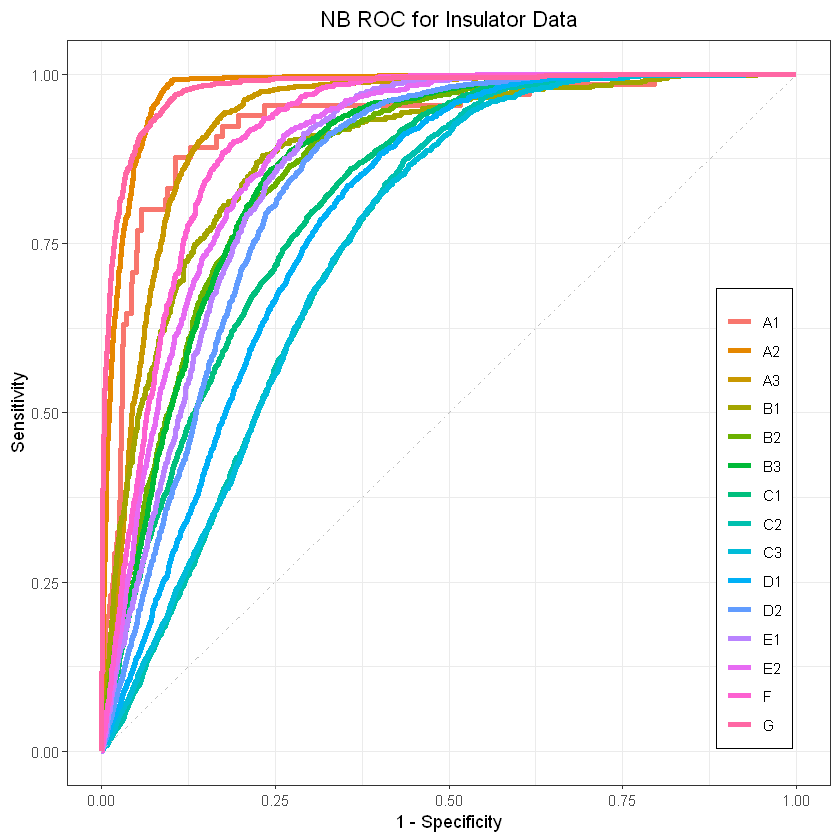

In [228]:
ggplot(plot_roc_df, aes(x = 1-Specificity, y=Sensitivity)) +
  geom_path(aes(color = Group), size=1.5) +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1), 
               colour='grey', linetype = 'dotdash') +
  ggtitle("NB ROC for Insulator Data") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5), 
        legend.justification=c(1, 0), legend.position=c(.95, .05),
        legend.title=element_blank(), 
        legend.background = element_rect(fill=NULL, size=0.5, 
                                         linetype="solid", colour ="black"))

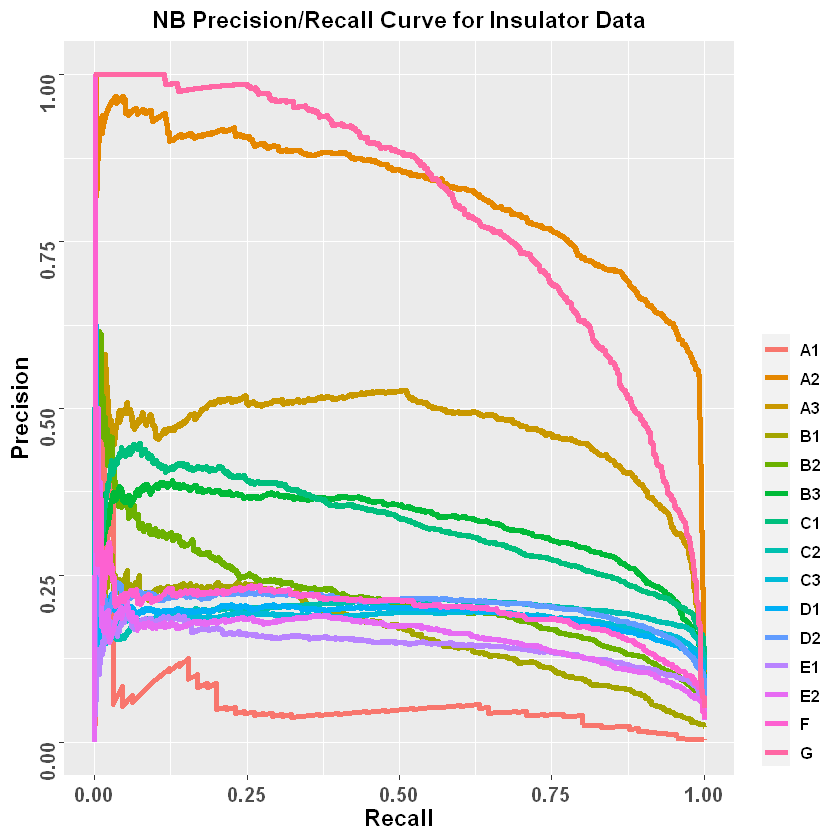

In [229]:
ggplot(plot_pr_df, aes(x=Recall, y=Precision)) + 
  geom_path(aes(color = Group), size=1.5) + 
  ggtitle("NB Precision/Recall Curve for Insulator Data") +
   theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

***
**<font color = blue> 14. Naive Bayes - Heating Data**</font>

**<font color = green> a. Re-examine correlations as independence of data is critical for NB**</font>

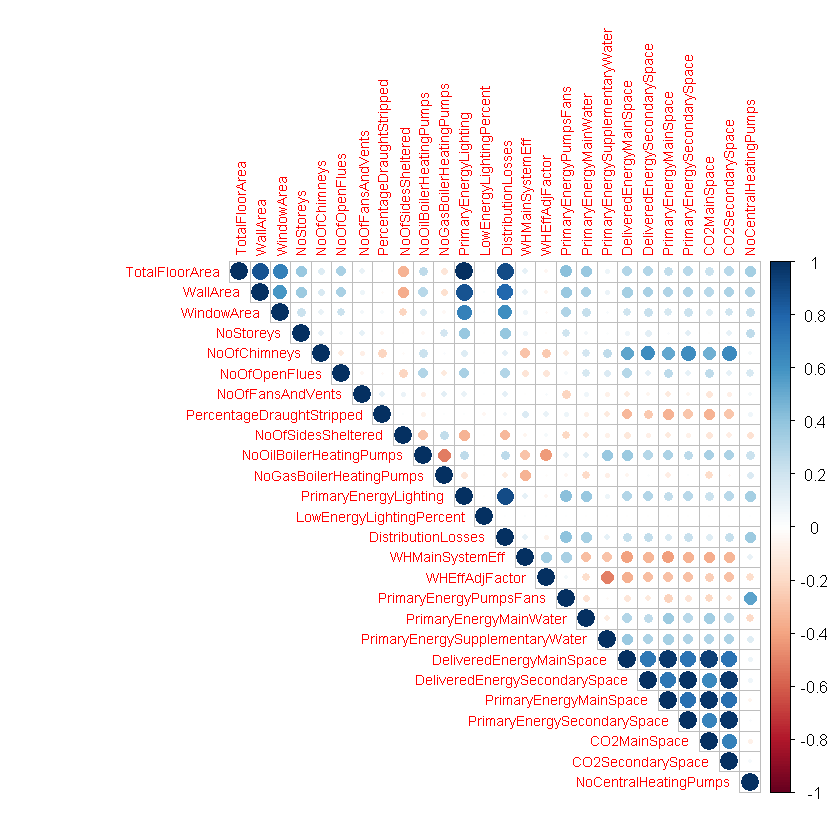

In [151]:
numeric_Test <- heatingBER %>%
  select_if(is.numeric) 

corMat <- cor(numeric_Test)
corrplot(corMat, type="upper", number.cex = 0.5, number.digits=1, tl.cex	= 0.7)

**<font color = red> 1. DeliveredEnergyMainSpace highly correlated with PrimaryEnergyMainSpace and CO2MainSpace <br>
</font>**

**<font color = green> b. Examine the plots to decide which attributes to keep or drop (three plots are very similar - remove two of these features (keep primary as per Insulator data)**</font>

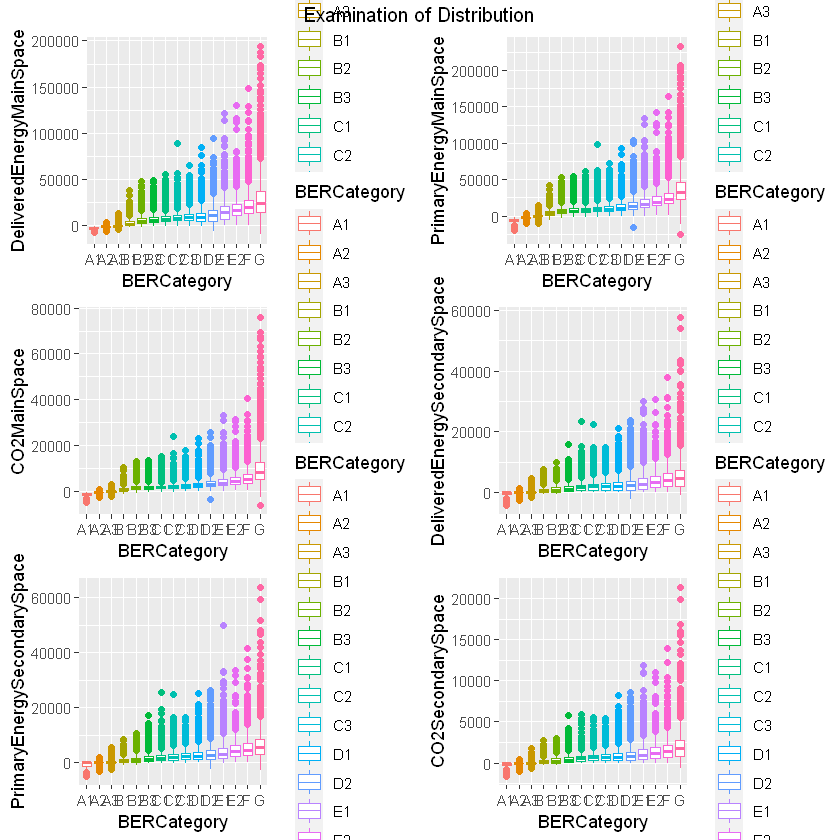

In [152]:
# plots are very similar - remove two of these features
p1 <- ggplot(
  data = heatingBER,
  aes(y = DeliveredEnergyMainSpace, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

p2 <- ggplot(
  data = heatingBER,
  aes(y = PrimaryEnergyMainSpace, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

p3 <- ggplot(
  data = heatingBER,
  aes(y = CO2MainSpace, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

# similar correlations for Secondary Energy
p4 <- ggplot(
  data = heatingBER,
  aes(y = DeliveredEnergySecondarySpace, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

p5 <-ggplot(
  data = heatingBER,
  aes(y = PrimaryEnergySecondarySpace, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

p6 <-ggplot(
  data = heatingBER,
  aes(y = CO2SecondarySpace, x = BERCategory, color = BERCategory)) +
  geom_boxplot()

grid.arrange(p1, p2, p3, p4, p5,p6, top = "Examination of Distribution", ncol=2, nrow =3)

**<font color = green> c. Create a new data frame with those correlated parameters removed and check it**</font>

In [153]:
# create a new data frame - water heat type is removed as it correlates directly to heat type
heatingBER_NB <- heatingBER %>%
  select(
    -TotalFloorArea, -WallArea, -DeliveredEnergyMainSpace, -CO2MainSpace, -DeliveredEnergySecondarySpace, -CO2SecondarySpace, -WaterHeatType, -LowEnergyLightingPercent)

**<font color = green> d. Plot the distribution to determine the type of NB test to use for numerics i.e. is it a gaussian distirbution or not**</font>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



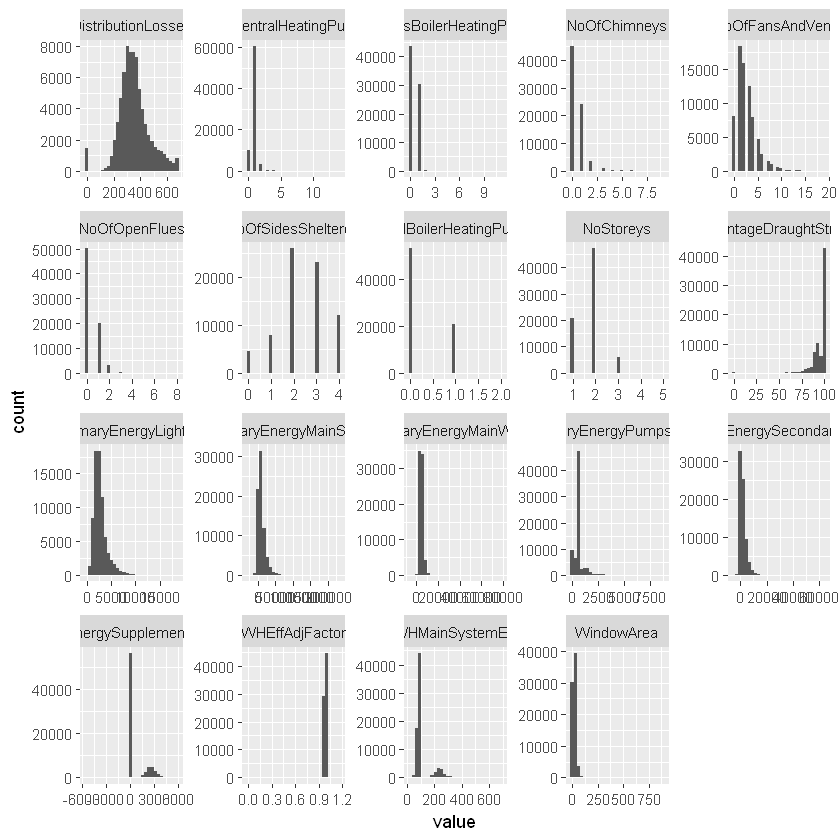

In [154]:
numeric_Test <- heatingBER_NB %>%
  select_if(is.numeric) 

# visualize this
numeric_Test %>%
  gather() %>% 
  ggplot(aes(value)) +
  facet_wrap(~ key, scales = "free") +
  geom_histogram()

**<font color = red> All are Non Gaussian distributions. This will be fed into the NB parameters</fomt>**

**<font color = green> e. Split into training and validation</font>**

In [155]:
str(heatingBER_NB)

'data.frame':	73917 obs. of  30 variables:
 $ Type                           : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 6 5 5 3 5 6 4 1 3 5 ...
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ WindowArea                     : num  8.53 23.63 18.55 19.88 28.36 ...
 $ NoStoreys                      : int  2 2 2 2 3 3 1 1 2 1 ...
 $ HeatType                       : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 8 8 8 8 8 8 8 8 6 8 ...
 $ NoOfChimneys                   : int  0 3 0 0 1 1 0 0 2 1 ...
 $ NoOfOpenFlues                  : int  0 1 1 0 0 0 1 0 1 0 ...
 $ NoOfFansAndVents               : int  5 4 2 4 2 3 7 5 0 7 ...
 $ SealedPorch                    : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 2 1 1 ...
 $ StructureType                  : Factor w/ 3 levels "Insulated Concrete",..: 2 2 2 3 2 2 2 2 

**<font color = green> f. Create the training data</font>**

In [156]:
dt = sort(sample(nrow(heatingBER_NB), nrow(heatingBER_NB)*.7))
BERTrainHeat_NB<-heatingBER_NB[dt,]
BERValHeat_NB <-heatingBER_NB[-dt,]
dim(BERTrainHeat_NB)
dim(BERValHeat_NB)

# sample for computational reasons
BERTrainHeat_NB <- BERTrainHeat_NB %>% sample_frac(0.2)
str(BERTrainHeat_NB)

[1] 51741    30

[1] 22176    30

'data.frame':	10348 obs. of  30 variables:
 $ Type                           : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 3 5 5 3 5 5 3 3 3 3 ...
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 28 20 15 21 20 8 9 21 20 13 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 3 6 9 9 9 14 15 8 7 7 ...
 $ WindowArea                     : num  72.8 16.1 19.7 28.9 22.6 ...
 $ NoStoreys                      : int  2 2 2 2 2 1 1 2 2 3 ...
 $ HeatType                       : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 5 8 8 6 8 6 6 6 8 6 ...
 $ NoOfChimneys                   : int  0 0 1 2 1 1 3 1 2 1 ...
 $ NoOfOpenFlues                  : int  0 1 0 0 0 0 0 0 1 1 ...
 $ NoOfFansAndVents               : int  1 5 5 0 2 1 0 4 2 1 ...
 $ SealedPorch                    : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 2 1 1 1 ...
 $ StructureType                  : Factor w/ 3 levels "Insulated Concrete",..: 2 2 2 2 2 2 2 3 2 2

**<font color = green> g. Run default NB on heat data </font>**

In [231]:
# RUN NB with the control parameters set earlier (10 k-fold cross validation)
features <- setdiff(names(BERTrainHeat_NB), "BERCategory")
x.h <- BERTrainHeat_NB[, features] # Set X as list of features
y.h <- BERTrainHeat_NB$BERCategory # Set Y as BER Category

options(warn=-1)
# run default
nb_heat_def <- caret::train(
  x = x.h,
  y = y.h,
  method = "nb"
)

In [232]:
# test against the validation set
predNBH_Def <- predict(nb_heat_def, newdata = BERValHeat_NB)
CM_NB_H_Def <- confusionMatrix(predNBH_Def, BERValHeat_NB$BERCategory,  mode = "prec_recall")
options(warn=0)
# examine
CM_NB_H_Def

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   38  130    9    0    0    0    0    0    0    0    0    0    0
        A2   21 1959  374    6    0    0    0    0    0    0    1    0    0
        A3    1  397 1344   85   32   23    6    0    1    5    1    0    0
        B1    3   22  212  152   84   42   23   18    8   10    2    1    1
        B2    0    4   31  107  219  158   86   61   55   38   25   15    8
        B3    0    0    5   88  504  982  562  246  127   58   34   18    9
        C1    0    0    0    6  135  674 1185  760  374  176   62   19    7
        C2    0    0    0    0   11   95  327  498  473  345  211   36   29
        C3    0    0    0    1   27  114  252  327  364  246   77   29   14
        D1    0    0    0    4   11   60  152  289  417  534  462  188   62
        D2    0    0    7    4   25   21   42  102  103  159  241  169  115
        E1    0    0    0    0    0

In [159]:
# print the primary metrics
print(paste("Macro Recall:", mean(CM_NB_H_Def$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_NB_H_Def$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_NB_H_Def$byClass[, "F1"], , na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_NB_H_Def$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.288752863708943"
[1] "Macro Precision: 0.326651314146754"
[1] "Macro F1 Score: 0.286407028561678"
[1] "Macro Specificity: 0.953254995325754"


**<font color = red> F1-score is a lot poorer than similar dataset using random forest returning a much lower F1-score of 29%, and an accuracy of 37%**</font>

**<font color = green> h. Tuned NB for Heat data </font>**

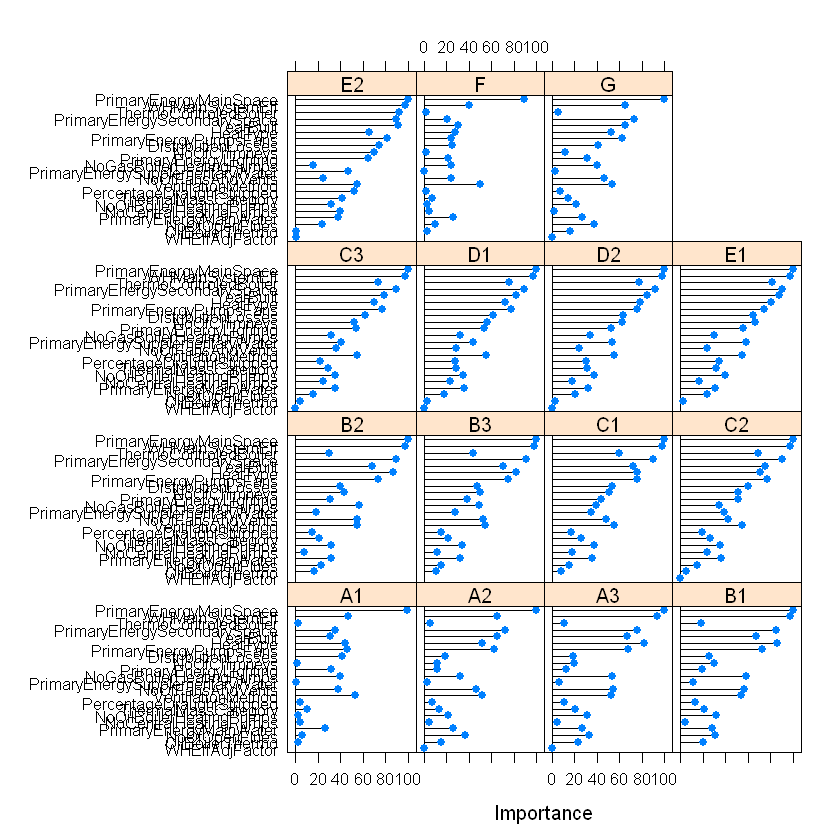

In [233]:
options(warn=-1)
nb_heat <- caret::train(
  x = x.h,
  y = y.h,
  method = "nb",
  trControl = train_control,
  tuneGrid = search_grid,
  preProc = c("scale", "center")
)

# plot it
plot(varImp(nb_heat))

In [240]:
nb_heat

Naive Bayes 

51741 samples
   22 predictor
   15 classes: 'A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'E1', 'E2', 'F', 'G' 

Pre-processing: ignore (22) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 46568, 46567, 46569, 46566, 46567, 46566, ... 
Resampling results across tuning parameters:

  fL  adjust  Accuracy   Kappa    
  1   1       0.3961465  0.3381261
  1   2       0.3961465  0.3381261
  1   3       0.3961465  0.3381261
  2   1       0.3949290  0.3357568
  2   2       0.3949290  0.3357568
  2   3       0.3949290  0.3357568
  3   1       0.3936146  0.3335212
  3   2       0.3936146  0.3335212
  3   3       0.3936146  0.3335212

Tuning parameter 'usekernel' was held constant at a value of TRUE
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 1, usekernel = TRUE and adjust
 = 1.

In [234]:
# test against the validation set
predNB_H <- predict(nb_heat, newdata = BERValHeat_NB)
CM_NB_H_Tune <- confusionMatrix(predNB_H, BERValHeat_NB$BERCategory,  mode = "prec_recall")
options(warn=0)
# examine
CM_NB_H_Tune

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   24   50    6    0    1    1    0    0    0    0    0    0    0
        A2   35 2051  382    3    0    0    0    0    0    0    0    0    0
        A3    1  387 1363  103   45   25    6    1    0    1    0    0    0
        B1    3   20  184  133   68   31   17   16    9   10    5    4    1
        B2    0    4   36  104  173  132   69   57   45   31   19   11    9
        B3    0    0    5   94  546  980  552  243  127   59   27    8    7
        C1    0    0    0    7  142  716 1229  787  394  195   73   24    6
        C2    0    0    0    0   13   93  318  495  479  355  228   52   29
        C3    0    0    0    3   24  110  251  341  380  267   93   35   17
        D1    0    0    0    3   13   61  151  276  404  532  484  201   70
        D2    0    0    6    2   23   20   45  106  117  186  247  192  127
        E1    0    0    0    0    1

In [235]:
# print metrics
print(paste("Macro Recall:", mean(CM_NB_H_Tune$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_NB_H_Tune$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_NB_H_Tune$byClass[, "F1"],, na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_NB_H_Tune$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.358990753627793"
[1] "Macro Precision: 0.348837891725792"
[1] "Macro F1 Score: 0.346880606620474"
[1] "Macro Specificity: 0.955950041484992"


**<font color = red> Accuracy improves slightly but is very similar to Insulator data at 37% and F1-score is 29%. This is likely as most of the important predictors are numerical features which does not work well in a probablistic model**</font>

**<font color = green> i. Tuned NB for Balanced Heat data </font>**

In [163]:
# examine the distribution and balance for class imbalance
table(BERTrainHeat_NB$BERCategory)
a.h <- as.data.frame(BERTrainHeat_NB %>% select(-BERCategory))
b.h <- as.factor(BERTrainHeat_NB$BERCategory)
# Balance - upsample is based on the 20% sample...
heatingBER_Train_NB_BAL <- upSample(a.h, b.h, yname = "BERCategory")
table(heatingBER_Train_NB_BAL$BERCategory)
str(heatingBER_Train_NB_BAL)

# RUN NB with the control parameters set earlier (10 k-fold cross validation)
features <- setdiff(names(heatingBER_Train_NB_BAL), "BERCategory")
x.h <- heatingBER_Train_NB_BAL[, features] # Set X as list of features
y.h <- heatingBER_Train_NB_BAL$BERCategory # Set Y as BER Category
# execute
options(warn=-1)

nb_heat_bal <- caret::train(
  x = x.h,
  y = y.h,
  method = "nb",
  trControl = train_control,
  tuneGrid = search_grid,
  preProc = c("scale", "center")
)


  A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2    F    G 
  27 1094  922  213  516  993 1207 1079  994  882  744  408  348  350  571 


  A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2    F    G 
1207 1207 1207 1207 1207 1207 1207 1207 1207 1207 1207 1207 1207 1207 1207 

'data.frame':	18105 obs. of  30 variables:
 $ Type                           : Factor w/ 6 levels "Apartment","Basement Dwelling",..: 3 6 5 6 6 6 3 5 5 5 ...
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 17 28 28 28 17 27 28 28 27 15 ...
 $ WindowArea                     : num  22.1 11.3 26.8 40.5 19.3 ...
 $ NoStoreys                      : int  2 3 2 2 2 2 2 2 2 2 ...
 $ HeatType                       : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ NoOfChimneys                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NoOfOpenFlues                  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ NoOfFansAndVents               : int  0 0 1 1 3 0 0 1 4 7 ...
 $ SealedPorch                    : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ StructureType                  : Factor w/ 3 levels "Insulated Concrete",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ SuspendedWoodenFloor           : Factor w/ 3 levels "No","Sealed",..: 1 1 1 1 1 1 1 1 1 1 .

In [164]:
# test against the validation set
predNB_Bal <- predict(nb_heat_bal, newdata = BERValHeat_NB)
CM_NB_H_BaL_Tune <- confusionMatrix(predNB_Bal, BERValHeat_NB$BERCategory, mode = "prec_recall")
options(warn=0)
# examine
CM_NB_H_BaL_Tune

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   45  141   35    6    0    1    0    1    0    1    0    0    1
        A2   27 2273  872    5    0    0    0    1    0    1    0    0    0
        A3    0  101  852  140   74   30   10    2    1    0    0    0    0
        B1    0   16  118  117   86   40   23   15   29   10    7    3    1
        B2    0    1   30  128  453  533  322  206  149   77   68   22    9
        B3    0    0    1   41  362  875  749  350  154   92   41   10    3
        C1    0    0    0    2   51  456  983  762  244   79   22    6    2
        C2    0    0    0    3    6   32  169  391  443  344  180   33   16
        C3    0    0    0    0    9  106  272  454  568  482  191   40   17
        D1    0    0    0    1    1   22   51  124  223  268  294  126   44
        D2    0    0    0    0    1    9   32   67  101  165  179  106   44
        E1    0    0    6    2    9

In [165]:
# print metrics
print(paste0("Macro Recall:", mean(CM_NB_H_BaL_Tune$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_NB_H_BaL_Tune$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_NB_H_BaL_Tune$byClass[, "F1"],, na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_NB_H_BaL_Tune$byClass[, "Specificity"]))) 

[1] "Macro Recall:0.371663976847706"
[1] "Macro Precision: 0.341079639356305"
[1] "Macro F1 Score: 0.335973020675336"
[1] "Macro Specificity: 0.954610928880814"


**<font color = red> Balanced classes show a slight improvement with F1-score increasing to 33% and accuracy to 37% but its still a poor model**</font>

**<font color = green> j. AUC and ROC plot - https://github.com/WandeRum/multiROC </font>**

In [236]:
options(warn=-1)
nb_pred <- predict(nb_heat, BERValHeat_NB, type = 'prob') 
nb_pred <- data.frame(nb_pred)
colnames(nb_pred) <- paste(colnames(nb_pred), "pred_NB", sep="_")

true_label <- dummies::dummy(BERValHeat_NB$BERCategory, sep = ".")
true_label <- data.frame(true_label)
colnames(true_label) <- gsub(".*?\\.", "", colnames(true_label))
colnames(true_label) <- paste(colnames(true_label), "true", sep = "_")
final_df <- cbind(true_label, nb_pred)

roc_res <- multi_roc(final_df, force_diag=T)
pr_res <- multi_pr(final_df, force_diag=T)

plot_roc_df <- plot_roc_data(roc_res)
plot_pr_df <- plot_pr_data(pr_res)

plot_roc_df <- plot_roc_df[plot_roc_df$Group!="Macro" & plot_roc_df$Group!="Micro", ]
plot_pr_df <- plot_pr_df[plot_pr_df$Group!="Macro" & plot_pr_df$Group!="Micro", ]

options(warn=0)

**<font color = red> The macro precision-recall AUC is a very poor 0.35**</font>

In [237]:
# Precision - Recall AUC 
pr_res$AUC

$NB
$NB$A1
[1] 0.202302

$NB$A2
[1] 0.8960096

$NB$A3
[1] 0.7349982

$NB$B1
[1] 0.2060552

$NB$B2
[1] 0.2546744

$NB$B3
[1] 0.3633555

$NB$C1
[1] 0.3528549

$NB$C2
[1] 0.2588223

$NB$C3
[1] 0.2289119

$NB$D1
[1] 0.2159511

$NB$D2
[1] 0.2016792

$NB$E1
[1] 0.1554345

$NB$E2
[1] 0.1598441

$NB$F
[1] 0.2290422

$NB$G
[1] 0.7628577

$NB$macro
[1] 0.3480982

$NB$micro
[1] 0.4551095

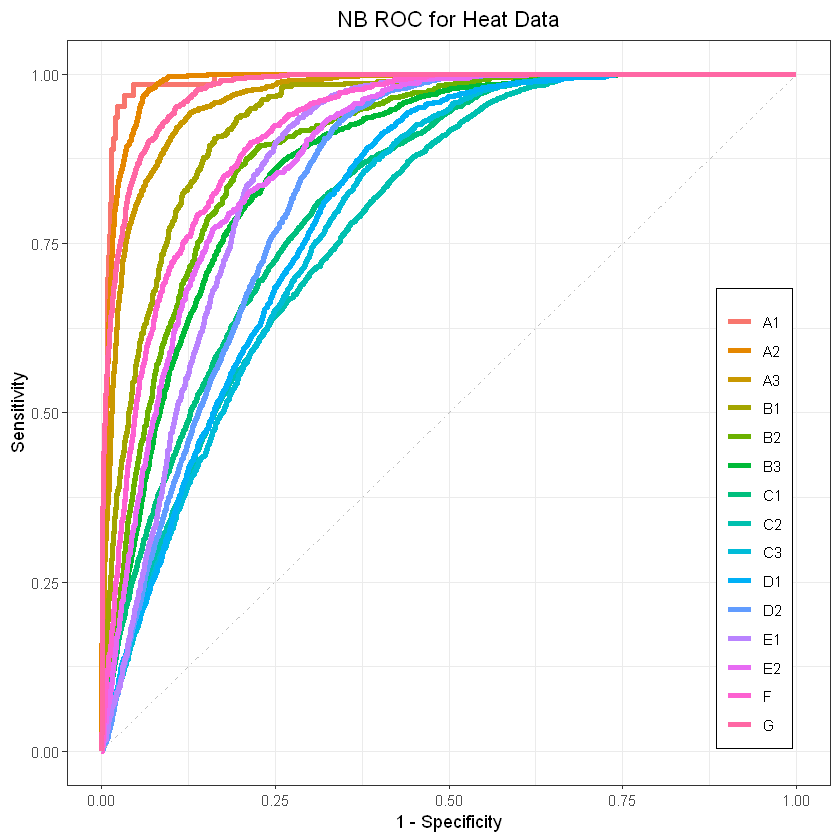

In [238]:
ggplot(plot_roc_df, aes(x = 1-Specificity, y=Sensitivity)) +
  geom_path(aes(color = Group), size=1.5) +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1), 
               colour='grey', linetype = 'dotdash') +
  ggtitle("NB ROC for Heat Data") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5), 
        legend.justification=c(1, 0), legend.position=c(.95, .05),
        legend.title=element_blank(), 
        legend.background = element_rect(fill=NULL, size=0.5, 
                                         linetype="solid", colour ="black"))

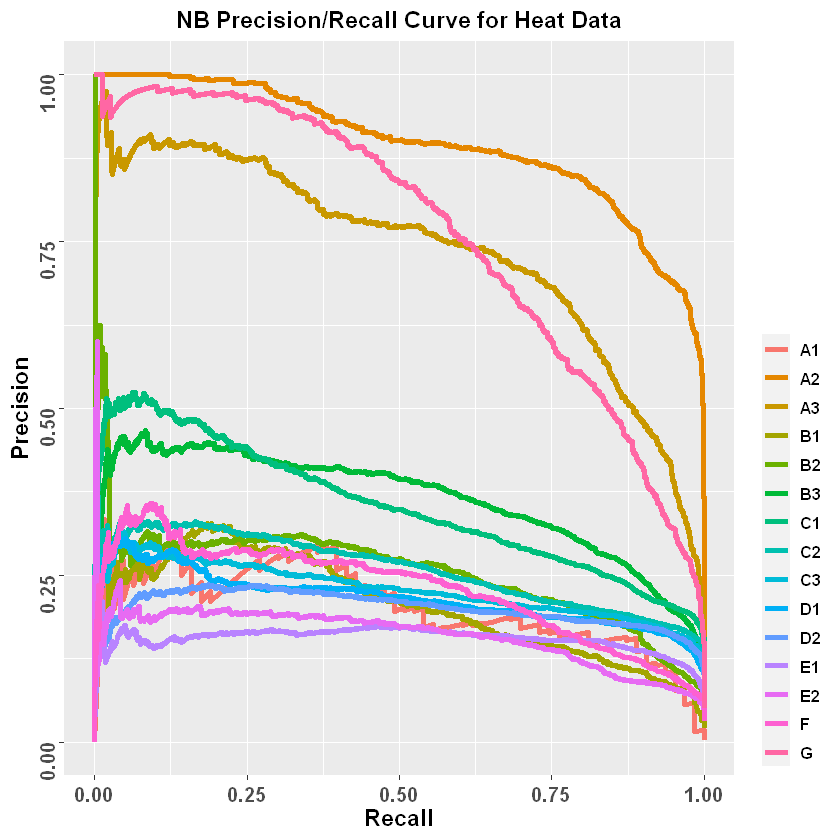

In [239]:
ggplot(plot_pr_df, aes(x=Recall, y=Precision)) + 
  geom_path(aes(color = Group), size=1.5) + 
  ggtitle("NB Precision/Recall Curve for Heat Data") +
   theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

**<font color = green> k. Try with manual binning to control the transformation of numeric to categorical features. Use a plot of the distribution and the cut function to implement the binning</font>**

[1] 283.638

[1] 18868

[1] 0

[1] 100

[1] 0

[1] 670.95

[1] 30

[1] 691.81

[1] 0

[1] 1.16

[1] 0

[1] 8661.603

[1] -6089.048

[1] 77491.73

[1] -5425.396

[1] 5876.842

[1] -25424.68

[1] 232788.4

[1] -4726.666

[1] 63512.25

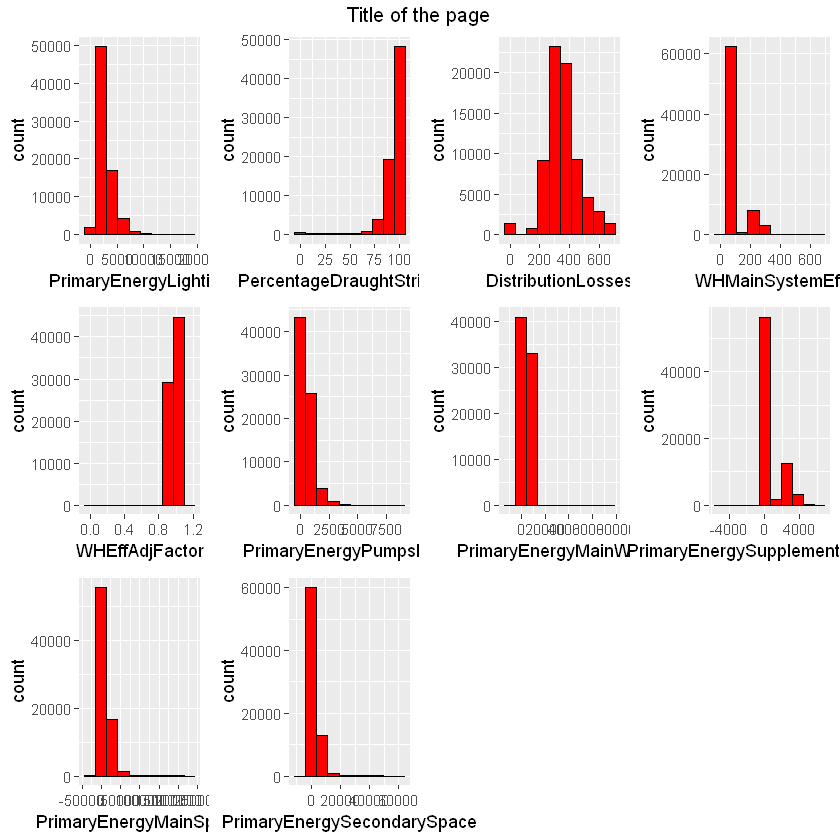

In [170]:
w1 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = PrimaryEnergyLighting), bins = 10, colour = "black", fill = "red")
min(heatingBER_NB$PrimaryEnergyLighting)
max(heatingBER_NB$PrimaryEnergyLighting)
#
w2 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = PercentageDraughtStripped), bins = 10, colour = "black", fill = "red")
min(heatingBER_NB$PercentageDraughtStripped)
max(heatingBER_NB$PercentageDraughtStripped)
#
w4 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = DistributionLosses), bins = 10, colour = "black", fill = "red")
min(heatingBER_NB$DistributionLosses)
max(heatingBER_NB$DistributionLosses)
#
w5 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = WHMainSystemEff), bins = 10, colour = "black", fill = "red")
min(heatingBER_NB$WHMainSystemEff)
max(heatingBER_NB$WHMainSystemEff)
#
w6 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = WHEffAdjFactor), bins = 10, colour = "black", fill = "red") 
min(heatingBER_NB$WHEffAdjFactor)
max(heatingBER_NB$WHEffAdjFactor)
#
w7 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = PrimaryEnergyPumpsFans), bins = 10, colour = "black", fill = "red") 
min(heatingBER_NB$PrimaryEnergyPumpsFans)
max(heatingBER_NB$PrimaryEnergyPumpsFans)
#
w8 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = PrimaryEnergyMainWater), bins = 10, colour = "black", fill = "red") 
min(heatingBER_NB$PrimaryEnergyMainWater)
max(heatingBER_NB$PrimaryEnergyMainWater)
#
w9 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = PrimaryEnergySupplementaryWater), bins = 10, colour = "black", fill = "red") 
min(heatingBER_NB$PrimaryEnergySupplementaryWater)
max(heatingBER$PrimaryEnergySupplementaryWater)
#
w10 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = PrimaryEnergyMainSpace), bins = 10, colour = "black", fill = "red") 
min(heatingBER_NB$PrimaryEnergyMainSpace)
max(heatingBER_NB$PrimaryEnergyMainSpace)
#
w11 <- ggplot(data = heatingBER_NB) + geom_histogram(aes(x = PrimaryEnergySecondarySpace), bins = 10, colour = "black", fill = "red") 
min(heatingBER_NB$PrimaryEnergySecondarySpace)
max(heatingBER_NB$PrimaryEnergySecondarySpace)
#
grid.arrange(w1,w2, w4, w5,w6,w7,w8,w9,w10,w11, top = "Title of the page", ncol=4, nrow =3)

In [171]:
# find min and max of discrete features
min(heatingBER_NB$NoStoreys, na.rm = TRUE)
max(heatingBER_NB$NoStoreys, na.rm = TRUE)
#
min(heatingBER_NB$NoOfChimneys, na.rm = TRUE)
max(heatingBER_NB$NoOfChimneys, na.rm = TRUE)
#
min(heatingBER_NB$NoOfOpenFlues, na.rm = TRUE)
max(heatingBER_NB$NoOfOpenFlues, na.rm = TRUE)
#
min(heatingBER_NB$NoOfFansAndVents, na.rm = TRUE)
max(heatingBER_NB$NoOfFansAndVents, na.rm = TRUE)
#
min(heatingBER_NB$NoOfSidesSheltered, na.rm = TRUE)
max(heatingBER_NB$NoOfSidesSheltered, na.rm = TRUE)
#
min(heatingBER_NB$NoOilBoilerHeatingPumps, na.rm = TRUE)
max(heatingBER_NB$NoOilBoilerHeatingPumps, na.rm = TRUE)
#
min(heatingBER_NB$NoCentralHeatingPumps, na.rm = TRUE)
max(heatingBER_NB$NoCentralHeatingPumps, na.rm = TRUE)
# remaining discrete numeric to factors
heatingBER_NB$NoStoreys = cut(heatingBER_NB$NoStoreys, 5, labels=c('One','Two', 'Three','Four','Five')) 
heatingBER_NB$NoOfChimneys = cut(heatingBER_NB$NoOfChimneys, 10, labels=c('None','One','Two', 'Three','Four','Five','Six','Seven','Eight','Nine')) 
heatingBER_NB$NoOfOpenFlues = cut(heatingBER_NB$NoOfOpenFlues, 9, labels=c('None','One','Two', 'Three','Four','Five','Six','Seven','Eight')) 
heatingBER_NB$NoOfFansAndVents = cut(heatingBER_NB$NoOfFansAndVents, 20, labels=c('None','One','Two', 'Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen')) 
heatingBER_NB$NoOfSidesSheltered = cut(heatingBER_NB$NoOfSidesSheltered, 5, labels=c('None','One','Two', 'Three','Four')) 
heatingBER_NB$NoOilBoilerHeatingPumps = cut(heatingBER_NB$NoOilBoilerHeatingPumps, 3, labels=c('None','One','Two')) 
heatingBER_NB$NoGasBoilerHeatingPumps = cut(heatingBER_NB$NoGasBoilerHeatingPumps, 12, labels=c('None','One','Two', 'Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven')) 
heatingBER_NB$NoCentralHeatingPumps = cut(heatingBER_NB$NoCentralHeatingPumps, 15, labels=c('None','One','Two', 'Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen'))

# Bining of numeric features - decide how many bins per feature
heatingBER_NB$PrimaryEnergyLighting = cut(heatingBER_NB$PrimaryEnergyLighting, 20) 
heatingBER_NB$PercentageDraughtStripped = cut(heatingBER_NB$PercentageDraughtStripped, 10) 
heatingBER_NB$DistributionLosses = cut(heatingBER_NB$DistributionLosses, 50) 
heatingBER_NB$WHMainSystemEff = cut(heatingBER_NB$WHMainSystemEff, 20)
heatingBER_NB$WHEffAdjFactor = cut(heatingBER_NB$WHEffAdjFactor, 4) 
heatingBER_NB$PrimaryEnergyPumpsFans = cut(heatingBER_NB$PrimaryEnergyPumpsFans, 50) 
heatingBER_NB$PrimaryEnergyMainWater = cut(heatingBER_NB$PrimaryEnergyMainWater, 100) 
heatingBER_NB$PrimaryEnergySupplementaryWater = cut(heatingBER_NB$PrimaryEnergySupplementaryWater,  100) 
heatingBER_NB$PrimaryEnergyMainSpace = cut(heatingBER_NB$PrimaryEnergyMainSpace, 500)
heatingBER_NB$PrimaryEnergySecondarySpace = cut(heatingBER_NB$PrimaryEnergySecondarySpace, 300)

# there are a number of features that have little or no impact as per the importance plots so remove them
heatingBER_NBFixed <- heatingBER_NB %>%
  select(
    -WindowArea, -SealedPorch, -StructureType, -NoOfSidesSheltered, -SuspendedWoodenFloor, -Type, -NoStoreys)
str(heatingBER_NBFixed)

[1] 1

[1] 5

[1] 0

[1] 9

[1] 0

[1] 8

[1] 0

[1] 19

[1] 0

[1] 4

[1] 0

[1] 2

[1] 0

[1] 14

'data.frame':	73917 obs. of  23 variables:
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ HeatType                       : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 8 8 8 8 8 8 8 8 6 8 ...
 $ NoOfChimneys                   : Factor w/ 10 levels "None","One","Two",..: 1 4 1 1 2 2 1 1 3 2 ...
 $ NoOfOpenFlues                  : Factor w/ 9 levels "None","One","Two",..: 1 2 2 1 1 1 2 1 2 1 ...
 $ NoOfFansAndVents               : Factor w/ 20 levels "None","One","Two",..: 6 5 3 5 3 4 8 6 1 8 ...
 $ VentilationMethod              : Factor w/ 6 levels "Heat recvr","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ PercentageDraughtStripped      : Factor w/ 10 levels "(-0.1,10]","(10,20]",..: 8 10 10 10 10 10 10 10 10 10 ...
 $ NoOilBoilerHeatingPumps        : Factor w/ 3 levels "None","One","Two": 1 1 1 1 1 1 1 1 2 1 ...
 $ Therm

**<font color = green> l. Rerun the NB algorithim - no preproc parameters as the data is already scaled </font>**

In [172]:
str(heatingBER_NBFixed)

'data.frame':	73917 obs. of  23 variables:
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 4 14 19 19 18 19 16 4 12 8 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ HeatType                       : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 8 8 8 8 8 8 8 8 6 8 ...
 $ NoOfChimneys                   : Factor w/ 10 levels "None","One","Two",..: 1 4 1 1 2 2 1 1 3 2 ...
 $ NoOfOpenFlues                  : Factor w/ 9 levels "None","One","Two",..: 1 2 2 1 1 1 2 1 2 1 ...
 $ NoOfFansAndVents               : Factor w/ 20 levels "None","One","Two",..: 6 5 3 5 3 4 8 6 1 8 ...
 $ VentilationMethod              : Factor w/ 6 levels "Heat recvr","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ PercentageDraughtStripped      : Factor w/ 10 levels "(-0.1,10]","(10,20]",..: 8 10 10 10 10 10 10 10 10 10 ...
 $ NoOilBoilerHeatingPumps        : Factor w/ 3 levels "None","One","Two": 1 1 1 1 1 1 1 1 2 1 ...
 $ Therm

In [173]:
# split data
dt = sort(sample(nrow(heatingBER_NBFixed), nrow(heatingBER_NBFixed)*.7))
BERTrainHeat_NB<-heatingBER_NBFixed[dt,]
BERValHeat_NB <-heatingBER_NBFixed[-dt,]
dim(BERTrainHeat_NB)
dim(BERValHeat_NB)

#sample
heatingBER_Train_NB <- BERTrainHeat_NB %>% sample_frac(0.2)
str(heatingBER_Train_NB)

[1] 51741    23

[1] 22176    23

'data.frame':	10348 obs. of  23 variables:
 $ YearBuilt                      : Ord.factor w/ 28 levels "(1750,1800]"<..: 21 13 14 8 19 8 20 14 16 19 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 5 13 11 15 8 9 5 10 9 9 ...
 $ HeatType                       : Factor w/ 14 levels "Anthracite","Bottled LPG",..: 6 9 5 8 6 6 6 8 8 6 ...
 $ NoOfChimneys                   : Factor w/ 10 levels "None","One","Two",..: 1 1 2 1 2 1 1 1 1 3 ...
 $ NoOfOpenFlues                  : Factor w/ 9 levels "None","One","Two",..: 2 3 1 2 1 2 2 1 2 1 ...
 $ NoOfFansAndVents               : Factor w/ 20 levels "None","One","Two",..: 3 3 1 1 2 1 5 7 9 3 ...
 $ VentilationMethod              : Factor w/ 6 levels "Heat recvr","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ PercentageDraughtStripped      : Factor w/ 10 levels "(-0.1,10]","(10,20]",..: 10 10 9 1 10 9 10 9 10 10 ...
 $ NoOilBoilerHeatingPumps        : Factor w/ 3 levels "None","One","Two": 2 1 1 1 2 2 2 1 1 2 ...
 $ Therm

In [174]:
# run for the manually binned data with tuning
features <- setdiff(names(heatingBER_Train_NB), "BERCategory")
x.h <- heatingBER_Train_NB[, features] # Set X as list of features
y.h <- heatingBER_Train_NB$BERCategory # Set Y as BER Category

options(warn=-1)
# naive bayes using caret - no need for preProc out when the numeric features have been manually binned
nb_heat_man <- caret::train(
  x = x.h,
  y = y.h,
  method = "nb",
  trControl = train_control,
  tuneGrid = search_grid
)

**<font color = green> m. Evaluate the manually binned data model </font>**

In [175]:

# test against the validation set
predNB <- predict(nb_heat_man, newdata = BERValHeat_NB)
CM_NB_H_BaL_Manual <- confusionMatrix(predNB, BERValHeat_NB$BERCategory, mode = "prec_recall")
CM_NB_H_BaL_Manual
options(warn=0)

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1    4    7    2    0    0    0    0    0    0    0    0    0    0
        A2   53 2192  518    8    0    0    0    0    0    0    1    0    0
        A3    2  299 1270  111   45   22    7    2    2    4    1    0    0
        B1    3    8  131  104   57   25   17   18    7    7    4    5    2
        B2    0    6   32   66  124   78   52   50   30   28   16    9    4
        B3    0    0   17  129  544  901  573  248  170   95   60   29   19
        C1    0    0    1   19  175  760 1098  733  389  199   80   38   18
        C2    0    0    2    6   47  183  438  533  451  317  256   63   41
        C3    0    0    1    1   21  123  283  436  496  377  187   74   35
        D1    0    0    0    1    2   24   79  148  269  353  320  151   76
        D2    1    0    8    8   32   55   99  176  198  341  402  290  161
        E1    0    0    0    0    0

In [176]:
print(paste("Macro Recall:", mean(CM_NB_H_BaL_Manual$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_NB_H_BaL_Manual$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_NB_H_BaL_Manual$byClass[, "F1"], na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_NB_H_BaL_Manual$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.317302078252101"
[1] "Macro Precision: 0.344035610248973"
[1] "Macro F1 Score: 0.31677624096168"
[1] "Macro Specificity: 0.954852427394739"


**<font color = red> Implementing manual binning of numeric fatures, has increased the models prediction ability with the F1-score increasing by 3% to 32%. Still a very poor model**</font>

***
**<font color = blue> 15. Support Vector Machine  - Insulator Data**</font>

 **<font color = green> a. Start with default, find important features and tune </font>**

In [177]:
svm_Insul_default <- svm(BERCategory ~., data = BERTrainInsul)
# predict using the svm model and examine the confusion matrix
pred_insul_svm <- predict(svm_Insul_default, BERValInsul[,-3])
CM_SVM_I_Def <- confusionMatrix(pred_insul_svm, BERValInsul$BERCategory, mode = "prec_recall")
CM_SVM_I_Def

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1    0    0    0    0    0    0    0    0    0    0    0    0    0
        A2   40 2080  553    9    2    1    1    0    0    0    0    0    0
        A3   13  456 1228  121   39   18   10    8    5    2    1    0    0
        B1    3    0   19   55   28    9    2    2    0    2    0    0    0
        B2    0    2   34  145  292  120   20    6    2    1    0    0    0
        B3    0    2   12   85  562 1180  558  147   37    6    2    0    0
        C1    0    0    2   11  100  708 1315  691  216   43    3    0    0
        C2    0    1    3    6    9   90  510  935  557  201   49    1    0
        C3    0    0    3    6   13   41  151  442  729  511  195   22    2
        D1    0    0    0    3    2    8   30  125  403  622  427  120   20
        D2    0    0    0    1    2    2   18   47  121  408  780  514  300
        E1    0    0    0    0    0

In [178]:
print(paste0("Macro Recall:", mean(CM_SVM_I_Def$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_SVM_I_Def$byClass[, "Precision"], na.rm = TRUE)))
print(paste("Macro F1 Score:", mean(CM_SVM_I_Def$byClass[, "F1"], na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_SVM_I_Def$byClass[, "Specificity"]))) 

[1] "Macro Recall:0.38875550639071"
[1] "Macro Precision: 0.442177431114241"
[1] "Macro F1 Score: 0.413801860437574"
[1] "Macro Specificity: 0.961560926187367"


**<font color = red> Default SVM for insulation shows a 48% accuracy and F1-score of 41%. It uses 46K support vectors which is nearly all of the training data points, suggesting it cannot easily determine hyperplans to distinguish class patterns.**</font>


Call:
svm(formula = BERCategory ~ ., data = BERTrainInsul)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  46587

 ( 6208 4902 4937 5708 3594 4238 2457 2062 1205 1702 1110 3666 1594 3039 165 )


Number of Classes:  15 

Levels: 
 A1 A2 A3 B1 B2 B3 C1 C2 C3 D1 D2 E1 E2 F G




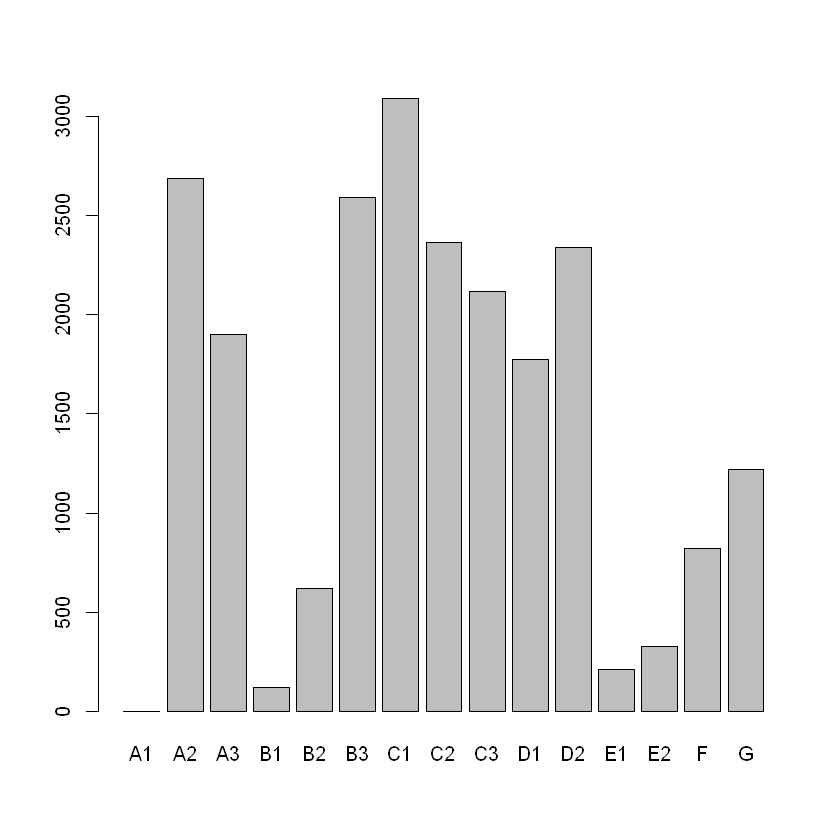

In [179]:
# summarise
summary(svm_Insul_default)
plot(pred_insul_svm)

In [180]:
# important variables 
w <- t(svm_Insul_default$coefs) %*% svm_Insul_default$SV                 # weight vectors
w <- apply(w, 2, function(v){sqrt(sum(v^2))})  # weight
w <- sort(w, decreasing = T)
print(w)

      VentilationMethodNatural           StructureTypeMasonry 
                  20679.245789                   19672.211109 
                    UValueWall                    UValueFloor 
                  15644.685260                   13181.054166 
                  UValueWindow       ThermoControledBoilerYES 
                  13140.725483                   11298.199604 
                    UValueRoof              HeatTypeMains.Gas 
                   9655.424556                    9086.785598 
        WaterHeatTypeMains.Gas                   NoOfChimneys 
                   9065.626721                    7941.859551 
           HeatTypeHeating.Oil       WaterHeatTypeHeating.Oil 
                   7332.545482                    7294.985727 
                TotalFloorArea          PrimaryEnergyLighting 
                   7191.932009                    7191.885201 
                    UValueDoor             TypeDetached.house 
                   6675.858207                    6199.

**<font color = green> b. Plot SVM features against each other to determine the type of kernel that may be required e.g. linear/radial etc </font>**

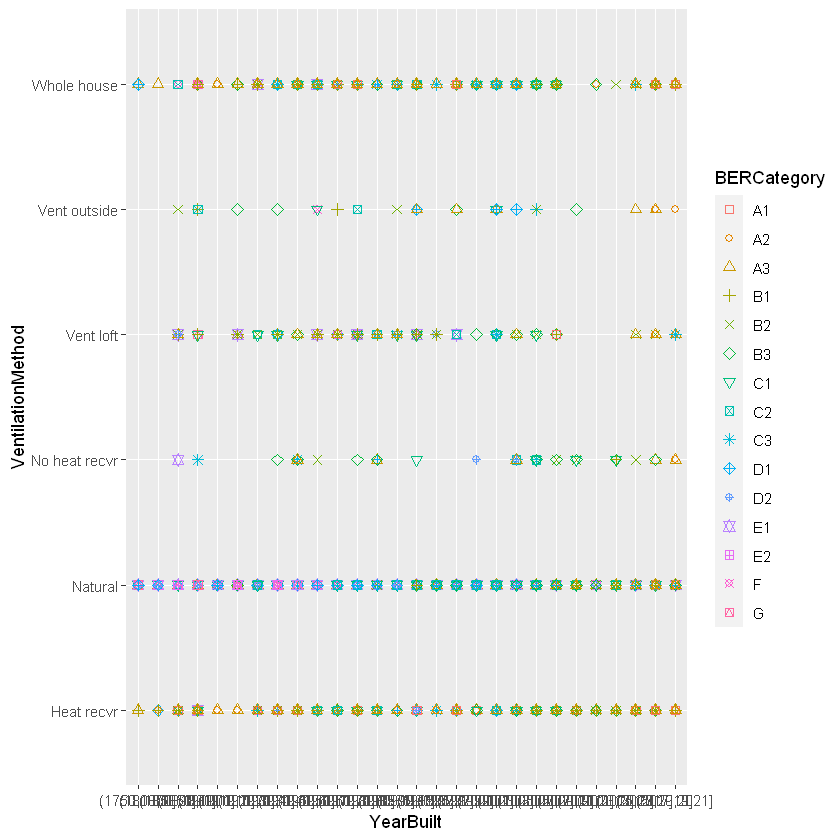

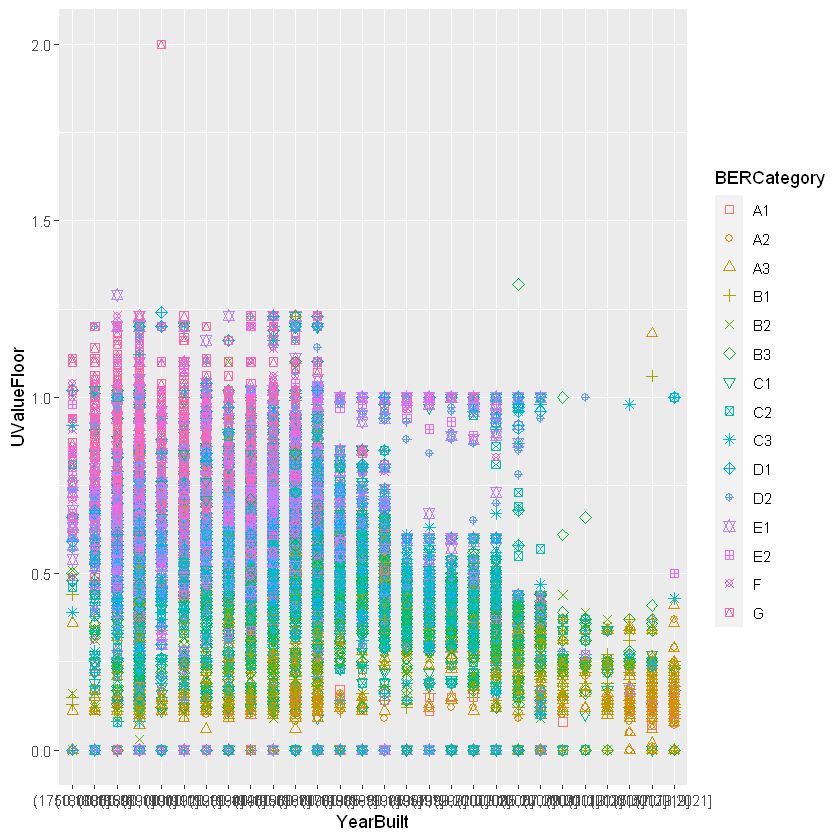

In [181]:
# plot to determine relationship 
ggplot(data = insulatorBER, aes(x = YearBuilt, y=VentilationMethod, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  scale_shape_manual(values=seq(0,14))

ggplot(data = insulatorBER, aes(x = YearBuilt, y=UValueFloor, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  scale_shape_manual(values=seq(0,14))

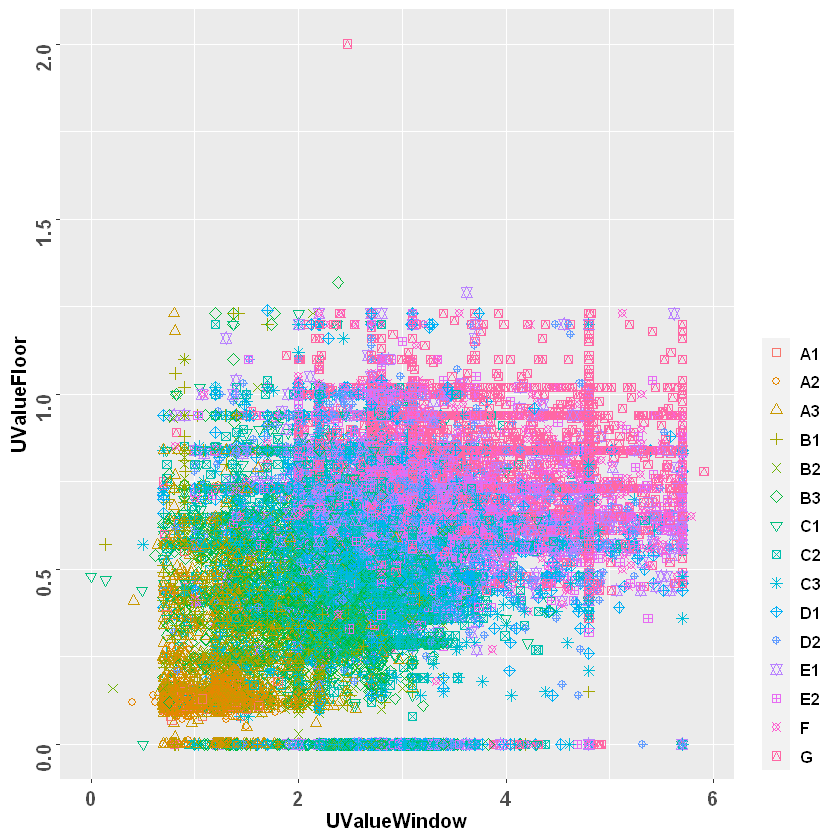

In [182]:
ggplot(data = insulatorBER, aes(x = UValueWindow, y=UValueFloor, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
    theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(face="bold",vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(face="bold",angle=90, vjust=0.5, size=12)) + 
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.7, 
                                         linetype="solid", colour ="white"))+
  scale_shape_manual(values=seq(0,14))

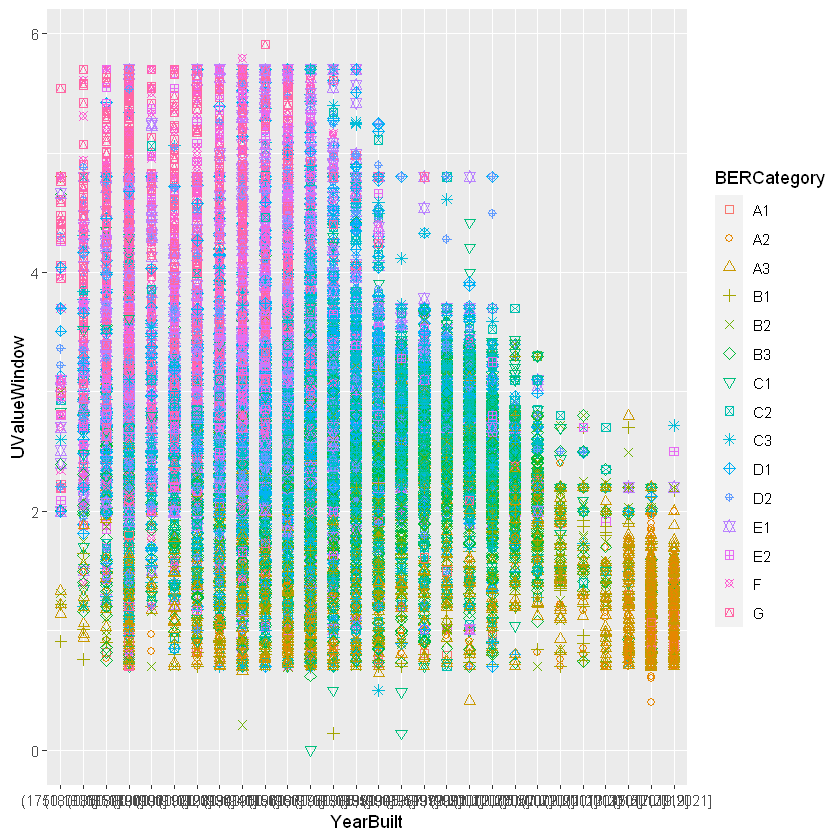

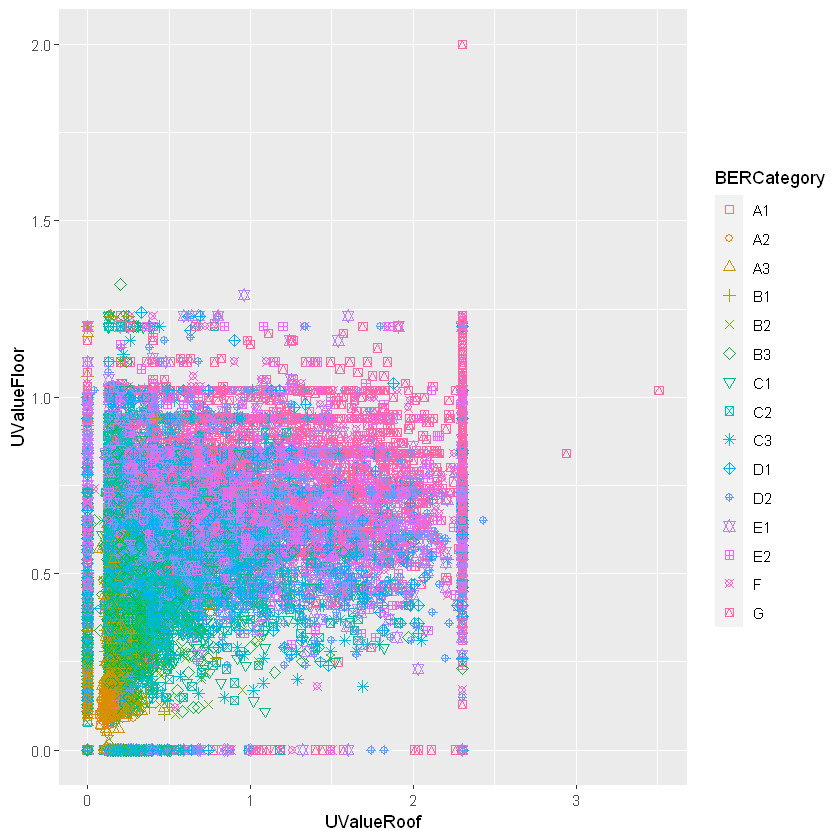

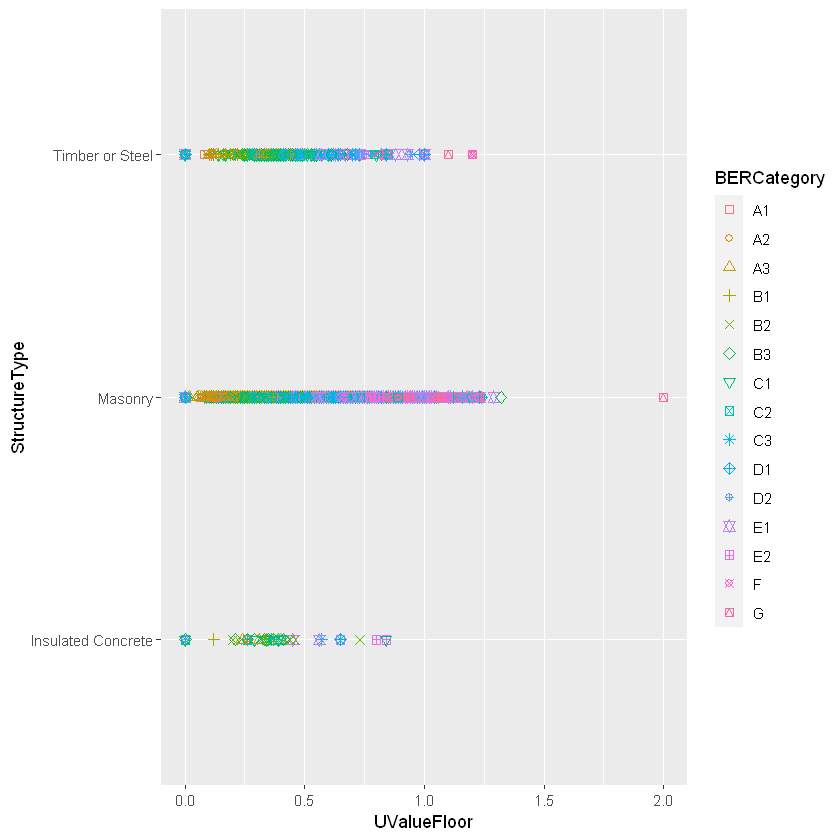

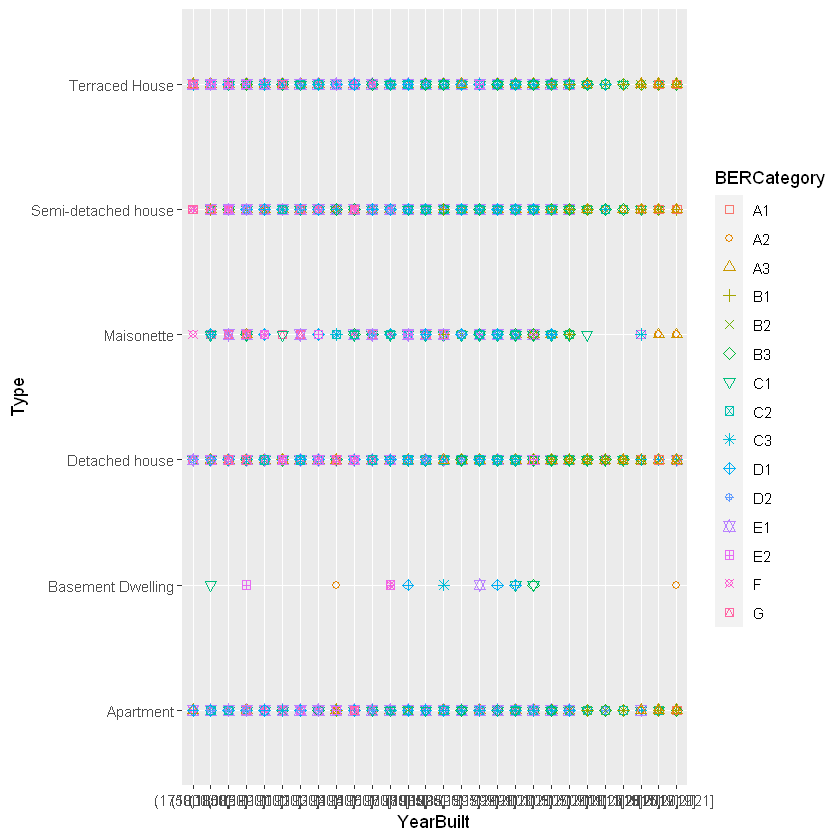

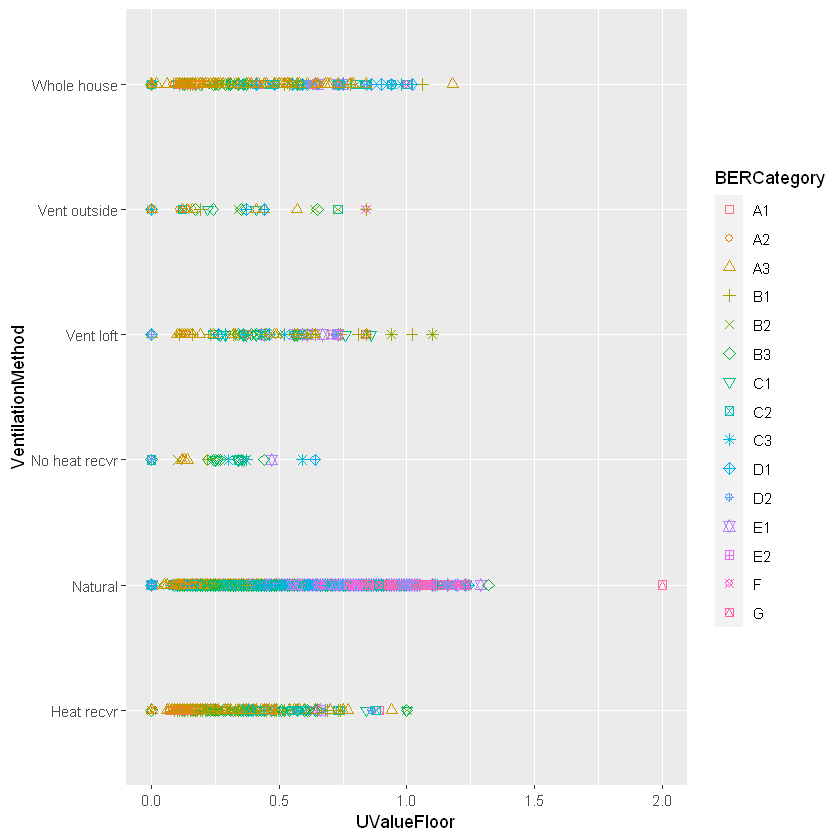

In [183]:
ggplot(data = insulatorBER, aes(x = YearBuilt, y=UValueWindow, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  scale_shape_manual(values=seq(0,14))

ggplot(data = insulatorBER, aes(x = UValueRoof, y=UValueFloor, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  scale_shape_manual(values=seq(0,14))

ggplot(data = insulatorBER, aes(x = UValueFloor, y=StructureType, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  scale_shape_manual(values=seq(0,14))

ggplot(data = insulatorBER, aes(x = YearBuilt, y=Type, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  scale_shape_manual(values=seq(0,14))

ggplot(data = insulatorBER, aes(x = UValueFloor, y=VentilationMethod, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  scale_shape_manual(values=seq(0,14))

**<font color = red> Difficult to see a clear pattern in some cases as there are so many classes, however there is evidence that a number of features are linearly related**</font>

**<font color = green> c. SVM needs numeric features so create an encoding function, apply and normalise</font>**

In [184]:
# encoding 
insul_SVM <- insulatorBER

# create encode function
encode <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}

# encode categorical
sapply(insul_SVM, is.factor)
insul_SVM$Type = encode(insul_SVM[["Type"]])
insul_SVM$HeatType = encode(insul_SVM[["HeatType"]])
insul_SVM$WaterHeatType = encode(insul_SVM[["WaterHeatType"]])
insul_SVM$SealedPorch = encode(insul_SVM[["SealedPorch"]])
insul_SVM$StructureType = encode(insul_SVM[["StructureType"]])
insul_SVM$SuspendedWoodenFloor = encode(insul_SVM[["SuspendedWoodenFloor"]])
insul_SVM$VentilationMethod = encode(insul_SVM[["VentilationMethod"]])
insul_SVM$ThermoControledBoiler = encode(insul_SVM[["ThermoControledBoiler"]])
insul_SVM$YearBuilt = encode(insul_SVM[["YearBuilt"]])

# scaling of numeric
insul_SVM[, -c(3)] <- scale(insul_SVM[, -c(3)])
str(insul_SVM)

Type                 YearBuilt               BERCategory 
                     TRUE                      TRUE                      TRUE 
           TotalFloorArea                  WallArea                WindowArea 
                    FALSE                     FALSE                     FALSE 
                NoStoreys              UValueWindow                UValueDoor 
                    FALSE                     FALSE                     FALSE 
               UValueRoof               UValueFloor                UValueWall 
                    FALSE                     FALSE                     FALSE 
                 HeatType             WaterHeatType              NoOfChimneys 
                     TRUE                      TRUE                     FALSE 
            NoOfOpenFlues          NoOfFansAndVents               SealedPorch 
                    FALSE                     FALSE                      TRUE 
            StructureType      SuspendedWoodenFloor         VentilationMethod 
                     TRUE                      TRUE                      TRUE 
PercentageDraughtStripped        NoOfSidesSheltered   NoOilBoilerHeatingPumps 
                    FALSE                     FALSE                     FALSE 
    ThermoControledBoiler   NoGasBoilerHeatingPumps     PrimaryEnergyLighting 
                     TRUE                     FALSE                     FALSE 
 LowEnergyLightingPercent 
                    FALSE

'data.frame':	73917 obs. of  28 variables:
 $ Type                     : num  -1.204 -0.445 -0.445 0.314 -0.445 ...
 $ YearBuilt                : num  -1.52 -1.38 -1.23 -1.23 -1.09 ...
 $ BERCategory              : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ TotalFloorArea           : num  -1.14087 -0.26328 0.00873 0.457 0.53786 ...
 $ WallArea                 : num  -0.94 0.303 0.242 0.625 0.795 ...
 $ WindowArea               : num  -0.7473 0.1377 -0.16 -0.0821 0.4149 ...
 $ NoStoreys                : num  0.347 0.347 0.347 0.347 2.09 ...
 $ UValueWindow             : num  -0.908 0.576 0.191 0.802 0.802 ...
 $ UValueDoor               : num  -2.277 0.743 0.743 0.743 0.743 ...
 $ UValueRoof               : num  -0.2759 -0.0398 -0.1775 -0.0595 -0.0595 ...
 $ UValueFloor              : num  -0.367 0.932 -0.091 0.145 0.145 ...
 $ UValueWall               : num  -0.692 -0.112 -0.358 -0.2 -0.218 ...
 $ HeatType                 : num  -0.932 -0.932 -0.932 -0.932 -0.9

**<font color = green> d. Split the data into training and validation</font>**

In [185]:
# split into train and validation
dt = sort(sample(nrow(insul_SVM), nrow(insul_SVM)*.7))
# insulator - 51,759 training; 170 variables
BERTrainInsul<-insul_SVM[dt,]
BERValInsul <-insul_SVM[-dt,]
dim(BERTrainInsul)
dim(BERValInsul)

# train on a sample for computational reasons
BERTrain_SVMI_Sample <- BERTrainInsul %>% sample_frac(0.2)
str(BERTrain_SVMI_Sample)

[1] 51741    28

[1] 22176    28

'data.frame':	10348 obs. of  28 variables:
 $ Type                     : num  -0.445 0.314 -0.445 -0.445 -0.445 ...
 $ YearBuilt                : num  -0.513 -0.225 -0.225 1.074 1.074 ...
 $ BERCategory              : Factor w/ 15 levels "A1","A2","A3",..: 11 9 7 3 3 9 2 7 15 11 ...
 $ TotalFloorArea           : num  0.6595 -0.7347 0.0319 -0.1026 0.3535 ...
 $ WallArea                 : num  0.417 -0.3043 0.0535 0.0031 0.2702 ...
 $ WindowArea               : num  1.029 -0.5492 -0.0575 -0.3716 1.5711 ...
 $ NoStoreys                : num  0.347 -1.397 0.347 0.347 0.347 ...
 $ UValueWindow             : num  1.482 -0.217 0.462 -1.35 -1.135 ...
 $ UValueDoor               : num  0.623 0.623 0.743 -0.867 -0.867 ...
 $ UValueRoof               : num  2.223 -0.492 -0.276 -0.532 -0.512 ...
 $ UValueFloor              : num  0.972 0.145 -0.248 -1.114 -0.996 ...
 $ UValueWall               : num  2.382 -0.639 -0.516 -0.921 -0.798 ...
 $ HeatType                 : num  -0.9323 0.0173 0.0173 -0.

**<font color = green> e. Select the tuning parameters - Best cost =10 and for radial best gamma = 0.5 with 9787 support vectors. This is a random training sample with 10.5K observations so again it uses almost all the data points</font>**


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100   0.5

- best performance: 0.6479541 



Call:
best.tune(method = svm, train.x = BERCategory ~ ., data = BERTrain_SVMI_Sample, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100), gamma = c(0.5, 
        1, 2, 3, 4)))


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  9718

 ( 783 965 1253 743 792 482 400 347 803 947 334 1175 457 201 36 )


Number of Classes:  15 

Levels: 
 A1 A2 A3 B1 B2 B3 C1 C2 C3 D1 D2 E1 E2 F G




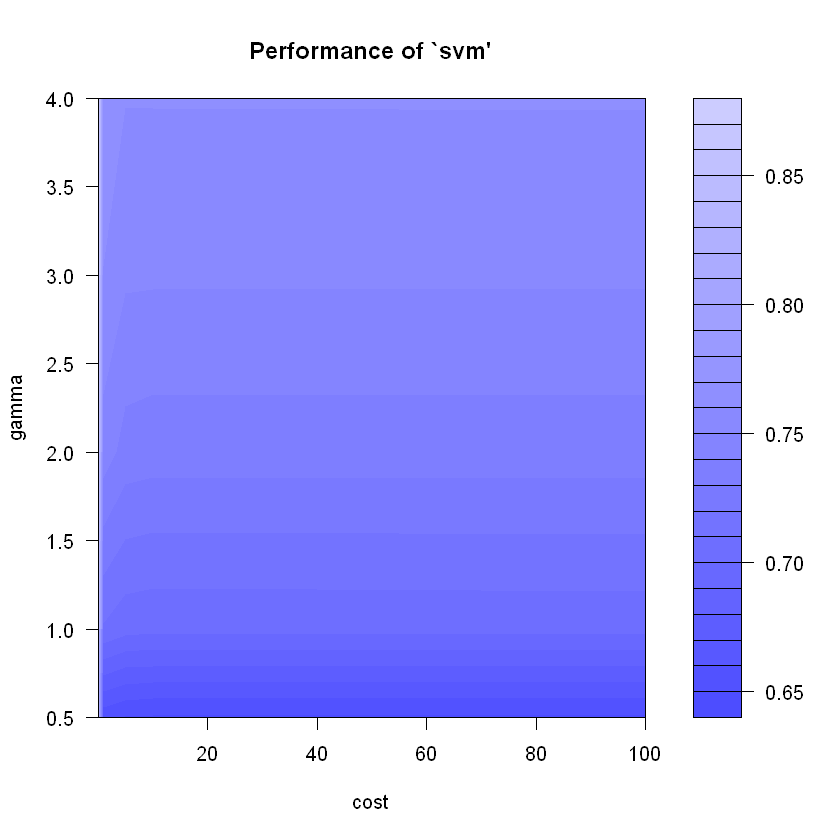

In [186]:
options(warn=-1)
tuneInsul <- tune(svm, BERCategory ~., data = BERTrain_SVMI_Sample, 
                  ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100), gamma = c(0.5,1,2,3,4)))

plot(tuneInsul)
# examine
tuneInsul
bestmodI = tuneInsul$best.model
summary(bestmodI)

options(warn=0)

 **<font color = green> f. Apply and evalaute with a radial kernel and these optimal cost and gamma tuning parameters </font>**

In [187]:
svm_insul_rad <- svm(BERCategory~., data=BERTrain_SVMI_Sample, 
                     method="C-classification", scale = FALSE, kernel="radial", 
                     gamma=0.5, cost=100)

# test radial against the validation set
predSVM_Insul_TuneR <- predict(svm_insul_rad, newdata = BERValInsul)
CM_SVM_I_Tune_R <- confusionMatrix(predSVM_Insul_TuneR, BERValInsul$BERCategory, mode = "prec_recall")
# examine
CM_SVM_I_Tune_R

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   26    9    3    0    0    0    0    0    0    0    0    0    0
        A2   15 2018  371    6    6    0    1    1    0    0    0    0    0
        A3   16  300 1238   39    9    2    0    0    1    0    0    0    0
        B1    0    2   20   90   25   10    0    0    0    0    0    0    0
        B2    0    0    7   40  203  114   48   14    3    1    0    0    0
        B3    0    2   18   72  298  719  421  182   55   13    7    4    0
        C1   14  212  333  206  490  988 1215  825  529  415  399  321  283
        C2    0    1    4    8   57  221  549  739  514  259  135   37   14
        C3    0    0    2    8   18   79  245  388  551  401  244   67   32
        D1    0    0    1    2    0   10   44  154  251  342  239   92   37
        D2    0    0    0    1    2    6   30   75  171  322  452  254  198
        E1    0    0    0    0    0

In [188]:
print(paste0("Macro Recall:", mean(CM_SVM_I_Tune_R$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_SVM_I_Tune_R$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_SVM_I_Tune_R$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_SVM_I_Tune_R$byClass[, "Specificity"]))) 

[1] "Macro Recall:0.293775288776971"
[1] "Macro Precision: 0.448295921621591"
[1] "Macro F1 Score: 0.322800497701094"
[1] "Macro Specificity: 0.952481946138441"


 **<font color = red> Radial kernel produces a much lower accuracy at 36%, and F1-score of 32%, with 45% Precision and 29% Recall. This is not the appropriate kernel**</font>

**<font color = green> g. Apply and evalaute with a linear kernel and tuned parameters </font>**

In [218]:
svm_insul_lin <- svm(BERCategory~., data=BERTrain_SVMI_Sample, 
                     method="C-classification", scale = FALSE, kernel="linear", probability=TRUE, 
                     cost=100)

# test linear against the validation set
predSVM_Insul_TuneL <- predict(svm_insul_lin, newdata = BERValInsul)
CM_SVM_I_Tune_L <- confusionMatrix(predSVM_Insul_TuneL, BERValInsul$BERCategory,  mode = "prec_recall")
CM_SVM_I_Tune_L

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1    0    0    1    0    0    0    0    0    0    0    0    0    0
        A2   57 2047  605    9    3    1    1    0    0    0    0    0    0
        A3   11  485 1273  154   86   19   10    6    0    0    0    0    0
        B1    3   10   59   54   37   19    7    3    3    1    0    1    0
        B2    0    1   32  106  227   93   24    6    3    3    0    0    0
        B3    0    1   13  116  580 1069  486  144   28    7    0    0    0
        C1    0    0    6   17  116  748 1168  657  233   50    8    2    0
        C2    0    0    8    6   36  139  653  981  656  311   83    7    0
        C3    0    0    0    5    9   43  145  392  620  401  205   38    6
        D1    0    0    0    4    9    6   35  140  352  484  328   72   24
        D2    0    0    0    1    5   12   25   48  196  511  830  570  342
        E1    0    0    0    0    0

In [219]:
print(paste("Macro Recall:", mean(CM_SVM_I_Tune_L$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_SVM_I_Tune_L$byClass[, "Precision"], na.rm = TRUE )))
print(paste("Macro F1 Score:", mean(CM_SVM_I_Tune_L$byClass[, "F1"], na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_SVM_I_Tune_L$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.370001795058481"
[1] "Macro Precision: 0.390993911855893"
[1] "Macro F1 Score: 0.390999794232514"
[1] "Macro Specificity: 0.959806687593369"


 **<font color = red> Tuned Linear is similar to the default with an Accuracy of 45%, F1-score of 39%, Precision 40% and Recall of 37%. some slight improvement although with no A1 predicted this is not a good model.**</font>

 **<font color = green> h. Apply and evalaute with balanced data and a linear kernel </font>**

In [220]:
x <- as.data.frame(BERTrainInsul %>% select(-BERCategory))
y <- as.factor(BERTrainInsul$BERCategory)
# downSample function
balancedBERTrain <- downSample(x, y, yname = "BERCategory")
table(balancedBERTrain$BERCategory)
str(balancedBERTrain)

# run
svm_insul_lin_bal <- svm(BERCategory~., data=balancedBERTrain, 
                         method="C-classification", scale = FALSE, kernel="linear", probability=TRUE,
                         cost=100)

# test against the validation set
predSVM_Insul_Tune_Bal <- predict(svm_insul_lin_bal, newdata = BERValInsul)
CM_SVM_I_Tune_Bal_L <- confusionMatrix(predSVM_Insul_Tune_Bal, BERValInsul$BERCategory,  mode = "prec_recall")
# examine
CM_SVM_I_Tune_Bal_L


 A1  A2  A3  B1  B2  B3  C1  C2  C3  D1  D2  E1  E2   F   G 
150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 

'data.frame':	2250 obs. of  28 variables:
 $ Type                     : num  -1.204 0.314 0.314 0.314 -1.204 ...
 $ YearBuilt                : num  1.795 1.795 -1.09 1.362 0.208 ...
 $ TotalFloorArea           : num  0.00653 1.41849 3.98614 2.02813 -0.61394 ...
 $ WallArea                 : num  -0.982 1.863 3.524 2.081 -0.855 ...
 $ WindowArea               : num  -0.618 1.412 2.685 0.795 -0.58 ...
 $ NoStoreys                : num  2.09 0.347 0.347 0.347 0.347 ...
 $ UValueWindow             : num  -1.724 -1.724 -1.814 -0.217 -1.123 ...
 $ UValueDoor               : num  -0.8674 -1.6728 -0.0419 0.7434 0.7434 ...
 $ UValueRoof               : num  -0.492 -0.414 -0.551 -0.355 -0.492 ...
 $ UValueFloor              : num  -1.075 -1.114 -0.996 -0.248 0.303 ...
 $ UValueWall               : num  -0.833 -0.885 -0.85 -0.516 -0.622 ...
 $ HeatType                 : num  0.967 0.967 0.967 0.967 0.967 ...
 $ WaterHeatType            : num  0.996 0.996 0.996 0.996 0.996 ...
 $ NoOfChimneys     

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   51  497  258   27   16    7    6    2    1    1    0    0    0
        A2   12 1544  431    9    3    1    0    1    0    0    0    0    0
        A3    3  468 1016   61   28   14    5    5    5    1    0    0    0
        B1    5   34  236  204  216  142   42   21   11    6    2    1    0
        B2    0    0   40  110  497  699  267   80   22   10    2    0    1
        B3    0    1    9   41  240  648  573  235   64   17    3    1    0
        C1    0    0    4    8   54  446  924  673  293   80   13    1    0
        C2    0    0    2    4   21  103  449  617  438  216   54    9    1
        C3    0    0    0    3   21   61  197  447  533  376  192   28    5
        D1    0    0    1    5    8   20   65  241  507  557  426  100   30
        D2    0    0    0    0    4    6   15   44  155  349  421  251   96
        E1    0    0    0    0    0

In [221]:
print(paste("Macro Recall:", mean(CM_SVM_I_Tune_Bal_L$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_SVM_I_Tune_Bal_L$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_SVM_I_Tune_Bal_L$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_SVM_I_Tune_Bal_L$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.404907969892242"
[1] "Macro Precision: 0.36725416855242"
[1] "Macro F1 Score: 0.361942255480147"
[1] "Macro Specificity: 0.9555260424076"


In [242]:
svm_insul_lin_bal


Call:
svm(formula = BERCategory ~ ., data = balancedBERTrain, method = "C-classification", 
    kernel = "linear", probability = TRUE, cost = 100, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  100 

Number of Support Vectors:  2037


**<font color = red> Balanced data with linear is not better with an Accuracy of 39%, F1-score of 36%, precision of 37% and Recall of 40%, but it does predict all classes although A1 precision is less than 1%**</font>

**<font color = green> i. Calculate AUC and plot Precision-Recall for the best model (linear) </font>**

In [222]:
options(warn=-1)
svm_predI <- predict(svm_insul_lin_bal, BERValInsul, probability=TRUE) 
svm_predI <- data.frame(attr(svm_predI, "probabilities"))
colnames(svm_predI) <- paste(colnames(svm_predI), "pred_SVM", sep="_")

true_label <- dummies::dummy(BERValInsul$BERCategory, sep = ".")
true_label <- data.frame(true_label)
colnames(true_label) <- gsub(".*?\\.", "", colnames(true_label))
colnames(true_label) <- paste(colnames(true_label), "true", sep = "_")
final_df <- cbind(true_label, svm_predI)

roc_res <- multi_roc(final_df, force_diag=T)
pr_res <- multi_pr(final_df, force_diag=T)

plot_roc_df <- plot_roc_data(roc_res)
plot_pr_df <- plot_pr_data(pr_res)

plot_roc_df <- plot_roc_df[plot_roc_df$Group!="Macro" & plot_roc_df$Group!="Micro", ]
plot_pr_df <- plot_pr_df[plot_pr_df$Group!="Macro" & plot_pr_df$Group!="Micro", ]

options(warn=0)

**<font color = red> The AUC is a very poor 0.36.**</font>

In [223]:
# Precision - Recall AUC 
pr_res$AUC

$SVM
$SVM$A1
[1] 0.06133681

$SVM$A2
[1] 0.7866609

$SVM$A3
[1] 0.5775579

$SVM$B1
[1] 0.1879396

$SVM$B2
[1] 0.3026887

$SVM$B3
[1] 0.3473915

$SVM$C1
[1] 0.3572709

$SVM$C2
[1] 0.3040209

$SVM$C3
[1] 0.2618281

$SVM$D1
[1] 0.2573891

$SVM$D2
[1] 0.2796878

$SVM$E1
[1] 0.2251718

$SVM$E2
[1] 0.2053153

$SVM$F
[1] 0.3135643

$SVM$G
[1] 0.8657685

$SVM$macro
[1] 0.3555058

$SVM$micro
[1] 0.4130005

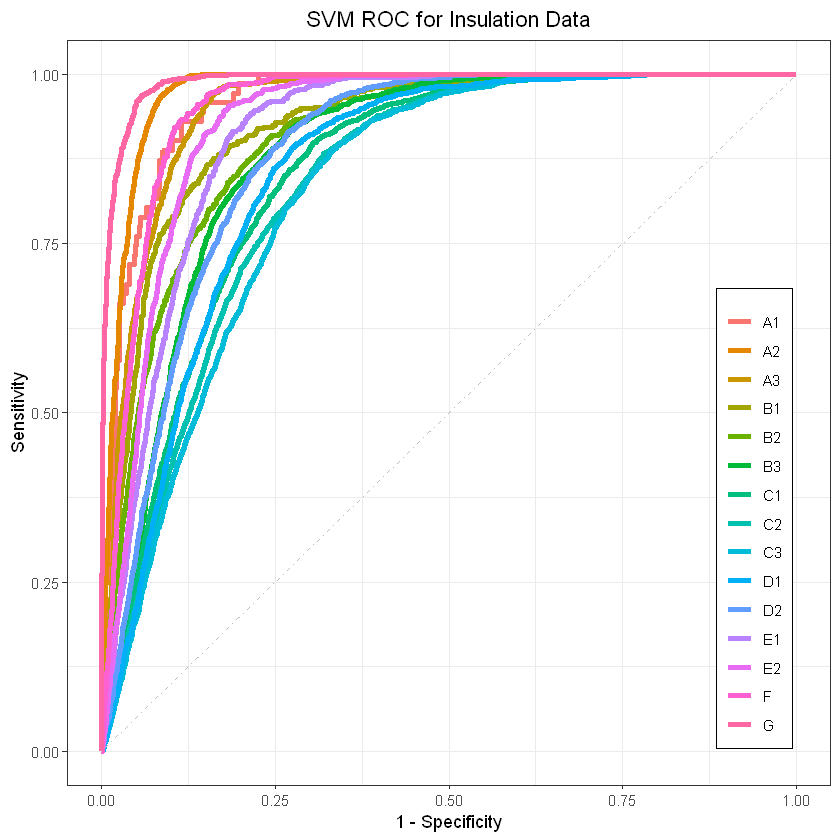

In [224]:
ggplot(plot_roc_df, aes(x = 1-Specificity, y=Sensitivity)) +
  geom_path(aes(color = Group), size=1.5) +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1), 
               colour='grey', linetype = 'dotdash') +
  ggtitle("SVM ROC for Insulation Data") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5), 
        legend.justification=c(1, 0), legend.position=c(.95, .05),
        legend.title=element_blank(), 
        legend.background = element_rect(fill=NULL, size=0.5, 
                                         linetype="solid", colour ="black"))

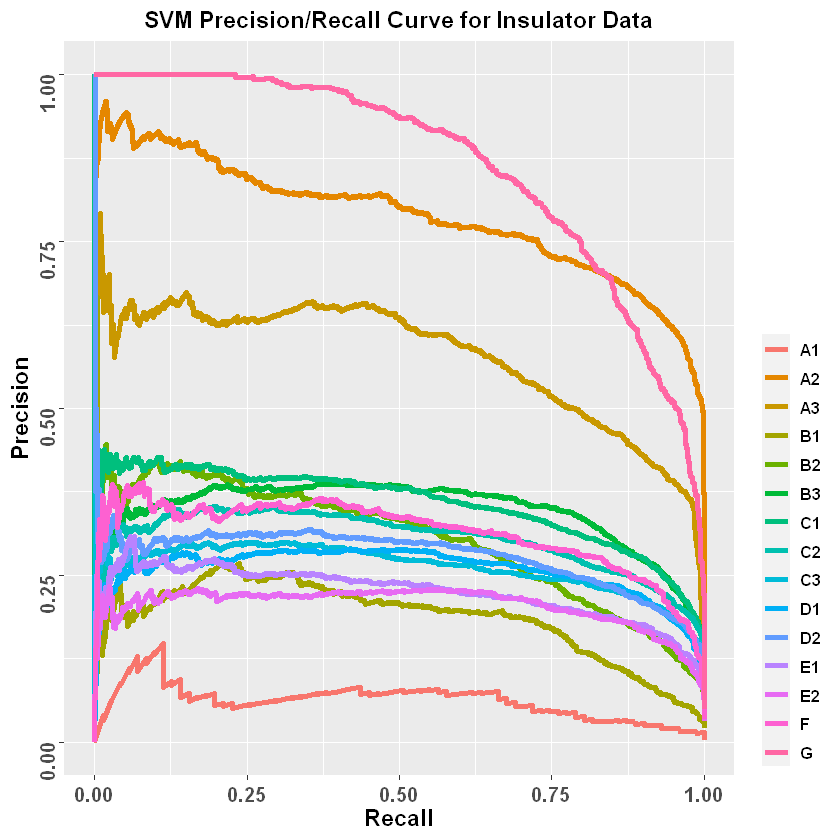

In [225]:
ggplot(plot_pr_df, aes(x=Recall, y=Precision)) + 
  geom_path(aes(color = Group), size=1.5) + 
  ggtitle("SVM Precision/Recall Curve for Insulator Data") +
   theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))

***
**<font color = blue> 15. Support Vector Machine  - Heating Data**</font>

**<font color = green> a. Start with default, find important features and tune </font>**

In [197]:
svm_heat_default <- svm(BERCategory ~., data = BERTrainHeat)
# predict using the svm model and examine the confusion matrix 
pred_heat_svm <- predict(svm_heat_default, BERValHeat[,-3])
CM_SVM_H_Def <- confusionMatrix(pred_heat_svm, BERValHeat$BERCategory, mode = "prec_recall")
#examine
CM_SVM_H_Def

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1    0    0    0    0    0    0    0    0    0    0    0    0    0
        A2   54 2307  277    0    0    0    0    1    0    0    0    0    0
        A3    2  233 1538   86    7    4    0    0    0    0    0    0    0
        B1    0    0   28  210   36    2    0    0    0    0    0    0    0
        B2    0    0   11  142  743   34    3    1    1    0    0    0    0
        B3    0    0    0    3  255 1892  128    1    0    0    0    0    0
        C1    0    0    0    1    8  241 2303  182    1    0    0    0    0
        C2    0    0    0    0    0    4  179 2071  192    1    0    0    0
        C3    0    0    0    0    0    0    2  143 1752  233    1    0    0
        D1    0    0    0    0    0    0    0    6  112 1505  196    1    0
        D2    0    0    0    0    0    0    0    0   20   87 1374  353   51
        E1    0    0    0    0    0

In [198]:
print(paste("Macro Recall:", mean(CM_SVM_H_Def$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_SVM_H_Def$byClass[, "Precision"],  na.rm = TRUE)))
print(paste("Macro F1 Score:", mean(CM_SVM_H_Def$byClass[, "F1"],  na.rm = TRUE))) 
print(paste("Macro Specificity:", mean(CM_SVM_H_Def$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.718064916870663"
[1] "Macro Precision: 0.79957497312494"
[1] "Macro F1 Score: 0.780163414901053"
[1] "Macro Specificity: 0.986808674719575"


**<font color = red> Default SVM for heating shows a good 82% accuracy, F1-score of 78%, with a good Precision of 80% and a Recall of 72%. The main issue is that it does not predict any A1 ratings. It uses 43K support vectors**</font>


Call:
svm(formula = BERCategory ~ ., data = BERTrainHeat)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  43252

 ( 5454 4701 4264 5361 3450 4125 2254 2059 1028 1676 1093 3308 1592 2722 165 )


Number of Classes:  15 

Levels: 
 A1 A2 A3 B1 B2 B3 C1 C2 C3 D1 D2 E1 E2 F G




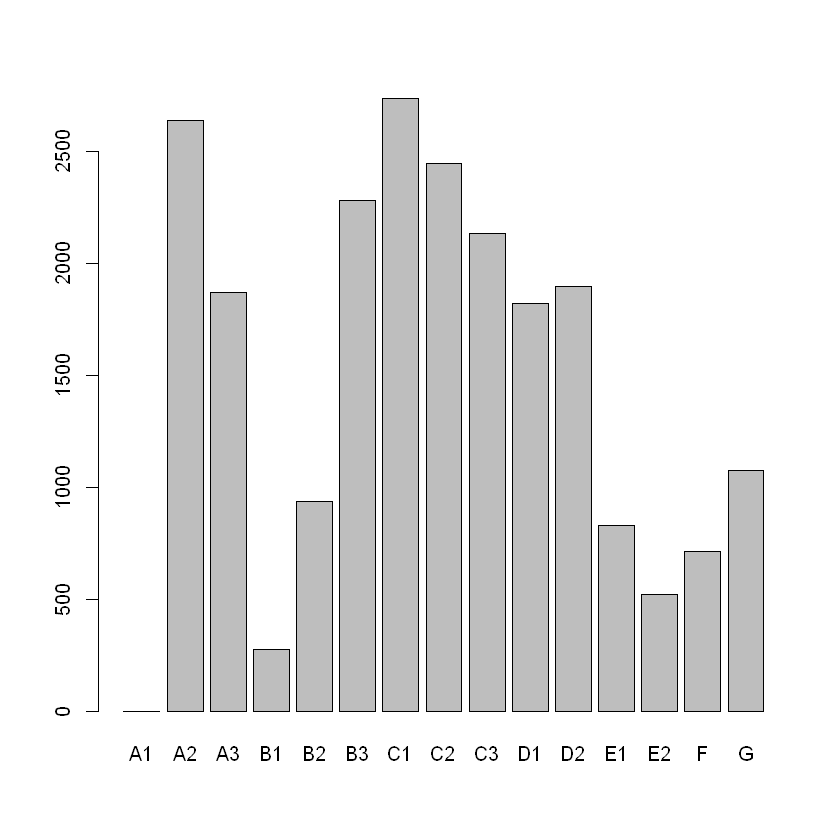

In [199]:
#summarise
summary(svm_heat_default)
plot(pred_heat_svm)

In [200]:
# important variables 
w <- t(svm_heat_default$coefs) %*% svm_heat_default$SV                 # weight vectors
w <- apply(w, 2, function(v){sqrt(sum(v^2))})  # weight
w <- sort(w, decreasing = T)
print(w)

       VentilationMethodNatural            StructureTypeMasonry 
                   13228.190829                    12646.737828 
             DistributionLosses                 WHMainSystemEff 
                    8258.107866                     8188.742343 
       ThermoControledBoilerYES          PrimaryEnergyPumpsFans 
                    7596.297005                     7200.820891 
          PrimaryEnergyLighting                  TotalFloorArea 
                    7157.254528                     7154.546838 
         PrimaryEnergyMainSpace     PrimaryEnergySecondarySpace 
                    6929.387844                     6851.941528 
              CO2SecondarySpace        DeliveredEnergyMainSpace 
                    6706.341579                     6628.632646 
  DeliveredEnergySecondarySpace           NoCentralHeatingPumps 
                    6559.075538                     6374.952145 
              HeatTypeMains.Gas          WaterHeatTypeMains.Gas 
                    6357.

**<font color = green> b. Plot SVM features against each other to determine the type of kernel that may be required e.g. linear/radial etc </font>**

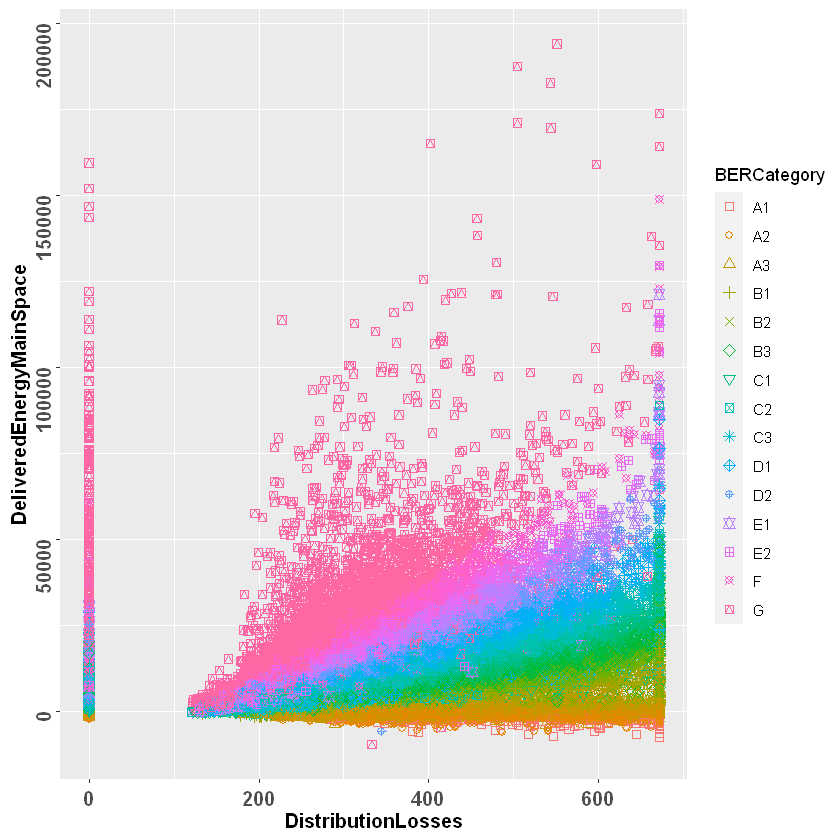

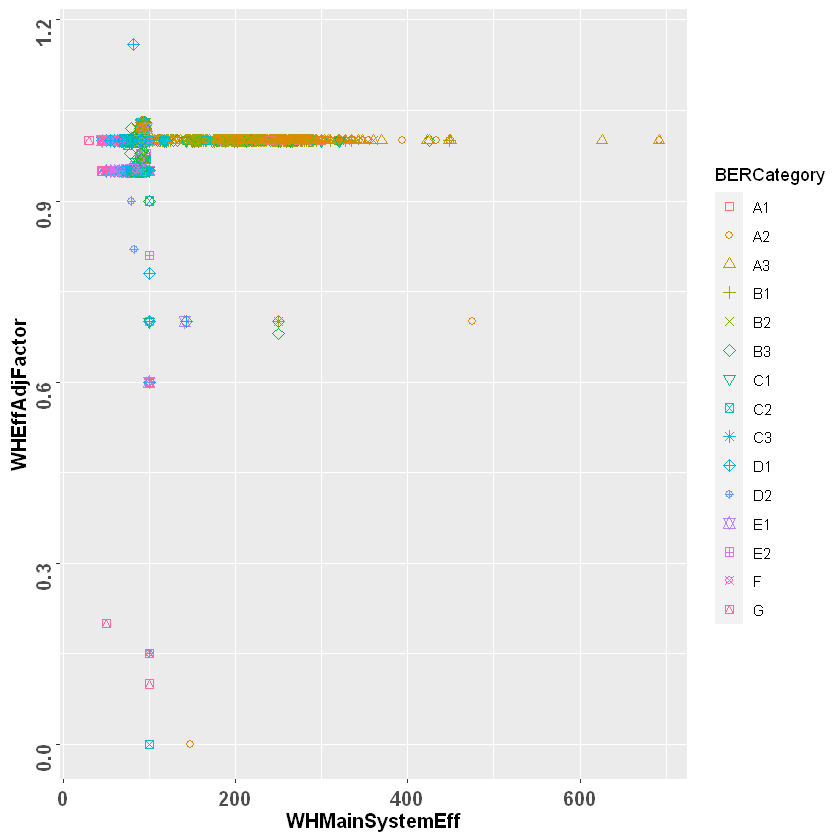

In [201]:
# tuning - plot some of the heat relationships to understand the relationships
ggplot(data = heatingBER, aes(x = DistributionLosses, y=DeliveredEnergyMainSpace, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(face="bold",vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(face="bold",angle=90, vjust=0.5, size=12)) + 
  scale_shape_manual(values=seq(0,14))


ggplot(data = heatingBER, aes(x = WHMainSystemEff, y=WHEffAdjFactor, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
  theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(face="bold",vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(face="bold",angle=90, vjust=0.5, size=12)) + 
  scale_shape_manual(values=seq(0,14))

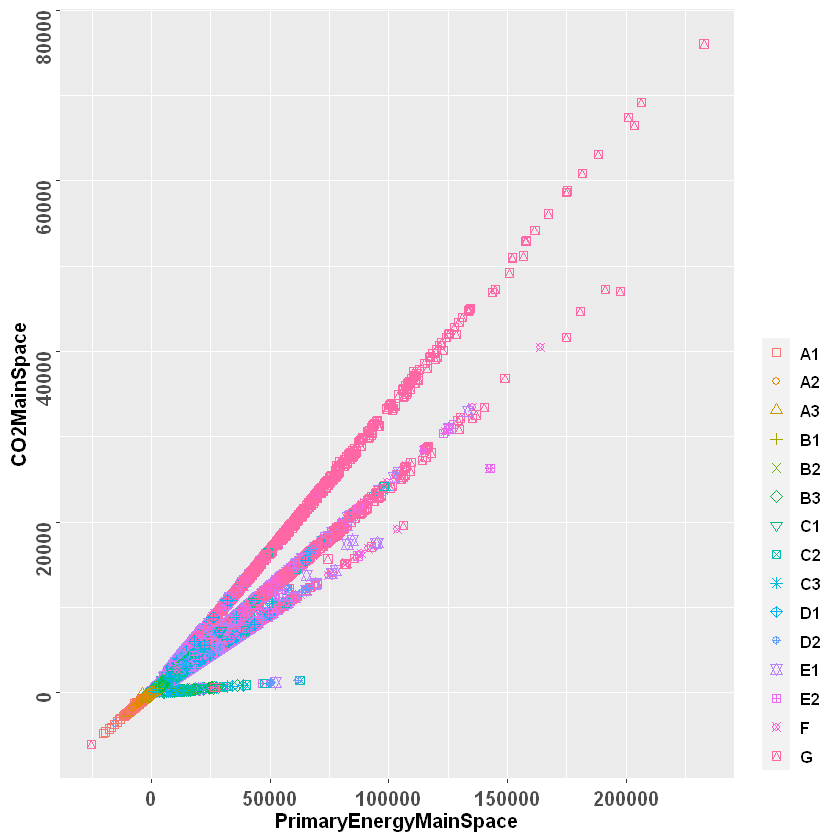

In [202]:
ggplot(data = heatingBER, aes(x = PrimaryEnergyMainSpace, y=CO2MainSpace, color = BERCategory, shape = BERCategory)) +
  geom_point(size = 2) +
    theme(axis.title.x = element_text(face="bold", size=12),
        axis.text.x  = element_text(face="bold",vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=12),
        axis.text.y  = element_text(face="bold",angle=90, vjust=0.5, size=12)) + 
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.7, 
                                         linetype="solid", colour ="white"))+
  scale_shape_manual(values=seq(0,14))


**<font color = red> Difficult to see a clear pattern in some cases as there are so many classifiers, however there are some features that are linear related**</font>

**<font color = green> c. SVM needs numeric features so apply one hot encoding and normalise</font>**

In [203]:
# encoding 
heat_SVM <- heatingBER

# create encode funtion
encode <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}

# encode categorical
sapply(heatingBER, is.factor)
heat_SVM$Type = encode(heat_SVM[["Type"]])
heat_SVM$HeatType = encode(heat_SVM[["HeatType"]])
heat_SVM$WaterHeatType = encode(heat_SVM[["WaterHeatType"]])
heat_SVM$SealedPorch = encode(heat_SVM[["SealedPorch"]])
heat_SVM$StructureType = encode(heat_SVM[["StructureType"]])
heat_SVM$SuspendedWoodenFloor = encode(heat_SVM[["SuspendedWoodenFloor"]])
heat_SVM$VentilationMethod = encode(heat_SVM[["VentilationMethod"]])
heat_SVM$ThermoControledBoiler = encode(heat_SVM[["ThermoControledBoiler"]])
heat_SVM$OilBoilerThermo = encode(heat_SVM[["OilBoilerThermo"]])
heat_SVM$ThermalMassCategory = encode(heat_SVM[["ThermalMassCategory"]])
heat_SVM$YearBuilt = encode(heat_SVM[["YearBuilt"]])

Type                       YearBuilt 
                           TRUE                            TRUE 
                    BERCategory                  TotalFloorArea 
                           TRUE                           FALSE 
                       WallArea                      WindowArea 
                          FALSE                           FALSE 
                      NoStoreys                        HeatType 
                          FALSE                            TRUE 
                  WaterHeatType                    NoOfChimneys 
                           TRUE                           FALSE 
                  NoOfOpenFlues                NoOfFansAndVents 
                          FALSE                           FALSE 
                    SealedPorch                   StructureType 
                           TRUE                            TRUE 
           SuspendedWoodenFloor               VentilationMethod 
                           TRUE                            TRUE 
      PercentageDraughtStripped              NoOfSidesSheltered 
                          FALSE                           FALSE 
        NoOilBoilerHeatingPumps           ThermoControledBoiler 
                          FALSE                            TRUE 
        NoGasBoilerHeatingPumps           PrimaryEnergyLighting 
                          FALSE                           FALSE 
       LowEnergyLightingPercent              DistributionLosses 
                          FALSE                           FALSE 
                WHMainSystemEff                  WHEffAdjFactor 
                          FALSE                           FALSE 
            ThermalMassCategory          PrimaryEnergyPumpsFans 
                           TRUE                           FALSE 
         PrimaryEnergyMainWater PrimaryEnergySupplementaryWater 
                          FALSE                           FALSE 
       DeliveredEnergyMainSpace   DeliveredEnergySecondarySpace 
                          FALSE                           FALSE 
         PrimaryEnergyMainSpace     PrimaryEnergySecondarySpace 
                          FALSE                           FALSE 
                   CO2MainSpace               CO2SecondarySpace 
                          FALSE                           FALSE 
          NoCentralHeatingPumps                 OilBoilerThermo 
                          FALSE                            TRUE

In [204]:
# scaling of numeric
heat_SVM[, -c(3)] <- scale(heat_SVM[, -c(3)])
str(heat_SVM)

'data.frame':	73917 obs. of  38 variables:
 $ Type                           : num  -1.204 -0.445 -0.445 0.314 -0.445 ...
 $ YearBuilt                      : num  -1.52 -1.38 -1.23 -1.23 -1.09 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 6 11 7 7 7 7 9 6 12 9 ...
 $ TotalFloorArea                 : num  -1.14087 -0.26328 0.00873 0.457 0.53786 ...
 $ WallArea                       : num  -0.94 0.303 0.242 0.625 0.795 ...
 $ WindowArea                     : num  -0.7473 0.1377 -0.16 -0.0821 0.4149 ...
 $ NoStoreys                      : num  0.347 0.347 0.347 0.347 2.09 ...
 $ HeatType                       : num  -0.932 -0.932 -0.932 -0.932 -0.932 ...
 $ WaterHeatType                  : num  -0.951 -0.951 -0.951 -0.951 -0.951 ...
 $ NoOfChimneys                   : num  -0.671 3.484 -0.671 -0.671 0.714 ...
 $ NoOfOpenFlues                  : num  -0.626 1.024 1.024 -0.626 -0.626 ...
 $ NoOfFansAndVents               : num  1.202 0.711 -0.269 0.711 -0.26

**<font color = green> d. Split the data into training and validation</font>**

In [205]:
# split into train and validation
dt = sort(sample(nrow(heat_SVM), nrow(heat_SVM)*.7))
# insulator - 51,759 training; 170 variables
BERTrainHeat<-heat_SVM[dt,]
BERValHeat <-heat_SVM[-dt,]
dim(BERTrainHeat)
dim(BERValHeat)

# train on a sample for computational reasons
BERTrain_SVMH_Sample <- BERTrainHeat %>% sample_frac(0.2)
str(BERTrain_SVMH_Sample)

[1] 51741    38

[1] 22176    38

'data.frame':	10348 obs. of  38 variables:
 $ Type                           : num  0.314 -0.445 0.314 -1.204 -1.204 ...
 $ YearBuilt                      : num  -0.802 -1.234 -1.234 0.785 1.795 ...
 $ BERCategory                    : Factor w/ 15 levels "A1","A2","A3",..: 13 3 6 7 2 7 15 2 2 7 ...
 $ TotalFloorArea                 : num  -0.577 -0.28 2.349 -0.93 -0.439 ...
 $ WallArea                       : num  -0.0316 0.272 1.2616 -1.0039 -0.8233 ...
 $ WindowArea                     : num  -0.538 -0.448 1.095 -0.806 -0.446 ...
 $ NoStoreys                      : num  -1.397 2.09 0.347 0.347 0.347 ...
 $ HeatType                       : num  0.0173 0.9668 0.0173 -0.9323 0.9668 ...
 $ WaterHeatType                  : num  0.0222 0.9957 0.0222 -0.9512 0.9957 ...
 $ NoOfChimneys                   : num  0.714 -0.671 -0.671 0.714 -0.671 ...
 $ NoOfOpenFlues                  : num  -0.626 1.024 1.024 -0.626 -0.626 ...
 $ NoOfFansAndVents               : num  -0.269 -0.76 -0.76 -0.269 0.

**<font color = green> e. Find the best tuning parameters - cost =100 and gamma = 0.5 (radial) from 9860 support vectors</font>**

In [206]:
options(warn=-1)
tuneHeat <- tune(svm, BERCategory ~., data = BERTrain_SVMH_Sample,
                 ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100), gamma = c(0.5,1,2,3,4)))

# examine
tuneHeat
bestmodH = tuneHeat$best.model
summary(bestmodH)

options(warn=0)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100   0.5

- best performance: 0.6398372 



Call:
best.tune(method = svm, train.x = BERCategory ~ ., data = BERTrain_SVMH_Sample, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100), gamma = c(0.5, 
        1, 2, 3, 4)))


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  9840

 ( 353 743 949 1204 906 539 712 489 363 204 839 431 1131 943 34 )


Number of Classes:  15 

Levels: 
 A1 A2 A3 B1 B2 B3 C1 C2 C3 D1 D2 E1 E2 F G




 **<font color = green> f. Apply and evalaute with a radial kernel </font>**

In [207]:
svm_heat_rad <- svm(BERCategory~., data=BERTrain_SVMH_Sample, 
                    method="C-classification", scale = FALSE, kernel="radial", 
                    gamma=0.5, cost=100)

# test radial against the validation set
predSVM_Heat_TuneR <- predict(svm_heat_rad, newdata = BERValHeat)
CM_SVM_H_Tune_R <- confusionMatrix(predSVM_Heat_TuneR, BERValHeat$BERCategory, mode = "prec_recall")
#examine
CM_SVM_H_Tune_R

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   19    3    0    0    0    0    0    0    0    0    0    0    0
        A2    5 1916  228    6    0    0    0    0    0    0    0    0    0
        A3    0  225 1219   31   16    6    1    1    0    0    0    0    0
        B1    0    0   19   69   24    1    1    0    0    0    0    0    0
        B2    0    0    1   32  176   94   19    2    2    0    0    1    0
        B3    0    2   15   38  289  669  349   87   36    9    2    0    1
        C1    2   29   93  112  333  927 1432  797  384  197   89   62   27
        C2   23  337  342  144  244  388  756 1172  858  678  668  425  404
        C3    0    0    0    5    5   25   96  305  535  356  146   36   16
        D1    0    0    0    0    0    4   27   82  248  412  282  114   47
        D2    0    0    0    0    0    1    6   21   46  172  308  152   73
        E1    0    0    0    0    0

In [208]:
print(paste("Macro Recall:", mean(CM_SVM_H_Tune_R$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_SVM_H_Tune_R$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_SVM_H_Tune_R$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_SVM_H_Tune_R$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.292399691606028"
[1] "Macro Precision: 0.497049946335378"
[1] "Macro F1 Score: 0.324314704313885"
[1] "Macro Specificity: 0.952937850023551"


 **<font color = red> Radial produces a much lower accuracy at 37% and F1-score of 32%, so this is not the appropriate kernel for this dataset either**</font>

**<font color = green> g. Apply and evalaute with a tuned linear kernel </font>**

In [209]:
svm_heat_lin <- svm(BERCategory~., data=BERTrain_SVMH_Sample, probability=TRUE,
                    method="C-classification", scale = FALSE, kernel="linear", 
                    cost=100)

# evaluate linear
predSVM_Heat_TuneL <- predict(svm_heat_lin, newdata = BERValHeat)
CM_SVM_H_Tune_L <- confusionMatrix(predSVM_Heat_TuneL, BERValHeat$BERCategory,  mode = "prec_recall")
# examine
CM_SVM_H_Tune_L

Confusion Matrix and Statistics

          Reference
Prediction   A1   A2   A3   B1   B2   B3   C1   C2   C3   D1   D2   E1   E2
        A1   41    3    0    0    0    0    0    0    0    0    0    0    0
        A2    8 2464   21    0    0    0    0    0    0    0    0    0    0
        A3    0   44 1884   32    1    0    0    0    0    0    0    0    0
        B1    0    0   12  378   28    1    0    0    0    0    0    0    0
        B2    0    0    0   27 1043   23    0    0    0    0    0    0    0
        B3    0    1    0    0   15 2062   39    0    0    0    0    0    0
        C1    0    0    0    0    0   29 2626   33    2    0    0    0    0
        C2    0    0    0    0    0    0   22 2415   27    2    0    0    0
        C3    0    0    0    0    0    0    0   20 2060   43    0    0    0
        D1    0    0    0    0    0    0    0    3   22 1766   10    1    0
        D2    0    0    0    0    0    0    0    0    2   32 1548   28    0
        E1    0    0    0    0    0

In [210]:
print(paste("Macro Recall:", mean(CM_SVM_H_Tune_L$byClass[, "Recall"])))
print(paste("Macro Precision:", mean(CM_SVM_H_Tune_L$byClass[, "Precision"])))
print(paste("Macro F1 Score:", mean(CM_SVM_H_Tune_L$byClass[, "F1"]))) 
print(paste("Macro Specificity:", mean(CM_SVM_H_Tune_L$byClass[, "Specificity"]))) 

[1] "Macro Recall: 0.954384903884554"
[1] "Macro Precision: 0.962258746330823"
[1] "Macro F1 Score: 0.958097304455106"
[1] "Macro Specificity: 0.997900664515959"


In [241]:
svm_heat_lin


Call:
svm(formula = BERCategory ~ ., data = BERTrain_SVMH_Sample, probability = TRUE, 
    method = "C-classification", kernel = "linear", cost = 100, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  100 

Number of Support Vectors:  1857


 **<font color = red> Tuned Linear is much better with 97%, an F1-score of 96% with 96% Precision and 95% Recall. Very well balanced model across all of the classes with lowest performing A1 and A3 with an 88% F1-score**</font>

**<font color = green> h. Calculate AUC and plot Precision-Recall for the linear model </font>**

In [211]:
options(warn=-1)
svm_pred <- predict(svm_heat_lin, BERValHeat, probability=TRUE) 
svm_pred <- data.frame(attr(svm_pred, "probabilities"))
colnames(svm_pred) <- paste(colnames(svm_pred), "pred_SVM", sep="_")

true_label <- dummies::dummy(BERValHeat$BERCategory, sep = ".")
true_label <- data.frame(true_label)
colnames(true_label) <- gsub(".*?\\.", "", colnames(true_label))
colnames(true_label) <- paste(colnames(true_label), "true", sep = "_")
final_df <- cbind(true_label, svm_pred)

roc_res <- multi_roc(final_df, force_diag=T)
pr_res <- multi_pr(final_df, force_diag=T)

plot_roc_df <- plot_roc_data(roc_res)
plot_pr_df <- plot_pr_data(pr_res)

plot_roc_df <- plot_roc_df[plot_roc_df$Group!="Macro" & plot_roc_df$Group!="Micro", ]
plot_pr_df <- plot_pr_df[plot_pr_df$Group!="Macro" & plot_pr_df$Group!="Micro", ]

options(warn=0)

**<font color = red> The AUC is an excellent 99%.**</font>

In [212]:
# Precision - Recall AUC 
pr_res$AUC

$SVM
$SVM$A1
[1] 0.9332542

$SVM$A2
[1] 0.9988332

$SVM$A3
[1] 0.9965349

$SVM$B1
[1] 0.9442685

$SVM$B2
[1] 0.986153

$SVM$B3
[1] 0.9977362

$SVM$C1
[1] 0.9981016

$SVM$C2
[1] 0.9982166

$SVM$C3
[1] 0.9970988

$SVM$D1
[1] 0.9956178

$SVM$D2
[1] 0.9951906

$SVM$E1
[1] 0.9910729

$SVM$E2
[1] 0.9886704

$SVM$F
[1] 0.9905477

$SVM$G
[1] 0.997297

$SVM$macro
[1] 0.9868772

$SVM$micro
[1] 0.9955689

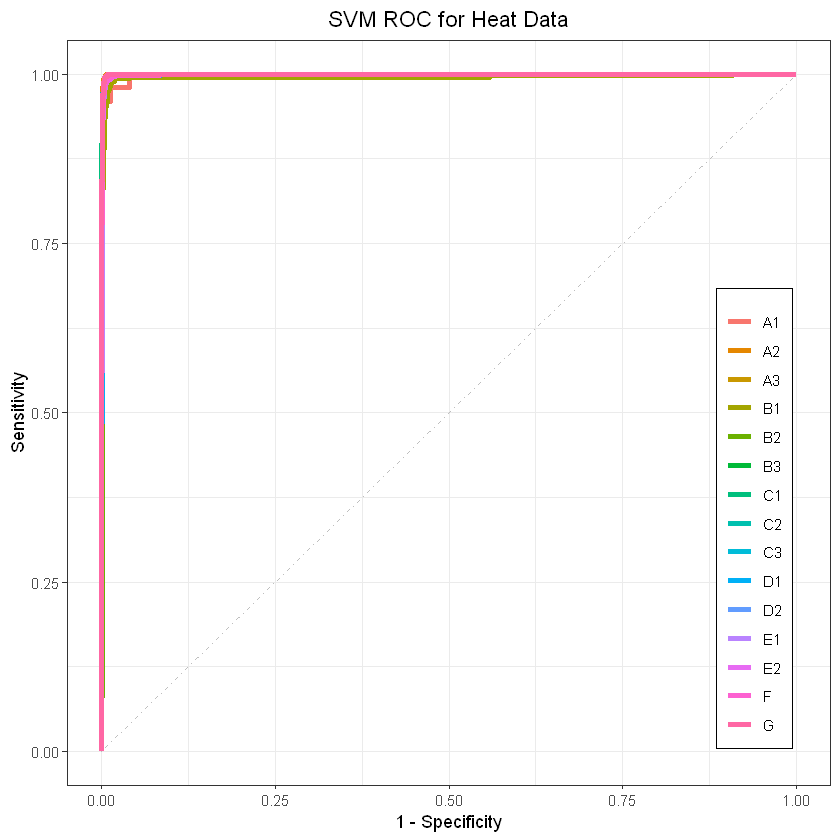

In [213]:
ggplot(plot_roc_df, aes(x = 1-Specificity, y=Sensitivity)) +
  geom_path(aes(color = Group), size=1.5) +
  geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1), 
               colour='grey', linetype = 'dotdash') +
  ggtitle("SVM ROC for Heat Data") +
  theme_bw() + 
  theme(plot.title = element_text(hjust = 0.5), 
        legend.justification=c(1, 0), legend.position=c(.95, .05),
        legend.title=element_blank(), 
        legend.background = element_rect(fill=NULL, size=0.5, 
                                         linetype="solid", colour ="black"))

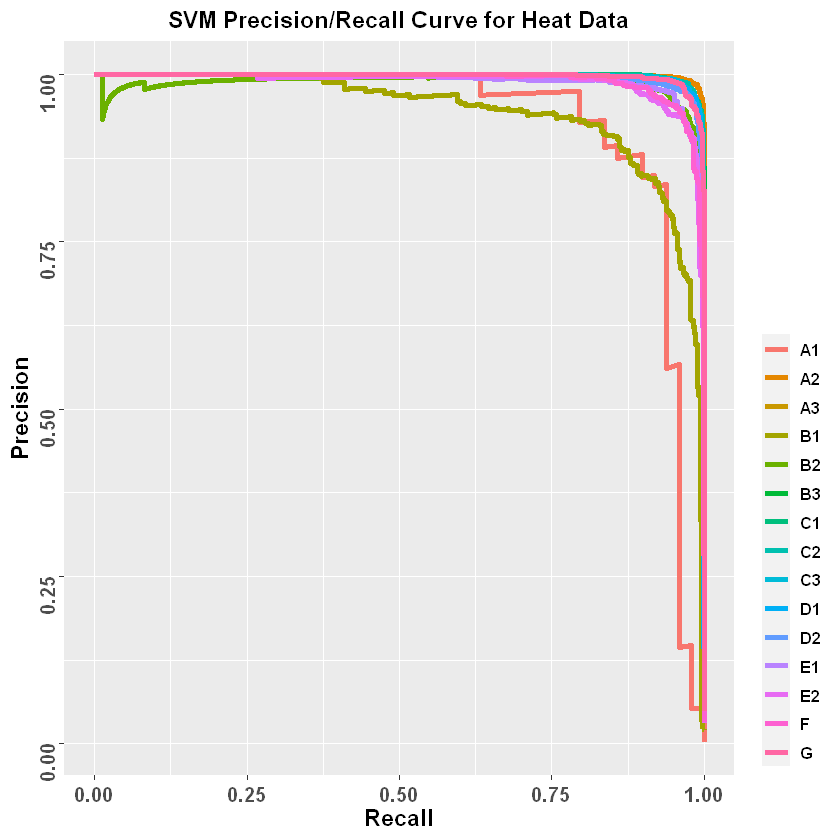

In [214]:
ggplot(plot_pr_df, aes(x=Recall, y=Precision)) + 
  geom_path(aes(color = Group), size=1.5) + 
  ggtitle("SVM Precision/Recall Curve for Heat Data") +
  theme(axis.title.x = element_text(face="bold", size=14),
        axis.text.x  = element_text(face="bold", vjust=0.5, size=12)) +
  theme(axis.title.y = element_text(face="bold", size=14),
        axis.text.y  = element_text(angle=90, face="bold", vjust=0.5, size=12)) +
  theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), 
        legend.justification=c(1, 0), 
        legend.title=element_blank(), 
        legend.text  = element_text(face="bold", size=10),
        legend.background = element_rect(fill=NULL, size=0.6, 
                                         linetype="solid", colour ="white"))